# Introduction

While Special teams is generally split into 4 main functions, Kickoffs, Punts, Field Goals and Extra points this analysis only looks at Punt plays. 

The punt play is a very unique play in football with several very specialised positions, in this analysis I am focusing on the Gunner and the Vise and their effect on the Returner and the outcome of the punt.

Quick summary of the roles
- Gunner - Goal is to get down field as quickly as possible to force a fair catch or minimise return yards
- Vise - Goal is to slow down or prevent the Gunner from reaching or affecting the returner

Goal of the analysis:
- Identify who are the best gunners in the league
- Identify what attributes are common in the best gunners
- Identify what tactics can be introduced to optimise coaching or technique decisions

# 1: Investigating the battle between Gunners vs Vises

The first decision which needs to be made in this analysis is to define when and how a gunner has won or lost their battle with the vise. There are various ways in which you could define them:
- Final result of the punt e.g. Returned, Fair Catch
- Events happened during the punt e.g. tackles
- When the gunner is closer to the returner than his corresponding vise

Out of the options I chose the distance between the gunner and the vise to the retuner as this is an easily measurable statistic and can be attributed individually to a player. The final result of a punt cannot be attributed individually as it is a team effort, and events which happen cannot be easily measured as it excludes the events not recorded e.g. pressure on returner.

At each frame I calculated the distance between the gunner and the returner and the distance between the marking vise (or vises if multiple guarding one gunner) and the returner. At each frame if the gunner was closer than the vise or both vises it was counted as the gunner winning that frame as they have gained a favourable position and in control.

See example below for what it looks like graphically

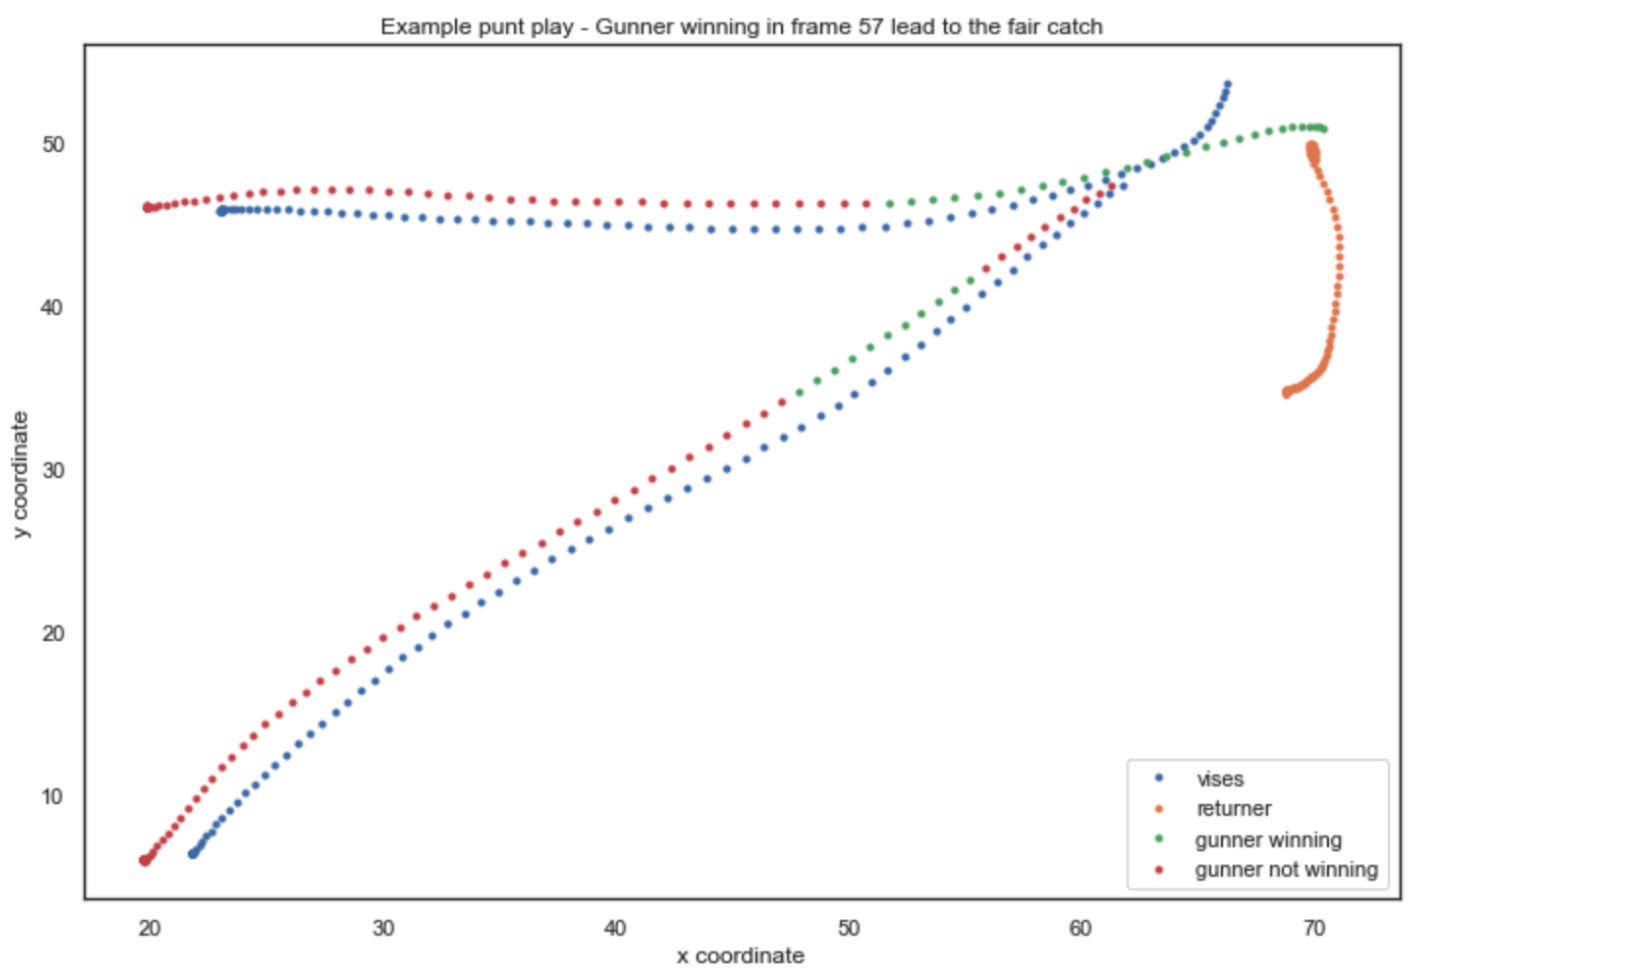

# 2: Impact gunners winning has on the punt event

In the above section we definied at each frame when the gunner was winning and losing. To take this further we aggregated this at a play level by identifying the first frame where the gunner was winning the matchup and compare it to the result of the punt play.

From the data below we can see that the longer it takes for the gunners to win their matchup the more likely a play is to be returned. There is a threshold around frame 50 where the likelyhood of return happening rapidly increases and the likelyhood of a fair catch or downed decreases.

In real terms this means the gunner needs to win their matchup within 4 seconds (first 10 frames in the tracking data is pre snap) to maximise the probability of a fair catch and minimise the chance of a returned punt.

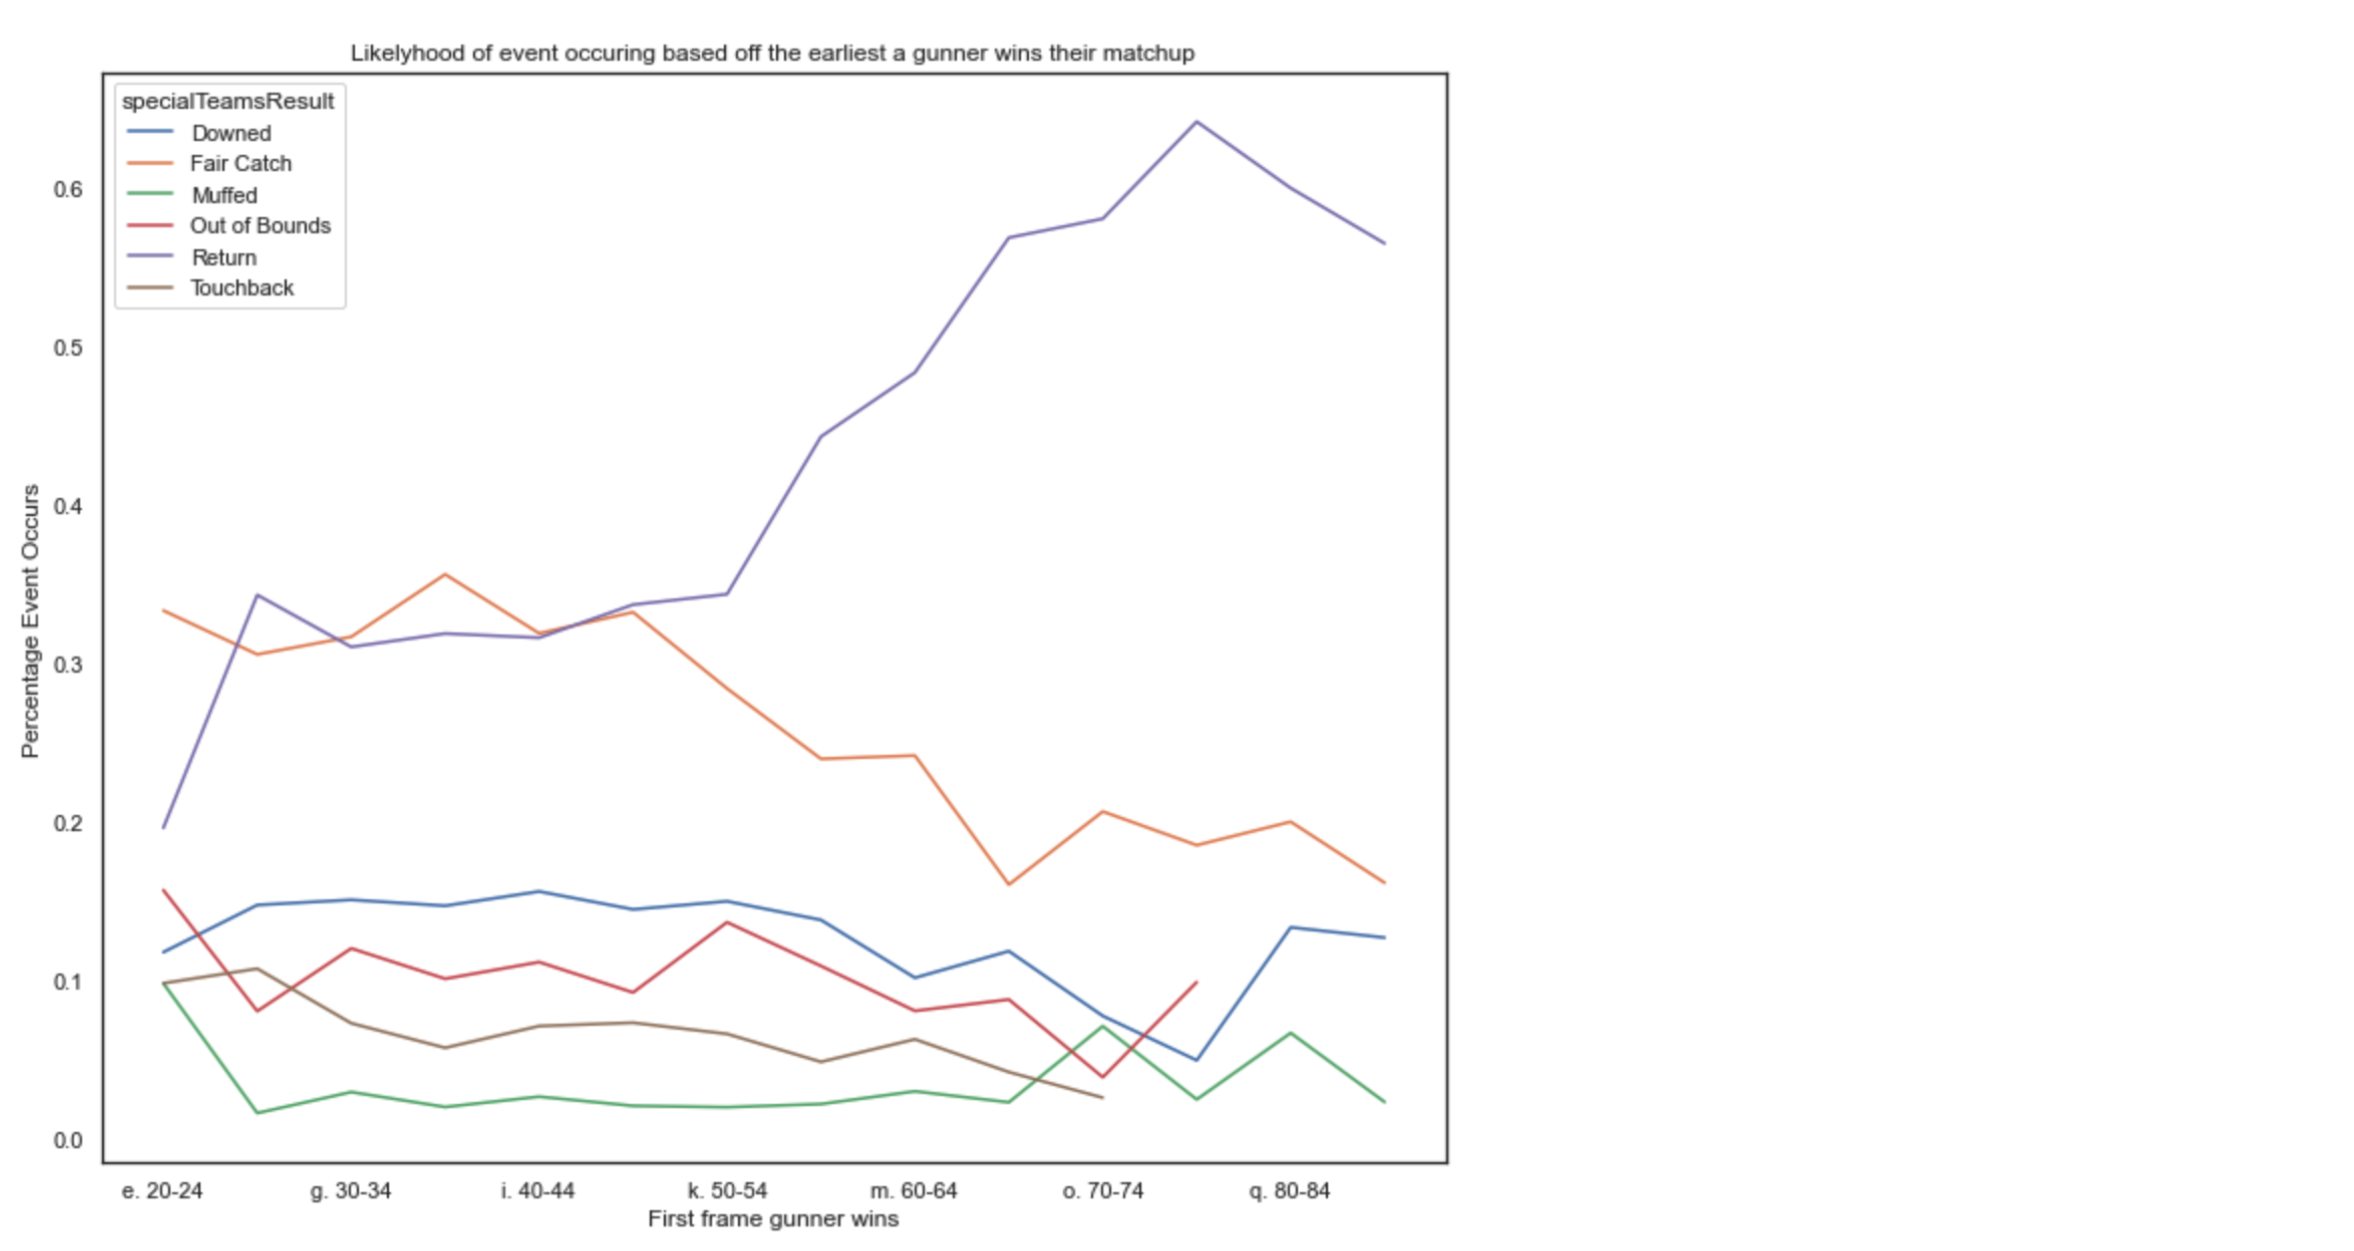

# 3: Rankings all gunners & attributes for Success

Now that we know how quickly a gunner has to beat their matchup by we can apply that metric to all the starting gunners in the NFL over the past three years. As gunners are sometimes have two vises lined up against them I have separated their success rate against 1 vise and success rate against 2 vises.

Note due to time constraints this does not factor in tackle % when required or skill at converting touchbacks into downed punts.

x player over the three years was the most successful gunner

Applied metrics to all starting gunners, split by matchup e.g. gunner vs 1 vise or 2 vise

In [301]:
# top gunners by year via success rate
c1 = (punt_results['starter'] == 1.0)
s1 = ['total success rate','1 vice success rate', '2 vice success rate']
a1 = (False, False,False)

punt_results[c1].sort_values(s1, ascending = a1).head(10)

,season,possessionTeam,nflId,displayName,starter,height,weight,birthDate,Position,s,a_first_40,vices1,vices2,vices1suc,vices2suc,total snaps,total success,total success rate,1 vice success rate,2 vice success rate,s pct Rank,a pct Rank,vs 1v pct Rank,vs 2v pct Rank,so s pct Rank,so a pct Rank,so vs 1v pct Rank,so vs 2v pct Rank,athletic summary,speed summary,acceleration summary
422,2019,TEN,46221.0,Dane Cruikshank,1.0,6-1,209.0,1995-04-27,SS,9.910,4.535,55.0,18.0,46.0,4.0,73.0,50.0,0.684932,0.836364,0.222222,0.893564,0.202970,0.918367,0.781046,0.882812,0.093750,1.000000,0.742188,Top S only,Gunner top 25% Speed,Bot A
507,2020,GB,43357.0,Will Redmond,1.0,5-11,186.0,1993-12-28,SS,9.740,4.670,19.0,6.0,16.0,1.0,25.0,17.0,0.680000,0.842105,0.166667,0.813636,0.215909,0.915888,0.767516,0.789062,0.125000,1.000000,0.637097,Top S only,Gunner top 25% Speed,Bot A
354,2019,NE,38707.0,Justin Bethel,1.0,6-0,200.0,1990-06-17,CB,9.780,4.620,33.0,4.0,22.0,2.0,37.0,24.0,0.648649,0.666667,0.500000,0.826733,0.287129,0.811224,0.957516,0.765625,0.187500,0.875000,0.960938,Top S only,Gunner top 25% Speed,Bot A
192,2018,PHI,46194.0,Avonte Maddox,1.0,5-9,184.0,1996-03-31,CB,10.070,5.330,16.0,9.0,14.0,2.0,25.0,16.0,0.640000,0.875000,0.222222,0.967672,0.812500,0.917411,0.725146,1.000000,0.867188,1.000000,0.687500,Top S&A,Gunner top 25% Speed,Top A
381,2019,OAK,41362.0,Nevin Lawson,1.0,5-9,192.0,1991-04-23,CB,9.165,4.920,21.0,3.0,14.0,1.0,24.0,15.0,0.625000,0.666667,0.333333,0.299505,0.559406,0.811224,0.892157,0.117188,0.484375,0.875000,0.875000,Bot S Only,Gunner bottom 25% Speed,other
572,2020,NE,38707.0,Justin Bethel,1.0,6-0,200.0,1990-06-17,CB,9.920,5.130,37.0,8.0,27.0,1.0,45.0,28.0,0.622222,0.729730,0.125000,0.909091,0.597727,0.897196,0.703822,0.906250,0.656250,0.968750,0.500000,Top S only,Gunner top 25% Speed,other
121,2018,KC,46757.0,Charvarius Ward,1.0,6-1,195.0,1996-05-16,CB,9.550,4.650,22.0,7.0,17.0,1.0,29.0,18.0,0.620690,0.772727,0.142857,0.724138,0.336207,0.892857,0.614035,0.648438,0.296875,0.984375,0.507812,other,Gunner mid 50% Speed,other
647,2020,TEN,53074.0,Nick Westbrook,1.0,6-3,215.0,1997-03-21,WR,9.530,4.730,23.0,3.0,15.0,1.0,26.0,16.0,0.615385,0.652174,0.333333,0.631818,0.288636,0.850467,0.894904,0.437500,0.203125,0.937500,0.903226,Bot A Only,Gunner mid 50% Speed,Bot A
244,2019,BAL,38707.0,Justin Bethel,1.0,6-0,200.0,1990-06-17,CB,9.785,4.960,14.0,4.0,11.0,0.0,18.0,11.0,0.611111,0.785714,0.000000,0.831683,0.596535,0.892857,0.274510,0.781250,0.585938,0.984375,0.156250,Top S only,Gunner top 25% Speed,other
150,2018,NO,38596.0,Josh Robinson,1.0,5-10,200.0,01/08/1991,CB,9.690,4.470,20.0,3.0,13.0,1.0,23.0,14.0,0.608696,0.650000,0.333333,0.814655,0.234914,0.783482,0.853801,0.750000,0.132812,0.835938,0.890625,Top S only,Gunner top 25% Speed,Bot A


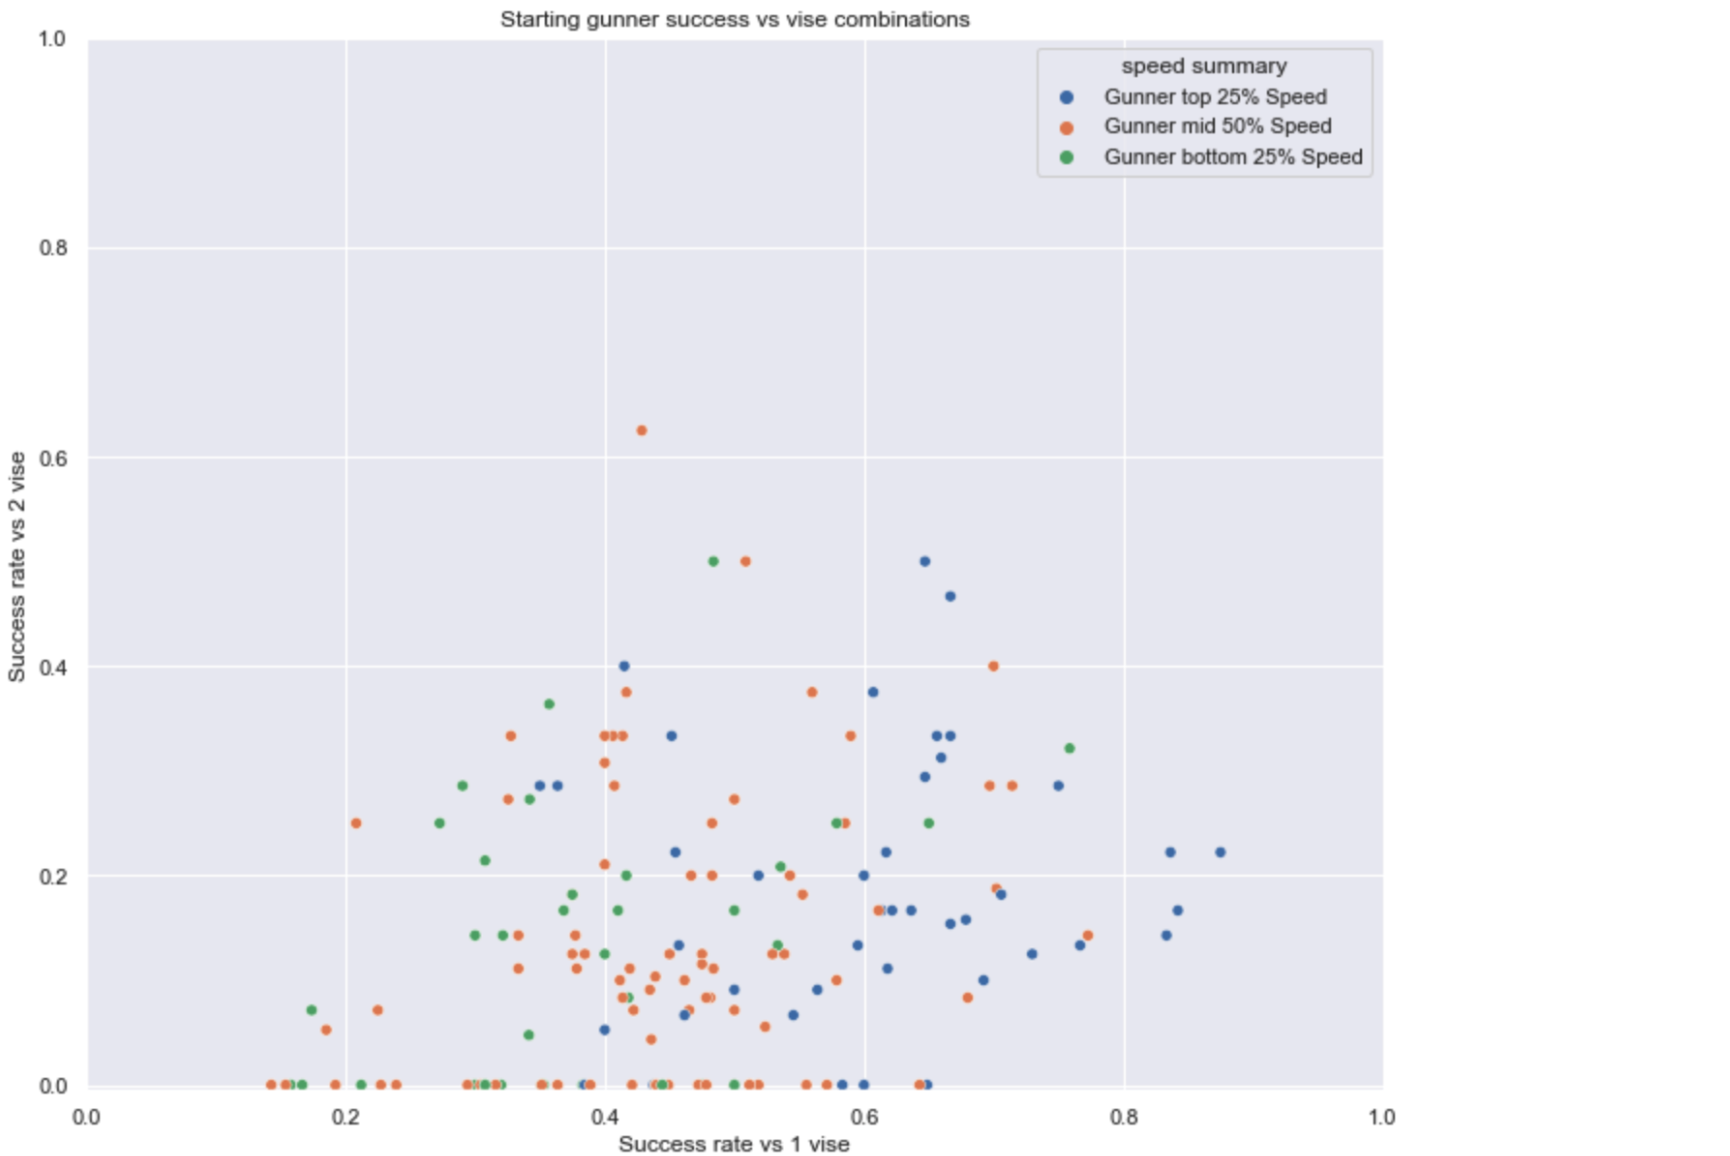

To add depth to the current data about the gunners I added their speed and acceleration metrics from the tracking data so we know how they compare against their peers. 

To calculate the speed and acceleration metrics on each play I identified the top speed and acceleration within the first 3 seconds on play (limited to first 3 seconds as acceleration spikes if a player attempted a tackle). I then took the median of the top speed and acceleration for each play as their final metric. 

To finalise it as gunners and vises are some of the fastest atheletes in the world they are all fast, due to this I ranked each of the gunners against every other starting gunner to identify the speed edge needed to outrun the competition.

When put into a correlation heat map there is a strong correlation between success rate vs 1 vise and the top speed of the gunner. Speed is a very important factor in 1:1 matchups. 

However when looking at the success rate vs 2 vises there is a very low correlation for success with either Speed, Acceleration or Weight. This suggests there may be outside factors such as techinque which may affect success more than just physical attributes.

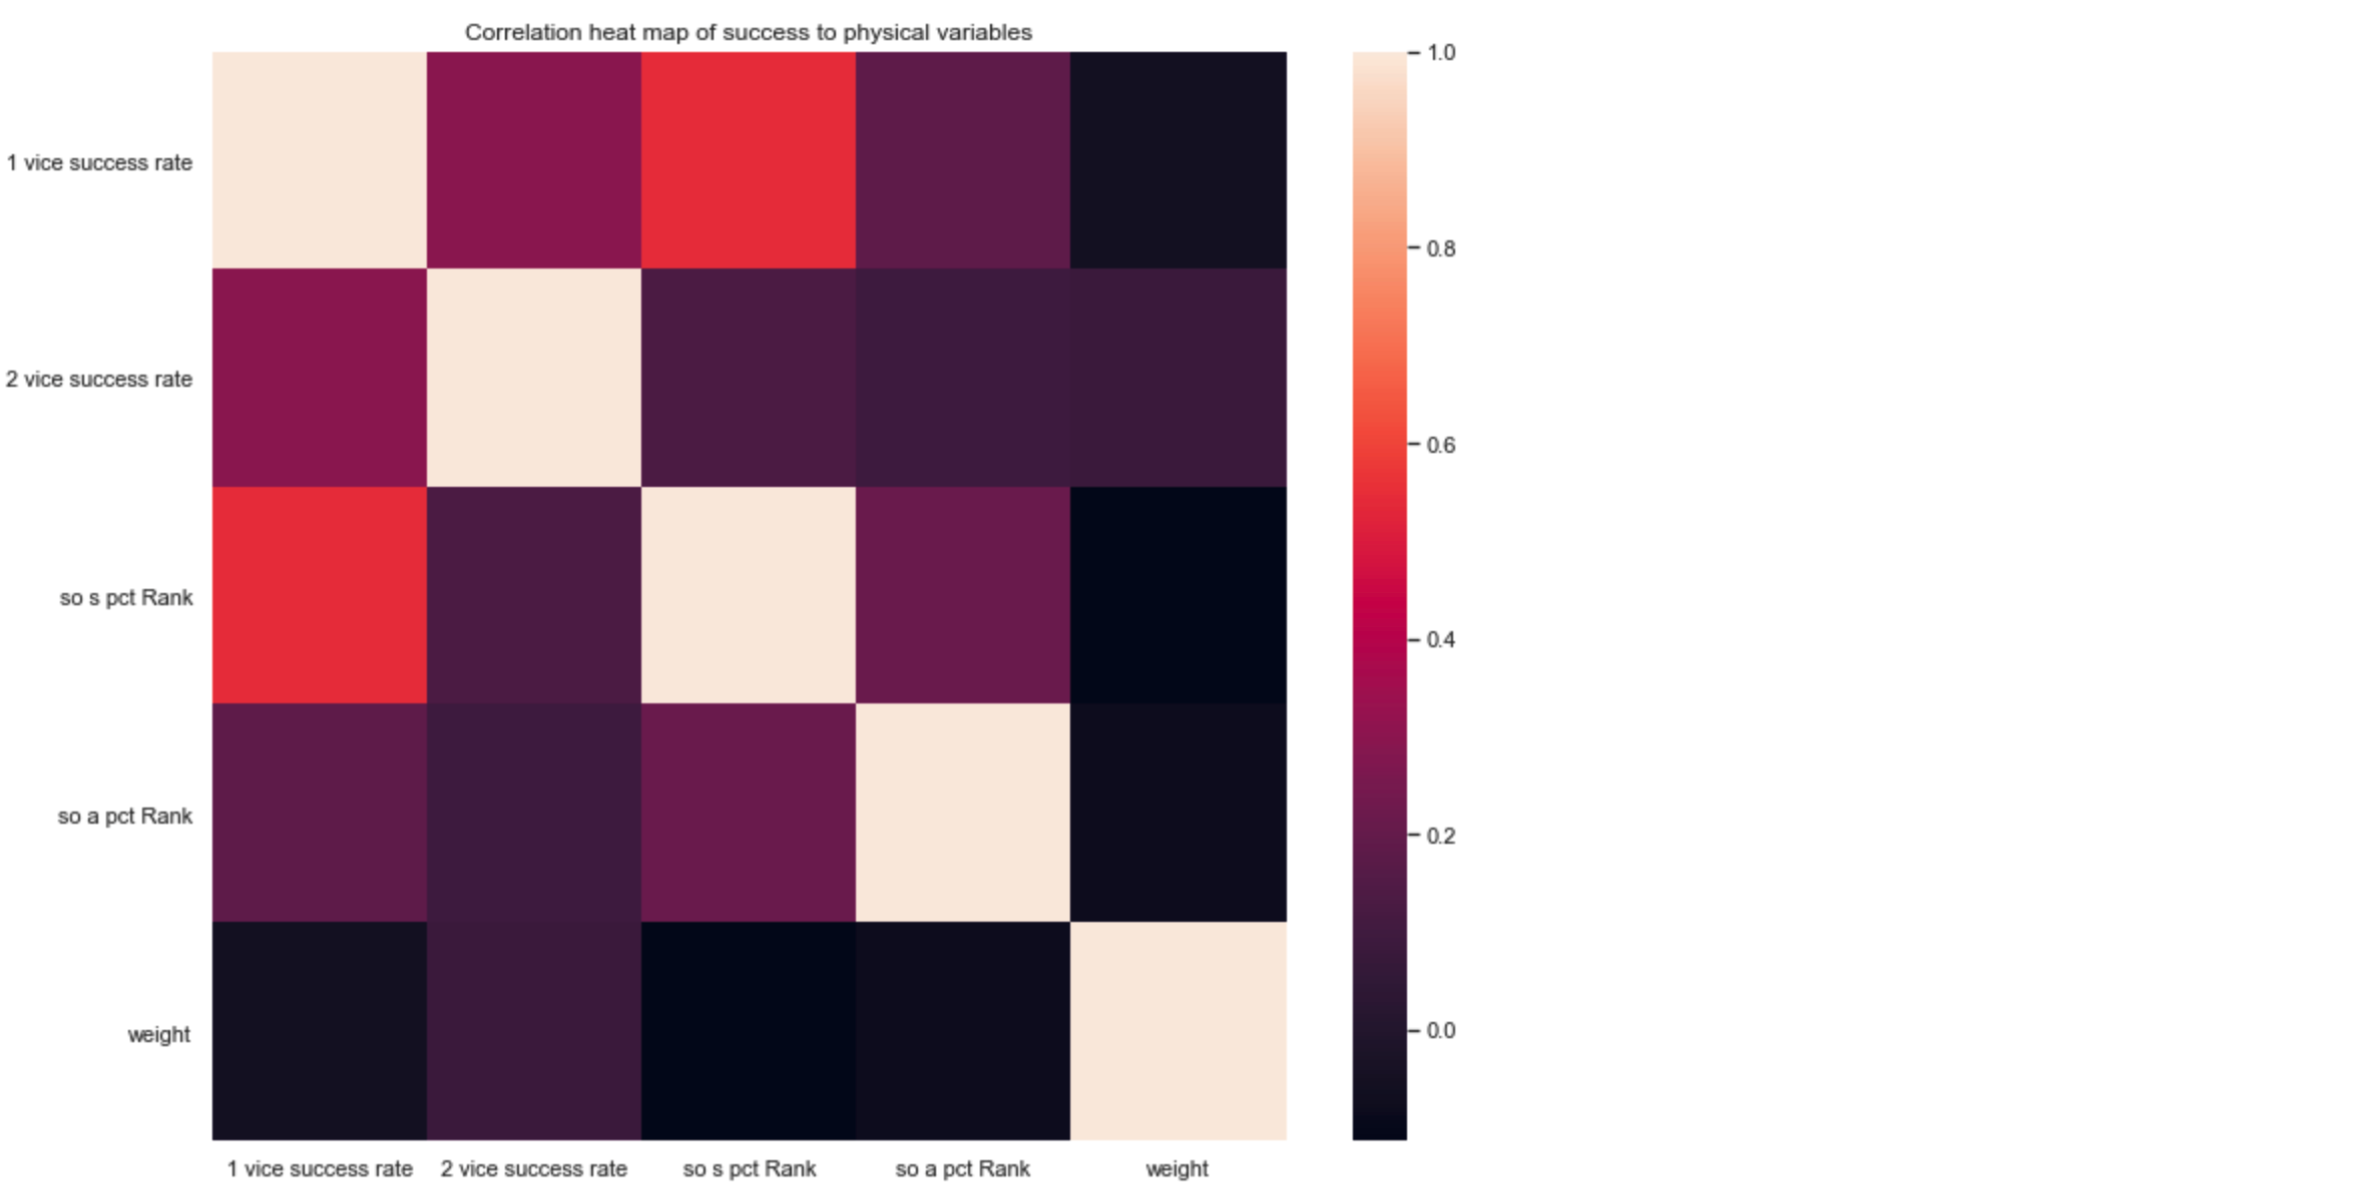

# 4. Breaking down and clustering gunner and vise techniques

Gunners have a very low success rate when matched up against 2 vises. Because of this I wanted to deepdive into the techniques used by Gunners and Vises to see what the optimal tactical decisions are. To achieve this I needed to cluster Gunner and Vise tracking data to identify what they were doing for each play, the technique used was K means clustering on normalised data.

Clustering process:

1. The first stage was data cleaning the (x,y) tracking data into a consistent format suitiable for clustering. This involved converting all gunner/ vise plays so that they were from the perspective of a gunner on the right hand side of the field with the (0,0) coordinate being the gunners position when the ball was snapped. A negative x value would be a location to the left of the gunner and closer to where the ball was snapped, a positive x value would be closer to the sideline. The (x,y) coordinates by frame were then transposed onto one line for each matchup to enable clustering.

2. Once the data was normalised I started a two step clustering process. 
    - First one clustering on the pre snap location
    - Second clustering on the post snap movement. 
    
3. Clustering on Pre Snap Location identified three unique clusters:
    - The standard linup, two stationary vises  2-3 yards off from the gunner (95.7% of snaps)
    - Vises in motion (3.7% of snaps)
    - Vises far away from gunner or gunner far behing the line of scrimmage (0.6% of snaps)

Due to time constraints I only continued clustering on the main cluster 'The standard lineup'

4. Custering on Post Snap movement
As the movement post snap has a lot of variety and is very complex I individually clustered each position separatly for the first second post snap to identify original tactic as the later movement is reactionary. This delivered the follow cluster results for each position:

Gunner:
- Inside Release (towards the ball)
- Outside Release (towards the sideline)

Vise (both inner and outer):
- Press Release (positivly approaches the gunner to jam them)
- Normal Release (neutral behaviour)
- Bail Release (no movement forward and rapidly move backwards)

## 4.1 What tactic works well for gunner?

Gunners initally seem have an easy decision to make as they have one of two options:
- Inside release (chosen 46% of the time)
- Outside release (chosen 54% of the time)

However there is a vastly different success rate depending on which release is chosen Inside releases are successful 23.5% of the time vs Outside releases which are only successful 8% of the time.

Inside releases are almost x3 as successful and many gunners are not making the optimal choice. This makes sense from a game persepective as the sideline acts as another defender limiting the gunners movement. 

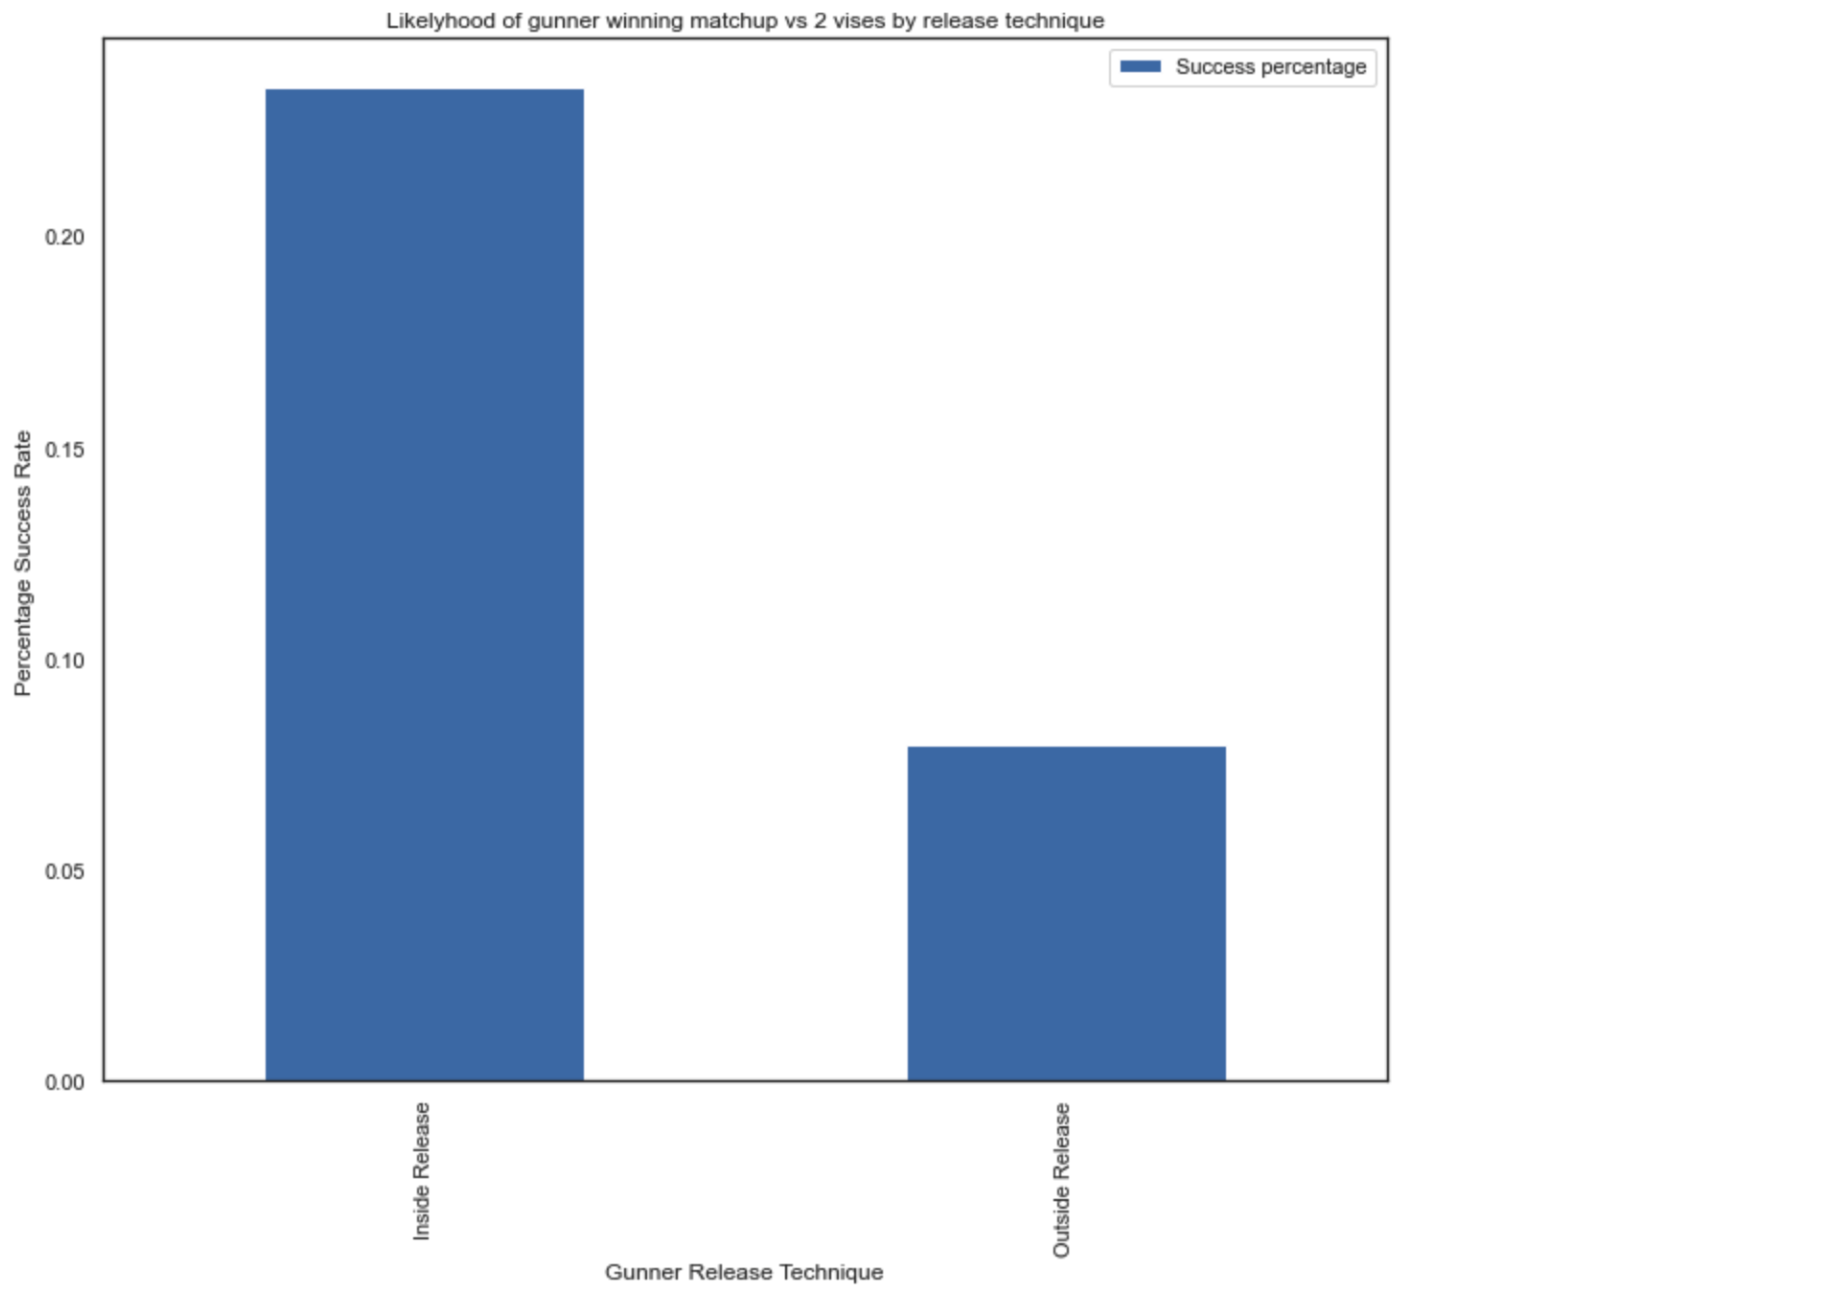

## 4.2 What tactic works well for vises?

Vises however have three options to choose from:
- Press release (chosen 29% of the time)
- Normal release (chosen 51% of the time)
- Bail release (chosen 20% of the time)

This means that between both vises there are 9 potential combinations of technique. These also then depend on decision made by the gunner of which release they choose.

If the gunner decides on an inner release the optimal vise technique:
- Inside vise to have a press release
- Outside vise to have a bail or normal release

If the gunner decides on an Outside release the optimal vise technique:
- Inside vise to have a bail release
- Outside vise slight preference for press release, but any release is very successful

In summary the best decision is depending on what way the gunner travels, the vise closest to the direction of travel to press the gunner and the vise furthest away to quickly drop. If the gunners in the league move to more inside releases the optimal default technique will be the inside vise in press release and outside vise in bail release.

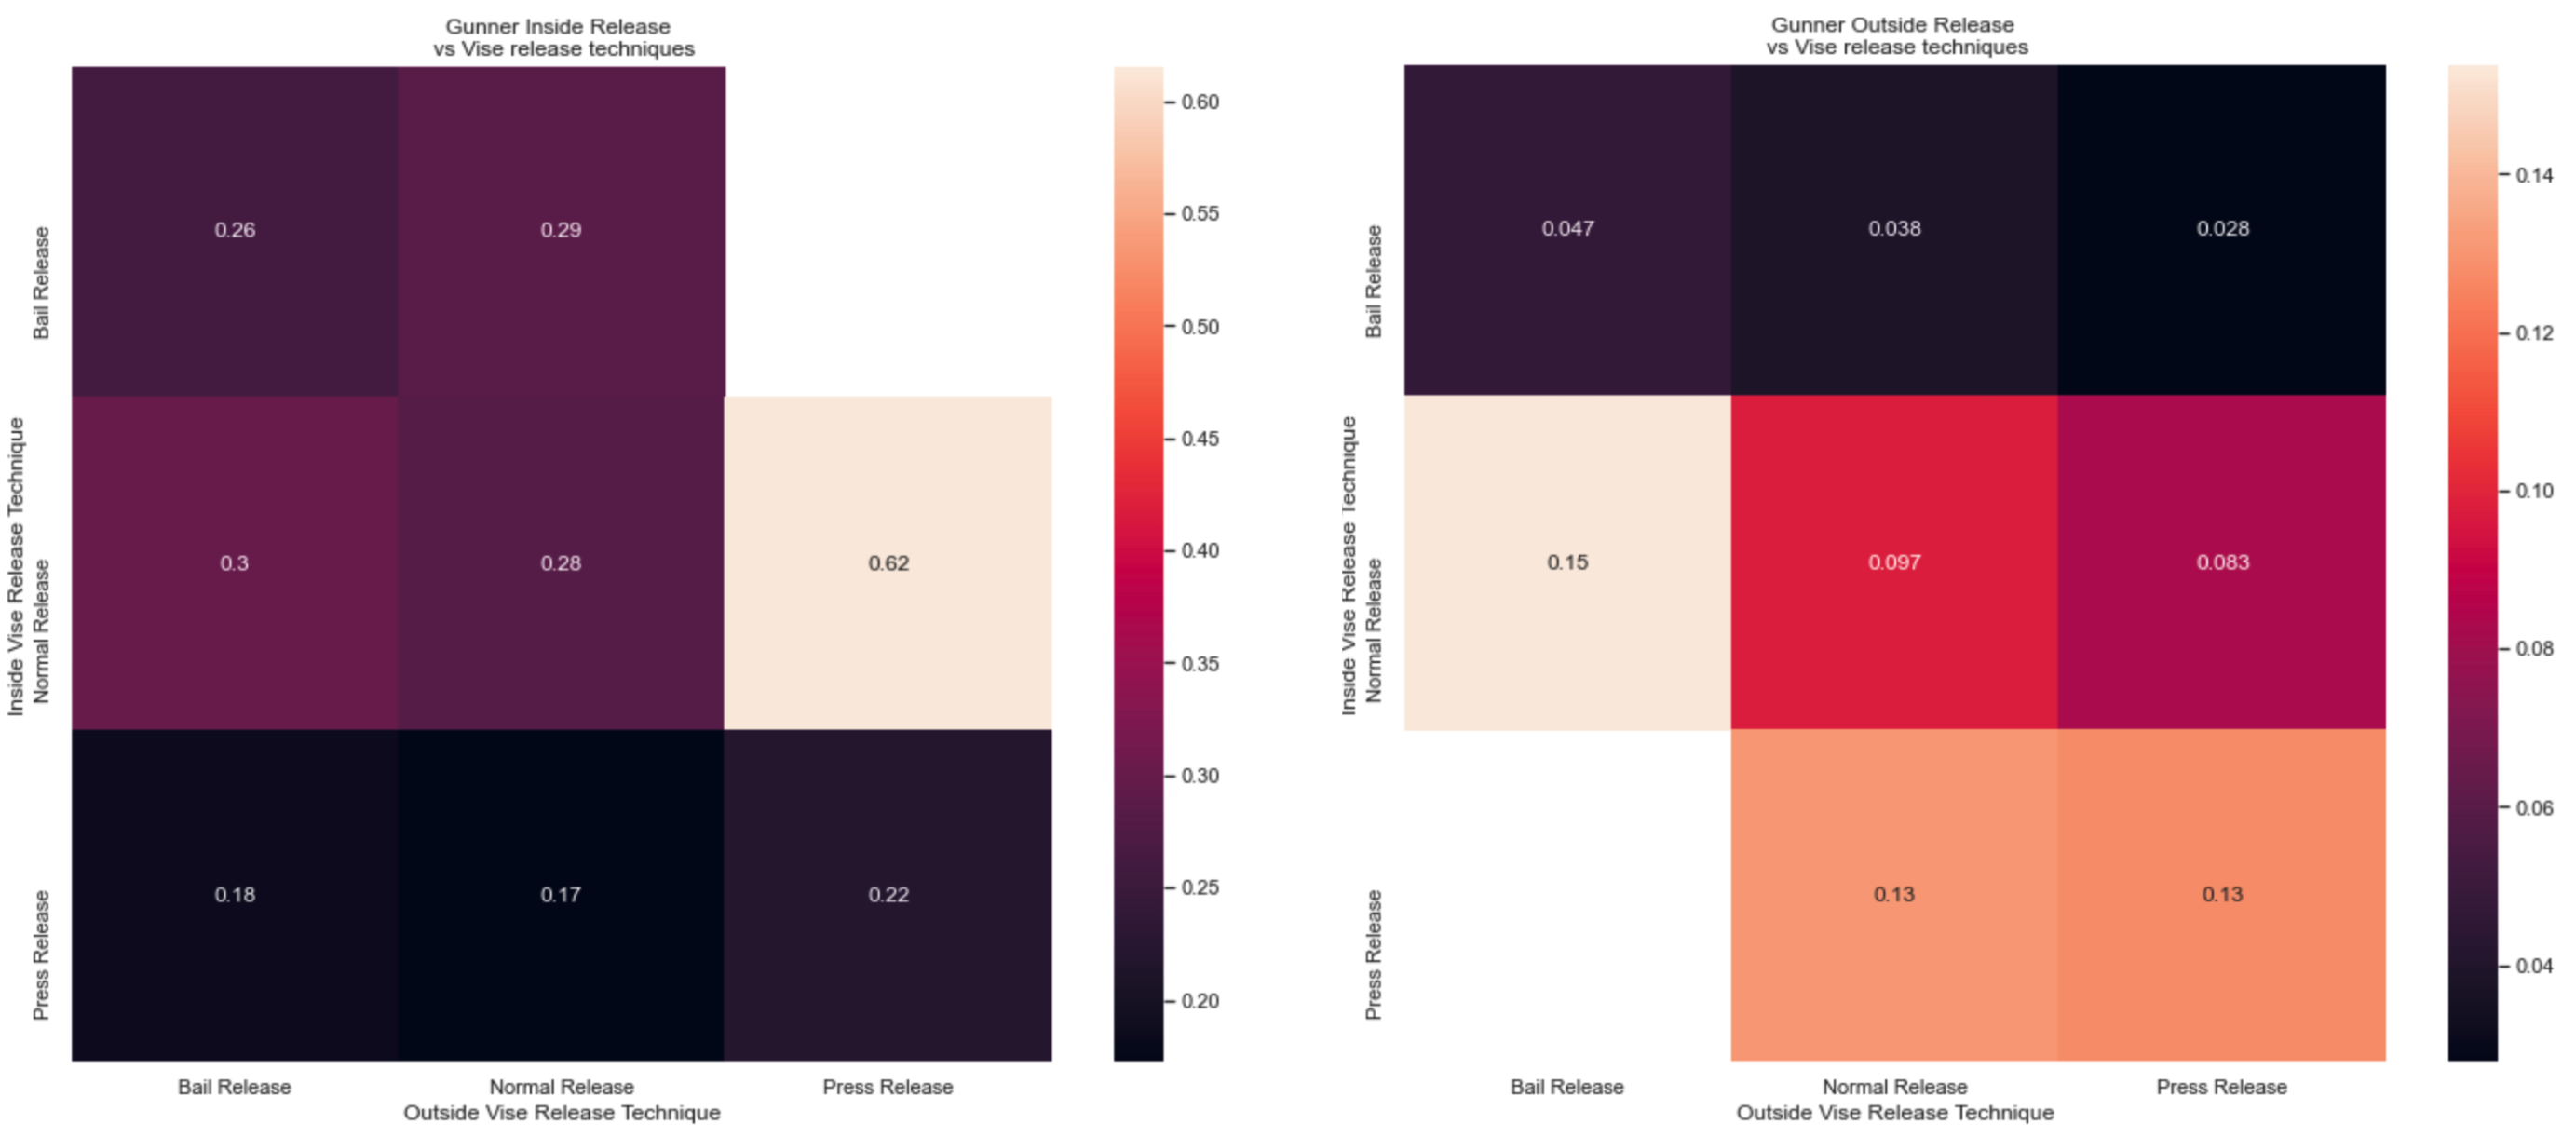

# 5. Overall tactical decisions

In the above sections we have covered tactical desisions at a player level, now we will compare the decisions at a team level. 

Punting teams are limited to two gunners by NFL rules, generally the punt return team either matches the gunners up 
- one to one both gunners
- double team one gunner, one to one the other
- double team both gunners

For punts you are likely wanting to maximise one of two possible outcomes: 
- Blocked punt to cause a turnover in great position to score from 
- Convert fair catches into returns to put your offense in a slighly better position

Having 2 vises in a one to one matchup leads to a 1.4% chance of a blocked or deflected punt which is almost double that of when you field 3 or 4 vises (0.4% and 0.8%).

When looking at returns 72% of punts are returned where both gunners are double blocked vs, 32% for 2 vises and 57% for 3 vises.

As such during the game if you are needing to create a bit turnover in a hail mary situation 2 vises is the best team tactic, however if you are wanting a more reliable option to put your offense in a slightly better situation 4 vises is the optimal play.



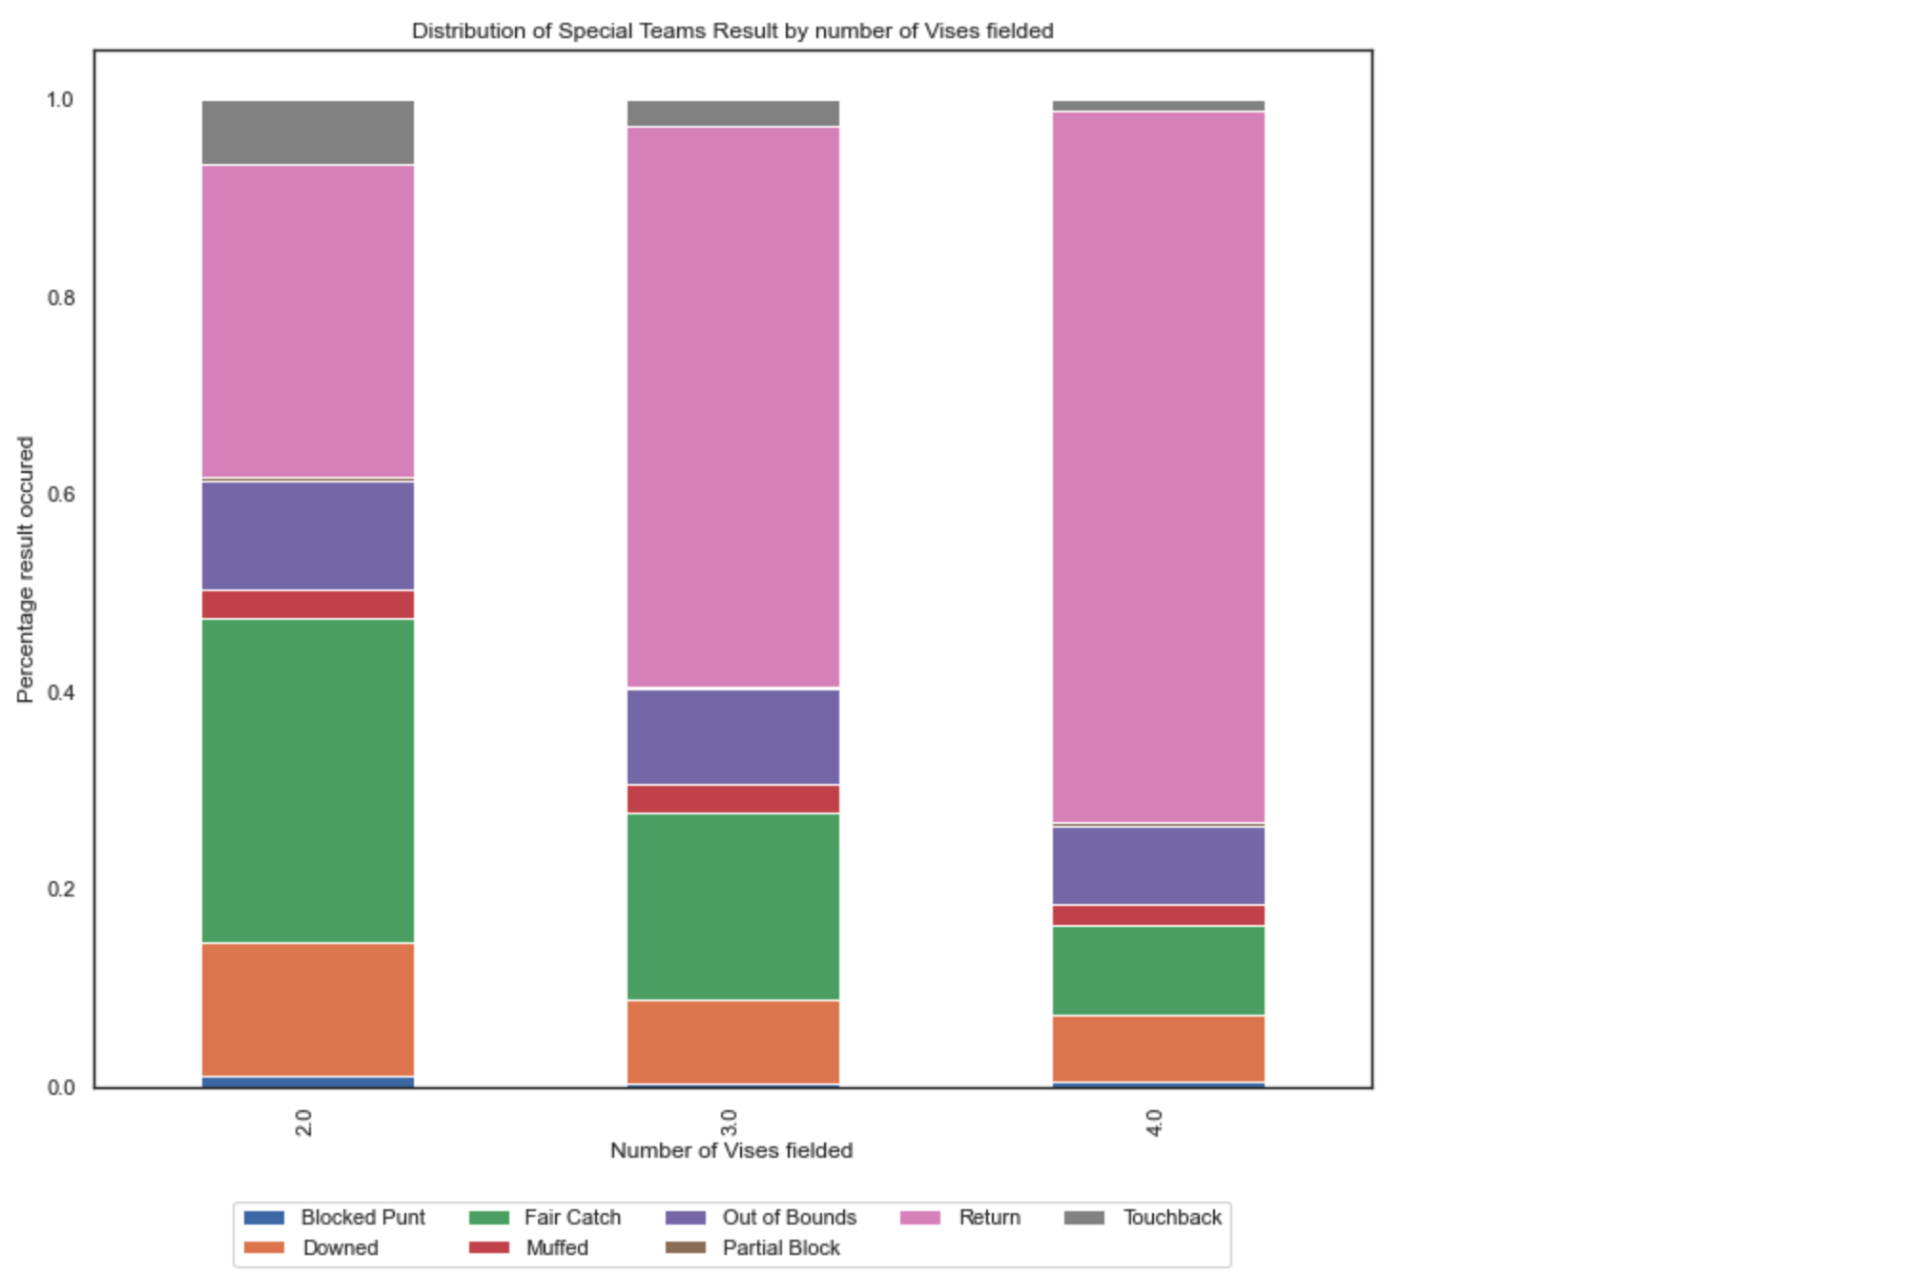

# 6. Summary & Future Work

quick summary and future work
safeties
return effectivness and tactics


# 7. Appendix

In [302]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
sns.despine()

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
pd.set_option('display.max_colwidth', None)
#pd.set_option('display.max_columns', 50)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<Figure size 864x720 with 0 Axes>

## 7.1 Data Imports & Basic Combinations

In [303]:
game_data = pd.read_csv('/Users/cgiess/Downloads/games.csv')
players = pd.read_csv('/Users/cgiess/Downloads/players.csv')
plays = pd.read_csv('/Users/cgiess/Downloads/plays.csv')
punt_plays = plays[plays['specialTeamsPlayType'] == 'Punt']
punt_plays_reduced = punt_plays[['gameId','playId']]
pff = pd.read_csv('/Users/cgiess/Downloads/PFFScoutingData.csv')
tracking2018 = pd.read_csv('/Users/cgiess/Downloads/tracking2018.csv')
tracking2019 = pd.read_csv('/Users/cgiess/Downloads/tracking2019.csv')
tracking2020 = pd.read_csv('/Users/cgiess/Downloads/tracking2020.csv')

frames = [tracking2018,tracking2019,tracking2020]
tracking_all = pd.concat(frames)
del tracking2018
del tracking2019
del tracking2020
punt_tracking = pd.merge(tracking_all, punt_plays_reduced, how="inner", on=['gameId', 'playId'])

punt_wpff = pd.merge(punt_plays, pff, how="left", on=['gameId', 'playId'])
punt_wpff_wgd = pd.merge(punt_wpff, game_data, how="left", on=['gameId'])
punt_wpff_wgd.loc[punt_wpff_wgd['possessionTeam'] == punt_wpff_wgd['homeTeamAbbr'], 'returning_team'] = punt_wpff_wgd['visitorTeamAbbr']  
punt_wpff_wgd.loc[punt_wpff_wgd['possessionTeam'] != punt_wpff_wgd['homeTeamAbbr'], 'returning_team'] = punt_wpff_wgd['homeTeamAbbr']

## 7.2 Adding Value to Basic Tables

In [8]:
# including return players nfl id as not included for aspects like fair catches...
frame1 = punt_tracking[punt_tracking['frameId'] == 1]
frame1min = frame1.groupby(['gameId','playId','playDirection']).agg({'x':'min'})
frame1min.reset_index( drop=False, inplace=True )
frame1min.rename(columns={'x': 'min_x'}, inplace=True)
frame1max = frame1.groupby(['gameId','playId','playDirection']).agg({'x':'max'})
frame1max.reset_index( drop=False, inplace=True )
frame1max.rename(columns={'x': 'max_x'}, inplace=True)

frame1_merge1 = pd.merge(frame1, frame1min, how="inner", on=['gameId', 'playId','playDirection'])
frame1_merge2 = pd.merge(frame1_merge1, frame1max, how="inner", on=['gameId', 'playId','playDirection'])
r_condition1 = ((frame1_merge2['playDirection'] == 'right') & (frame1_merge2['x'] == frame1_merge2['max_x']))
r_condition2 = ((frame1_merge2['playDirection'] == 'left') & (frame1_merge2['x'] == frame1_merge2['min_x']))
return_summary = frame1_merge2[r_condition1 | r_condition2].rename(columns={'nflId': 'return_nflId'})
return_summary2 = return_summary[['gameId', 'playId','return_nflId']]

punt_wpff_wgd_wr = pd.merge(punt_wpff_wgd, return_summary2, how="left", on=['gameId', 'playId'])
punt_wpff_wgd_wr.loc[punt_wpff_wgd_wr['returnerId'].notna(), 'returnerId_final'] = punt_wpff_wgd_wr['returnerId'] 
punt_wpff_wgd_wr.loc[punt_wpff_wgd_wr['returnerId'].isnull(), 'returnerId_final'] = punt_wpff_wgd_wr['return_nflId']

In [9]:
##vices count
v_conditions = [
    punt_wpff_wgd_wr['vises'].isna(),
    (punt_wpff_wgd_wr['vises'].str.count(';') > 0) & punt_wpff_wgd_wr['vises'].notnull(),
    (punt_wpff_wgd_wr['vises'].str.count(';') == 0) & punt_wpff_wgd_wr['vises'].notnull(),
    ]
v_values = [0, punt_wpff_wgd_wr['vises'].str.count(';')+1, 1 ]

##gunner count
g_conditions = [
    punt_wpff_wgd_wr['gunners'].isna(),
    (punt_wpff_wgd_wr['gunners'].str.count(';') > 0) & punt_wpff_wgd_wr['gunners'].notnull(),
    (punt_wpff_wgd_wr['gunners'].str.count(';') == 0) & punt_wpff_wgd_wr['gunners'].notnull(),
    ]
g_values = [0, punt_wpff_wgd_wr['gunners'].str.count(';')+1, 1 ]

##punt rusher count
pr_conditions = [
    punt_wpff_wgd_wr['puntRushers'].isna(),
    (punt_wpff_wgd_wr['puntRushers'].str.count(';') > 0) & punt_wpff_wgd_wr['puntRushers'].notnull(),
    (punt_wpff_wgd_wr['puntRushers'].str.count(';') == 0) & punt_wpff_wgd_wr['puntRushers'].notnull(),
    ]
pr_values = [0, punt_wpff_wgd_wr['gunners'].str.count(';')+1, 1 ]

##special teams safeties count
s_conditions = [
    punt_wpff_wgd_wr['specialTeamsSafeties'].isna(),
    (punt_wpff_wgd_wr['specialTeamsSafeties'].str.count(';') > 0) & punt_wpff_wgd_wr['specialTeamsSafeties'].notnull(),
    (punt_wpff_wgd_wr['specialTeamsSafeties'].str.count(';') == 0) & punt_wpff_wgd_wr['specialTeamsSafeties'].notnull(),
    ]
s_values = [0, punt_wpff_wgd['gunners'].str.count(';')+1, 1 ]

##kick return yards 0 for null
kr_conditions = [
    punt_wpff_wgd_wr['kickReturnYardage'].isna(),
    punt_wpff_wgd_wr['kickReturnYardage'].notnull(),
    ]
kr_values = [0, punt_wpff_wgd_wr['kickReturnYardage']]

##punt location
pl_conditions = [
    punt_wpff_wgd_wr['possessionTeam'] != punt_wpff_wgd_wr['yardlineSide'],
    ((punt_wpff_wgd_wr['possessionTeam'] == punt_wpff_wgd_wr['yardlineSide']) & (punt_wpff_wgd_wr['yardlineNumber'] <= 10)),
    ((punt_wpff_wgd_wr['possessionTeam'] == punt_wpff_wgd_wr['yardlineSide']) & (punt_wpff_wgd_wr['yardlineNumber'] >= 11)),
    ]
pl_values = ['opposition side', 'within own 10', 'own side of field']

# create a new column and use np.select to assign values to it using our lists as arguments
punt_wpff_wgd_wr['vises_count'] = np.select(v_conditions, v_values)
punt_wpff_wgd_wr['gunner_count'] = np.select(g_conditions, g_values)
punt_wpff_wgd_wr['punt_rusher_count'] = np.select(pr_conditions, pr_values)
punt_wpff_wgd_wr['st_safeties_count'] = np.select(s_conditions, s_values)
punt_wpff_wgd_wr['kickReturnYardage_v2'] = np.select(kr_conditions, kr_values)
punt_wpff_wgd_wr['punt_location'] = np.select(pl_conditions, pl_values)

vises = punt_wpff_wgd_wr['vises'].str.split(';', expand=True)
gunners = punt_wpff_wgd_wr['gunners'].str.split(';', expand=True)
punt_rushers = punt_wpff_wgd_wr['puntRushers'].str.split(';', expand=True)
safeties = punt_wpff_wgd_wr['specialTeamsSafeties'].str.split(';', expand=True)

punt_wpff_wgd_wr['vice_1'] = vises[0]
punt_wpff_wgd_wr['vice_2'] = vises[1]
punt_wpff_wgd_wr['vice_3'] = vises[2]
punt_wpff_wgd_wr['vice_4'] = vises[3]
punt_wpff_wgd_wr['vice_5'] = vises[4]
punt_wpff_wgd_wr['gunner_1'] = gunners[0]
punt_wpff_wgd_wr['gunner_2'] = gunners[1]
punt_wpff_wgd_wr['vice_1_number'] = vises[0].str.extract('(\d+)').fillna(100001.0).astype(int)
punt_wpff_wgd_wr['vice_2_number'] = vises[1].str.extract('(\d+)').fillna(100001.0).astype(int)
punt_wpff_wgd_wr['vice_3_number'] = vises[2].str.extract('(\d+)').fillna(100001.0).astype(int)
punt_wpff_wgd_wr['vice_4_number'] = vises[3].str.extract('(\d+)').fillna(100001.0).astype(int)
punt_wpff_wgd_wr['vice_5_number'] = vises[4].str.extract('(\d+)').fillna(100001.0).astype(int)
punt_wpff_wgd_wr['gunner_1_number'] = gunners[0].str.extract('(\d+)')
punt_wpff_wgd_wr['gunner_2_number'] = gunners[1].str.extract('(\d+)')
punt_wpff_wgd_wr.loc[punt_wpff_wgd_wr['possessionTeam'] == punt_wpff_wgd_wr['homeTeamAbbr'], 'kicking_team'] = 'home' 
punt_wpff_wgd_wr.loc[punt_wpff_wgd_wr['possessionTeam'] != punt_wpff_wgd_wr['homeTeamAbbr'], 'kicking_team'] = 'away'

# reducing to circumstances where there are 2 gunners (as cannot have more than 2 due to rules and less than 2 is v rare)
# reducing to circumstances where the number of vises is 2-4 as it is very rare to have other numbers
punt_limited = punt_wpff_wgd_wr[(punt_wpff_wgd_wr['gunner_count'] == 2) & punt_wpff_wgd_wr['vises_count'].isin([2,3,4])]

## 7.3 Manipulating Punt Tracking Data

In [11]:
#adding responsibilities to tracking data
punt_responsibilities = punt_limited[['gameId','playId','kicking_team','returnerId_final','vice_1_number','vice_2_number','vice_3_number','vice_4_number','vice_5_number','gunner_1_number','gunner_2_number']]

punt_tracking2 = pd.merge(punt_tracking, punt_responsibilities, how="inner", on=['gameId', 'playId'])
punt_tracking2['nflId'].fillna(1000.0).astype(int)
punt_tracking2['jerseyNumber'].fillna(1001.0).astype(int)

# excluding very rare observations where there are multiple returners
condition1 = (punt_tracking2['returnerId_final'].str.count(';').fillna(0) == 0)
punt_tracking3 = punt_tracking2[condition1]

#cleaning data types
punt_tracking3["nflId"] = punt_tracking3["nflId"].fillna(1000.0).astype(int)
punt_tracking3["jerseyNumber"] = punt_tracking3["jerseyNumber"].fillna(1001.0).astype(int)
punt_tracking3["returnerId_final"] = punt_tracking3["returnerId_final"].fillna(100000.0).astype(int)
punt_tracking3["vice_1_number"] = punt_tracking3["vice_1_number"].fillna(100001.0).astype(int)
punt_tracking3["vice_2_number"] = punt_tracking3["vice_2_number"].fillna(100001.0).astype(int)
punt_tracking3["vice_3_number"] = punt_tracking3["vice_3_number"].fillna(100001.0).astype(int)
punt_tracking3["vice_4_number"] = punt_tracking3["vice_4_number"].fillna(100001.0).astype(int)
punt_tracking3["vice_5_number"] = punt_tracking3["vice_5_number"].fillna(100001.0).astype(int)
punt_tracking3["gunner_1_number"] = punt_tracking3["gunner_1_number"].fillna(100002.0).astype(int)
punt_tracking3["gunner_2_number"] = punt_tracking3["gunner_2_number"].fillna(100002.0).astype(int)

##responsibility
res_conditions = [  
    (punt_tracking3['team'] != punt_tracking3['kicking_team']) & (punt_tracking3['nflId'] == punt_tracking3['returnerId_final']),
    (punt_tracking3['team'] != punt_tracking3['kicking_team']) & (punt_tracking3['jerseyNumber'] == punt_tracking3['vice_1_number']),
    (punt_tracking3['team'] != punt_tracking3['kicking_team']) & (punt_tracking3['jerseyNumber'] == punt_tracking3['vice_2_number']),
    (punt_tracking3['team'] != punt_tracking3['kicking_team']) & (punt_tracking3['jerseyNumber'] == punt_tracking3['vice_3_number']),
    (punt_tracking3['team'] != punt_tracking3['kicking_team']) & (punt_tracking3['jerseyNumber'] == punt_tracking3['vice_4_number']),
    (punt_tracking3['team'] != punt_tracking3['kicking_team']) & (punt_tracking3['jerseyNumber'] == punt_tracking3['vice_5_number']),
    (punt_tracking3['team'] == punt_tracking3['kicking_team']) & (punt_tracking3['jerseyNumber'] == punt_tracking3['gunner_1_number']),
    (punt_tracking3['team'] == punt_tracking3['kicking_team']) & (punt_tracking3['jerseyNumber'] == punt_tracking3['gunner_2_number']),  
    punt_tracking3['displayName'] == 'football',
    ]
res_values = ['returner','vice 1','vice 2','vice 3','vice 4','vice 5','gunner 1','gunner 2','football']
res_values_simple = ['returner','vice','vice','vice','vice','vice','gunner','gunner','football']

# create a new column and use np.select to assign values to it using our lists as arguments
punt_tracking3['play_responsibility'] = np.select(res_conditions, res_values)
punt_tracking3['play_responsibility_simple'] = np.select(res_conditions, res_values_simple)

<ipython-input-11-d51c1222960e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  punt_tracking3["nflId"] = punt_tracking3["nflId"].fillna(1000.0).astype(int)
<ipython-input-11-d51c1222960e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  punt_tracking3["jerseyNumber"] = punt_tracking3["jerseyNumber"].fillna(1001.0).astype(int)
<ipython-input-11-d51c1222960e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [299]:
punt_tracking3.head(5)

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,team,frameId,gameId,playId,playDirection,kicking_team,returnerId_final,vice_1_number,vice_2_number,vice_3_number,vice_4_number,vice_5_number,gunner_1_number,gunner_2_number,play_responsibility,play_responsibility_simple
0,2018-12-30T21:57:58.300,94.82,29.50,0.0,0.0,0.01,278.03,288.96,None,34723,Britton Colquitt,4,P,away,1,2018123000,892,left,away,43349,28,26,100001,100001,100001,27,31,0,0
1,2018-12-30T21:57:58.400,94.81,29.50,0.0,0.0,0.00,277.43,286.96,None,34723,Britton Colquitt,4,P,away,2,2018123000,892,left,away,43349,28,26,100001,100001,100001,27,31,0,0
2,2018-12-30T21:57:58.500,94.81,29.50,0.0,0.0,0.01,277.43,274.36,None,34723,Britton Colquitt,4,P,away,3,2018123000,892,left,away,43349,28,26,100001,100001,100001,27,31,0,0
3,2018-12-30T21:57:58.600,94.80,29.49,0.0,0.0,0.01,278.33,266.10,None,34723,Britton Colquitt,4,P,away,4,2018123000,892,left,away,43349,28,26,100001,100001,100001,27,31,0,0
4,2018-12-30T21:57:58.700,94.80,29.49,0.0,0.0,0.00,278.33,261.76,None,34723,Britton Colquitt,4,P,away,5,2018123000,892,left,away,43349,28,26,100001,100001,100001,27,31,0,0


In [300]:
punt_tracking3.drop(['time','dis','o','dir'], axis=1)

KeyboardInterrupt: 

In [ ]:
punt_tracking3.head(5)

In [12]:
#working out end frame for all plays

# assuming the end for each play (looking at punt return) 
## 1.is when returner either catches the ball 
## or 2. ball goes past the returner

#calc of when ball goes behind returner
relevant_punt = punt_tracking3[punt_tracking3['play_responsibility'] != '0']
test = relevant_punt.query("play_responsibility == 'football' or play_responsibility == 'returner'")
textx_pivoted = test[['gameId','playId','frameId','play_responsibility','x','playDirection']].pivot_table('x', ['gameId', 'playId','frameId','playDirection'], 'play_responsibility')
textx_pivoted.reset_index( drop=False, inplace=True )

bl_conditions = [
    ((textx_pivoted['playDirection'] == 'right') & (textx_pivoted['returner'] <= textx_pivoted['football'])),
    ((textx_pivoted['playDirection'] == 'right') & (textx_pivoted['returner'] > textx_pivoted['football'])),
    ((textx_pivoted['playDirection'] == 'left') & (textx_pivoted['returner'] >= textx_pivoted['football'])),
    ((textx_pivoted['playDirection'] == 'left') & (textx_pivoted['returner'] < textx_pivoted['football'])),
    ]
bl_values = [1,0,1,0]

textx_pivoted['ball_behind_returner'] = np.select(bl_conditions, bl_values)
first_ball_behind_returner = textx_pivoted[textx_pivoted['ball_behind_returner'] == 1].groupby(['gameId','playId']).min(['frameId'])

# identify frame where ball is snapped
ball_snap_event = punt_tracking3[(punt_tracking3['event'] == 'ball_snap')&(punt_tracking3['displayName'] == 'football')]
ball_snap_event['ball_snap_frameId'] = ball_snap_event['frameId']
ball_snap_event2 = ball_snap_event[['gameId','playId','frameId','ball_snap_frameId']]

# identify frame where ball is punted by the punter
punt_event = punt_tracking3[(punt_tracking3['event'] == 'punt')&(punt_tracking3['displayName'] == 'football')]
punt_event['punt_frameId'] = punt_event['frameId']
punt_event2 = punt_event[['gameId','playId','frameId','punt_frameId']]

# identify frame of next event post punt
specific_play_post_punt = pd.merge(punt_tracking3, punt_event2, how="inner", on=['gameId', 'playId'])
post_punt = specific_play_post_punt[specific_play_post_punt['frameId_x'] > specific_play_post_punt['punt_frameId']]
post_punt_next_event = post_punt[post_punt['event'] != 'None'].groupby(['gameId','playId']).agg({'frameId_x':'min'}).reset_index()
post_punt_next_event['punt_next_event'] = post_punt_next_event['frameId_x']

# identifing the minimum of either next event or ball going behind returner as the end of the punting play
specific_play_end_frame = pd.merge(post_punt_next_event, first_ball_behind_returner, how="left", on=['gameId', 'playId'])
specific_play_end_frame.loc[specific_play_end_frame['punt_next_event'] <= specific_play_end_frame['frameId'].fillna(1000.0), 'first_ending_frame'] = specific_play_end_frame['punt_next_event']  
specific_play_end_frame.loc[specific_play_end_frame['punt_next_event'] > specific_play_end_frame['frameId'].fillna(1000.0), 'first_ending_frame'] = specific_play_end_frame['frameId']
specific_play_end_frame2 = specific_play_end_frame[['gameId','playId','first_ending_frame']]

<ipython-input-12-e19a61bb02dd>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ball_snap_event['ball_snap_frameId'] = ball_snap_event['frameId']
<ipython-input-12-e19a61bb02dd>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  punt_event['punt_frameId'] = punt_event['frameId']


## 7.4 Calculating distance from gunners to retuners every frame

In [13]:
# creating and tagging responsibilites onto every player in the tracking data,
# e.g. identifying side of the play and location of gunners
# and identifying side of play and relation of the vices 
# why? example: we only want to compare gunners on the right hand side to vices on the right hand side.

#identifying x & y location of football at snap
punt_football_snap = punt_tracking3[['gameId','playId','event','x','y']][(punt_tracking3['event'] == 'ball_snap') & (punt_tracking3['displayName'] == 'football')]
punt_football_snap.rename(columns={'x': 'ball_x','y': 'ball_y'}, inplace=True)
    # correcting ball location for some snaps where it is in unrealistic situations
ball_conditions = [
    (punt_football_snap['ball_y'] < 20),
    (punt_football_snap['ball_y'] > 33),
    ((punt_football_snap['ball_y'] >= 18) & (punt_football_snap['ball_y'] <= 33)),
    ]
ball_values = [27,27,punt_football_snap['ball_y']]

punt_football_snap['ball_y'] = np.select(ball_conditions, ball_values)

# identifying players location at snap
filtering = ((punt_tracking3['event'] == 'ball_snap') & (punt_tracking3['displayName'] != 'football') & (punt_tracking3['play_responsibility'] != '0'))
columns = ['gameId','playId','event','nflId','displayName','playDirection','play_responsibility','play_responsibility_simple','x','y']
punt_snap_loc = punt_tracking3[columns][filtering]

#identifying players y distance to the ball at snap to identify both side of the play and distance to ball
snap_merged = pd.merge(punt_snap_loc, punt_football_snap, how="left", on=['gameId', 'playId','event'])
snap_merged.loc[(snap_merged['playDirection'] == 'left') & (snap_merged['y'] <= snap_merged['ball_y']), 'Side_of_ball'] = 'left'
snap_merged.loc[(snap_merged['playDirection'] == 'left') & (snap_merged['y'] > snap_merged['ball_y']), 'Side_of_ball'] = 'right'
snap_merged.loc[(snap_merged['playDirection'] == 'right') & (snap_merged['y'] >= snap_merged['ball_y']), 'Side_of_ball'] = 'left'
snap_merged.loc[(snap_merged['playDirection'] == 'right') & (snap_merged['y'] < snap_merged['ball_y']), 'Side_of_ball'] = 'right'
snap_merged['Y_distance_to_ball'] = (snap_merged['y']-snap_merged['ball_y']).abs()

# ranking players via their side of the ball, rank 1 being closest to the ball higher ranks for further away.
snap_merged_copy = snap_merged.groupby(['gameId','playId','play_responsibility_simple','Side_of_ball']).rank()
snap_merged['responsibility_rank'] = snap_merged_copy[['Y_distance_to_ball']]

#assigning consistent responsibilities. e.g. vice L1 left is closest vice on left hand side, vice L2 is further away than vice L1 from the snap

#responsibilities
r_conditions = [
    (snap_merged['play_responsibility_simple'] == 'gunner') & (snap_merged['Side_of_ball'] == 'left') & (snap_merged['responsibility_rank'] == 1),
    (snap_merged['play_responsibility_simple'] == 'gunner') & (snap_merged['Side_of_ball'] == 'left') & (snap_merged['responsibility_rank'] == 2),
    (snap_merged['play_responsibility_simple'] == 'gunner') & (snap_merged['Side_of_ball'] == 'right') & (snap_merged['responsibility_rank'] == 1),
    (snap_merged['play_responsibility_simple'] == 'gunner') & (snap_merged['Side_of_ball'] == 'right') & (snap_merged['responsibility_rank'] == 2),
    (snap_merged['play_responsibility_simple'] == 'vice') & (snap_merged['Side_of_ball'] == 'left') & (snap_merged['responsibility_rank'] == 1),
    (snap_merged['play_responsibility_simple'] == 'vice') & (snap_merged['Side_of_ball'] == 'left') & (snap_merged['responsibility_rank'] == 2),
    (snap_merged['play_responsibility_simple'] == 'vice') & (snap_merged['Side_of_ball'] == 'left') & (snap_merged['responsibility_rank'] == 3),
    (snap_merged['play_responsibility_simple'] == 'vice') & (snap_merged['Side_of_ball'] == 'right') & (snap_merged['responsibility_rank'] == 1),
    (snap_merged['play_responsibility_simple'] == 'vice') & (snap_merged['Side_of_ball'] == 'right') & (snap_merged['responsibility_rank'] == 2),
    (snap_merged['play_responsibility_simple'] == 'vice') & (snap_merged['Side_of_ball'] == 'right') & (snap_merged['responsibility_rank'] == 3),
    snap_merged['play_responsibility_simple'] == 'returner'
    ]
r_values = ['Gunner L1', 'Gunner L2', 'Gunner R1', 'Gunner R2', 'Vice L1', 'Vice L2', 'Vice L3', 'Vice R1', 'Vice R2', 'Vice R3', 'Returner']

snap_merged['responsibility_role'] = np.select(r_conditions, r_values)

In [14]:
# joining responsibilites onto tracking data
detailed_responsibility = snap_merged[['gameId','playId','nflId','displayName','responsibility_role']]
relevant_punt_wrd = pd.merge(relevant_punt, detailed_responsibility, how="left", on=['gameId', 'playId','nflId','displayName'])

# spliting tracking data into x and y and pivoting the table for easy manipulation to compare players
testx1 = relevant_punt_wrd[['gameId','playId','frameId','responsibility_role','x']]
testy1 = relevant_punt_wrd[['gameId','playId','frameId','responsibility_role','y']]
testx_pivot1 = testx1.pivot_table('x', ['gameId', 'playId','frameId'], 'responsibility_role')
testy_pivot1 = testy1.pivot_table('y', ['gameId', 'playId','frameId'], 'responsibility_role')

#testx_pivot
testx_pivot21 = testx_pivot1
testx_pivot21.reset_index( drop=False, inplace=True )
testx_pivot21 = testx_pivot21.rename(columns={'Gunner L1': 'Gunner L1x', 'Gunner L2': 'Gunner L2x','Gunner R1': 'Gunner R1x', 'Gunner R2': 'Gunner R2x', 'Returner': 'Returner x', 'Vice L1': 'Vice L1x', 'Vice L2': 'Vice L2x', 'Vice L3': 'Vice L3x', 'Vice R1': 'Vice R1x', 'Vice R2': 'Vice R2x', 'Vice R3': 'Vice R3x'})

testy_pivot21 = testy_pivot1
testy_pivot21.reset_index( drop=False, inplace=True )
testy_pivot21 = testy_pivot21.rename(columns={'Gunner L1': 'Gunner L1y', 'Gunner L2': 'Gunner L2y','Gunner R1': 'Gunner R1y', 'Gunner R2': 'Gunner R2y', 'Returner': 'Returner y', 'Vice L1': 'Vice L1y', 'Vice L2': 'Vice L2y', 'Vice L3': 'Vice L3y', 'Vice R1': 'Vice R1y', 'Vice R2': 'Vice R2y', 'Vice R3': 'Vice R3y'})

In [15]:
#using pythagoream theorym (a^2 = b^2 + c^2) to work out the distance between all players

test_merged_raw = pd.merge(testx_pivot21, testy_pivot21, how="left", on=['gameId', 'playId','frameId'])
test_merged_joined = pd.merge(test_merged_raw, specific_play_end_frame2, how="left", on=['gameId', 'playId'])
test_merged = test_merged_joined[test_merged_joined['frameId'] <= test_merged_joined['first_ending_frame']]
test_merged['gunner L1 to return'] = ((test_merged['Gunner L1x']-test_merged['Returner x'])**2 + (test_merged['Gunner L1y']-test_merged['Returner y'])**2)**(1/2)
test_merged['gunner L2 to return'] = ((test_merged['Gunner L2x']-test_merged['Returner x'])**2 + (test_merged['Gunner L2y']-test_merged['Returner y'])**2)**(1/2)
test_merged['gunner R1 to return'] = ((test_merged['Gunner R1x']-test_merged['Returner x'])**2 + (test_merged['Gunner R1y']-test_merged['Returner y'])**2)**(1/2)
test_merged['gunner R2 to return'] = ((test_merged['Gunner R2x']-test_merged['Returner x'])**2 + (test_merged['Gunner R2y']-test_merged['Returner y'])**2)**(1/2)
test_merged['vice L1 to return'] = ((test_merged['Vice L1x']-test_merged['Returner x'])**2 + (test_merged['Vice L1y']-test_merged['Returner y'])**2)**(1/2)
test_merged['vice L2 to return'] = ((test_merged['Vice L2x']-test_merged['Returner x'])**2 + (test_merged['Vice L2y']-test_merged['Returner y'])**2)**(1/2)
## removing as no vice L3 in the raw data
##test_merged['vice L3 to return'] = ((test_merged['Vice L3x']-test_merged['Returner x'])**2 + (test_merged['Vice L3x']-test_merged['Returner y'])**2)**(1/2)
test_merged['vice R1 to return'] = ((test_merged['Vice R1x']-test_merged['Returner x'])**2 + (test_merged['Vice R1y']-test_merged['Returner y'])**2)**(1/2)
test_merged['vice R2 to return'] = ((test_merged['Vice R2x']-test_merged['Returner x'])**2 + (test_merged['Vice R2y']-test_merged['Returner y'])**2)**(1/2)
test_merged['vice R3 to return'] = ((test_merged['Vice R3x']-test_merged['Returner x'])**2 + (test_merged['Vice R3y']-test_merged['Returner y'])**2)**(1/2)

## continueing to remove as no vice L3 in the raw data
loc_condition_L1_1 = test_merged['gunner L1 to return'] <= test_merged['vice L1 to return'].fillna(1000.0)
loc_condition_L1_2 = test_merged['gunner L1 to return'] <= test_merged['vice L2 to return'].fillna(1000.0)
##loc_condition_L1_3 = test_merged['gunner L1 to return'] <= test_merged['vice L3 to return']

loc_condition_L2_1 = test_merged['gunner L2 to return'] <= test_merged['vice L1 to return'].fillna(1000.0)
loc_condition_L2_2 = test_merged['gunner L2 to return'] <= test_merged['vice L2 to return'].fillna(1000.0)
##loc_condition_L2_3 = test_merged['gunner L2 to return'] <= test_merged['vice L3 to return']

loc_condition_R1_1 = test_merged['gunner R1 to return'] <= test_merged['vice R1 to return'].fillna(1000.0)
loc_condition_R1_2 = test_merged['gunner R1 to return'] <= test_merged['vice R2 to return'].fillna(1000.0)
loc_condition_R1_3 = test_merged['gunner R1 to return'] <= test_merged['vice R3 to return'].fillna(1000.0)

loc_condition_R2_1 = test_merged['gunner R2 to return'] <= test_merged['vice R1 to return'].fillna(1000.0)
loc_condition_R2_2 = test_merged['gunner R2 to return'] <= test_merged['vice R2 to return'].fillna(1000.0)
loc_condition_R2_3 = test_merged['gunner R2 to return'] <= test_merged['vice R3 to return'].fillna(1000.0)

# determining if a gunner is winning if they are closer to the returner than their guarding vices
# e.g. is R1 gunner, closer to the returner than both R1 Vice and R2 vice, if so they are winning
test_merged.loc[test_merged['gunner L1 to return'] == test_merged['gunner L1 to return'], 'Gunner L1 winning'] = 0
test_merged.loc[loc_condition_L1_1 & loc_condition_L1_2 , 'Gunner L1 winning'] = 1
test_merged.loc[test_merged['gunner L2 to return'] == test_merged['gunner L2 to return'], 'Gunner L2 winning'] = 0
test_merged.loc[loc_condition_L2_1 & loc_condition_L2_2 , 'Gunner L2 winning'] = 1

test_merged.loc[test_merged['gunner R1 to return'] == test_merged['gunner R1 to return'], 'Gunner R1 winning'] = 0
test_merged.loc[loc_condition_R1_1 & loc_condition_R1_2 & loc_condition_R1_3, 'Gunner R1 winning'] = 1
test_merged.loc[test_merged['gunner R2 to return'] == test_merged['gunner R2 to return'], 'Gunner R2 winning'] = 0
test_merged.loc[loc_condition_R2_1 & loc_condition_R2_2 & loc_condition_R2_3, 'Gunner R2 winning'] = 1

# identifying the frame where a gunner has won their matchup
test_merged['Gunners Winning Overall'] = (test_merged['Gunner L1 winning'].fillna(0.0)+test_merged['Gunner L2 winning'].fillna(0.0)+test_merged['Gunner R1 winning'].fillna(0.0)+test_merged['Gunner R2 winning'].fillna(0.0))

# identifying the frame where both gunners have won their matchup
test_merged['Both Gunners Winning'] = (test_merged['Gunner L1 winning'].fillna(0.0)+test_merged['Gunner R1 winning'].fillna(0.0))

gun_win_frame = test_merged[test_merged['Gunners Winning Overall'] == 1.0]
first_win_frame = gun_win_frame.groupby(['gameId','playId']).agg({'frameId':'min'})
first_win_frame.reset_index( drop=False, inplace=True )

both_gun_win_frame = test_merged[test_merged['Both Gunners Winning'] == 2.0]
both_first_win_frame = both_gun_win_frame.groupby(['gameId','playId']).agg({'frameId':'min'})
both_first_win_frame.reset_index( drop=False, inplace=True )
both_first_win_frame.rename(columns={'frameId': 'both_frameId'}, inplace=True)

<ipython-input-15-ba5ee22efdce>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_merged['gunner L1 to return'] = ((test_merged['Gunner L1x']-test_merged['Returner x'])**2 + (test_merged['Gunner L1y']-test_merged['Returner y'])**2)**(1/2)
<ipython-input-15-ba5ee22efdce>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_merged['gunner L2 to return'] = ((test_merged['Gunner L2x']-test_merged['Returner x'])**2 + (test_merged['Gunner L2y']-test_merged['Returner y'])**2)**(1/2)
<ipython-input-15-ba5ee22e

In [17]:
test_merged.head(5)

,gameId,playId,frameId,Gunner L1x,Gunner L2x,Gunner R1x,Gunner R2x,Returner x,Vice L1x,Vice L2x,Vice L3x,Vice R1x,Vice R2x,Vice R3x,Gunner L1y,Gunner L2y,Gunner R1y,Gunner R2y,Returner y,Vice L1y,Vice L2y,Vice L3y,Vice R1y,Vice R2y,Vice R3y,first_ending_frame,gunner L1 to return,gunner L2 to return,gunner R1 to return,gunner R2 to return,vice L1 to return,vice L2 to return,vice R1 to return,vice R2 to return,vice R3 to return,Gunner L1 winning,Gunner L2 winning,Gunner R1 winning,Gunner R2 winning,Gunners Winning Overall,Both Gunners Winning
0,2018090600,366,1,17.03,NaN,17.06,NaN,68.11,18.9,18.75,NaN,19.01,19.01,NaN,47.58,NaN,6.16,NaN,27.17,47.03,48.99,NaN,7.36,5.48,NaN,78.0,55.006677,NaN,55.204371,NaN,53.066408,53.967787,52.945690,53.677426,NaN,0.0,NaN,0.0,NaN,0.0,0.0
1,2018090600,366,2,17.03,NaN,17.06,NaN,68.02,18.9,18.75,NaN,19.01,19.01,NaN,47.58,NaN,6.16,NaN,27.05,47.02,48.99,NaN,7.35,5.48,NaN,78.0,54.967818,NaN,55.075527,NaN,53.024290,53.934187,52.821114,53.546662,NaN,0.0,NaN,0.0,NaN,0.0,0.0
2,2018090600,366,3,17.03,NaN,17.06,NaN,67.93,18.9,18.75,NaN,19.01,19.01,NaN,47.58,NaN,6.16,NaN,26.94,47.02,49.00,NaN,7.35,5.48,NaN,78.0,54.925582,NaN,54.950571,NaN,52.982519,53.900983,52.696627,53.420015,NaN,0.0,NaN,0.0,NaN,0.0,0.0
3,2018090600,366,4,17.03,NaN,17.06,NaN,67.83,18.9,18.75,NaN,19.01,19.01,NaN,47.58,NaN,6.16,NaN,26.84,47.02,49.00,NaN,7.35,5.48,NaN,78.0,54.870644,NaN,54.820209,NaN,52.928039,53.850831,52.566648,53.288291,NaN,0.0,NaN,0.0,NaN,0.0,0.0
4,2018090600,366,5,17.03,NaN,17.06,NaN,67.72,18.9,18.75,NaN,19.01,19.01,NaN,47.58,NaN,6.16,NaN,26.75,47.02,49.00,NaN,7.35,5.48,NaN,78.0,54.802965,NaN,54.684401,NaN,52.860811,53.787763,52.431137,53.151453,NaN,0.0,NaN,0.0,NaN,0.0,0.0


## 7.5 Applying results from Tracking Data onto the summary play data

In [18]:
punt_result_w_gunner_win_frame = pd.merge(punt_wpff_wgd_wr, first_win_frame, how="left", on=['gameId', 'playId'])
punt_result_w_gunner_win_frame2 = pd.merge(punt_result_w_gunner_win_frame, both_first_win_frame, how="left", on=['gameId', 'playId'])
#setting a not win matchup to 100 so it is obvious on graphs
punt_result_w_gunner_win_frame2['frameId filled na'] = punt_result_w_gunner_win_frame2['frameId'].fillna(100)
punt_result_w_gunner_win_frame2['both frameId filled na'] = punt_result_w_gunner_win_frame2['both_frameId'].fillna(100)
punt_result_w_gunner_win_frame2.groupby(['specialTeamsResult']).count()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,kickerId,returnerId,kickBlockerId,yardlineSide,yardlineNumber,gameClock,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber,snapDetail,...,vises_count,gunner_count,punt_rusher_count,st_safeties_count,kickReturnYardage_v2,punt_location,vice_1,vice_2,vice_3,vice_4,vice_5,gunner_1,gunner_2,vice_1_number,vice_2_number,vice_3_number,vice_4_number,vice_5_number,gunner_1_number,gunner_2_number,kicking_team,frameId,both_frameId,frameId filled na,both frameId filled na
specialTeamsResult,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Blocked Punt,39,39,39,39,39,39,39,39,39,0,39,39,39,39,4,4,4,39,39,0,0,0,39,39,39,...,39,39,39,39,39,39,38,37,8,2,0,39,39,39,39,39,39,39,39,39,39,17,2,39,39
Downed,829,829,829,829,829,829,829,829,829,0,0,812,829,829,57,57,57,829,829,0,829,0,829,829,829,...,829,829,828,829,829,829,824,811,199,42,3,828,825,829,829,829,829,829,828,825,829,723,476,829,829
Fair Catch,1640,1640,1640,1640,1640,1640,1640,1640,1640,1640,0,1585,1640,1640,97,97,97,1640,1640,0,1640,0,1640,1640,1640,...,1640,1640,1640,1639,1640,1640,1638,1628,392,51,1,1639,1637,1640,1640,1640,1640,1640,1639,1637,1640,1516,1086,1640,1640
Muffed,154,154,154,154,154,154,154,154,154,153,0,152,154,154,20,20,20,154,154,0,154,77,154,154,154,...,154,154,154,154,154,154,154,152,62,13,0,154,154,154,154,154,154,154,154,154,154,135,77,154,154
Non-Special Teams Result,74,74,74,74,74,74,74,74,0,0,0,73,74,74,2,2,2,74,74,31,0,0,74,74,0,...,74,74,74,74,74,74,0,0,0,0,0,0,0,74,74,74,74,74,0,0,74,0,0,74,74
Out of Bounds,586,586,586,586,586,586,586,586,586,0,0,574,586,586,33,33,33,586,586,0,586,0,586,586,586,...,586,586,585,586,586,586,580,575,212,40,1,582,580,586,586,586,586,586,582,580,586,524,348,586,586
Return,2286,2286,2286,2286,2286,2286,2286,2286,2286,2285,0,2274,2286,2286,405,405,405,2286,2286,0,2286,2278,2286,2286,2286,...,2286,2286,2283,2285,2286,2286,2268,2247,1360,387,2,2280,2275,2286,2286,2286,2286,2286,2280,2275,2286,1888,871,2286,2286
Touchback,383,383,383,383,383,383,383,383,383,0,0,373,383,383,23,23,23,383,383,0,383,0,383,383,383,...,383,383,380,383,383,383,376,366,59,5,0,379,378,383,383,383,383,383,379,378,383,335,232,383,383


In [19]:
# excluding non-special teams result, either fake punt or fumble from snap
# excluding blocked punt as not a fair judge of gunner winning
cond1 = punt_result_w_gunner_win_frame2['playDescription'].str.lower().str.contains('deflected')
cond2 = punt_result_w_gunner_win_frame2['playDescription'].str.lower().str.contains('partially blocked')
cond3 = (punt_result_w_gunner_win_frame2['specialTeamsResult'] != 'Non-Special Teams Result')
cond4 = (punt_result_w_gunner_win_frame2['specialTeamsResult'] != 'Blocked Punt')

#applying above conditions
punt_summary = punt_result_w_gunner_win_frame2[((cond1 == False) & (cond2 == False) & cond3 & cond4)]
punt_2gunner_2_to_4_vice = punt_limited[['gameId','playId']]
punt_summary = pd.merge(punt_summary, punt_2gunner_2_to_4_vice, how="inner", on=['gameId','playId'])

ps_conditions = [
    (punt_summary['frameId filled na'] >= 0) & (punt_summary['frameId filled na'] < 5),
    (punt_summary['frameId filled na'] >= 5) & (punt_summary['frameId filled na'] < 10),
    (punt_summary['frameId filled na'] >= 10) & (punt_summary['frameId filled na'] < 15),
    (punt_summary['frameId filled na'] >= 15) & (punt_summary['frameId filled na'] < 20),
    (punt_summary['frameId filled na'] >= 20) & (punt_summary['frameId filled na'] < 25),
    (punt_summary['frameId filled na'] >= 25) & (punt_summary['frameId filled na'] < 30),
    (punt_summary['frameId filled na'] >= 30) & (punt_summary['frameId filled na'] < 35),
    (punt_summary['frameId filled na'] >= 35) & (punt_summary['frameId filled na'] < 40),
    (punt_summary['frameId filled na'] >= 40) & (punt_summary['frameId filled na'] < 45),
    (punt_summary['frameId filled na'] >= 45) & (punt_summary['frameId filled na'] < 50),
    (punt_summary['frameId filled na'] >= 50) & (punt_summary['frameId filled na'] < 55),
    (punt_summary['frameId filled na'] >= 55) & (punt_summary['frameId filled na'] < 60),
    (punt_summary['frameId filled na'] >= 60) & (punt_summary['frameId filled na'] < 65),
    (punt_summary['frameId filled na'] >= 65) & (punt_summary['frameId filled na'] < 70),
    (punt_summary['frameId filled na'] >= 70) & (punt_summary['frameId filled na'] < 75),
    (punt_summary['frameId filled na'] >= 75) & (punt_summary['frameId filled na'] < 80),
    (punt_summary['frameId filled na'] >= 80) & (punt_summary['frameId filled na'] < 85),
    (punt_summary['frameId filled na'] >= 85) & (punt_summary['frameId filled na'] < 90),
    (punt_summary['frameId filled na'] >= 90) & (punt_summary['frameId filled na'] < 95),
    (punt_summary['frameId filled na'] >= 95) & (punt_summary['frameId filled na'] < 100),
    (punt_summary['frameId filled na'] >= 100),
    ]
ps_values = ['a. 0-4', 'b. 5-9', 'c. 10-14', 'd. 15-19', 'e. 20-24', 'f. 25-29', 'g. 30-34', 'h. 35-39', 'i. 40-44', 'j. 45-49', 'k. 50-54', 'l. 55-59', 'm. 60-64', 'n. 65-69', 'o. 70-74', 'p. 75-79', 'q. 80-84', 'r. 85-89', 's. 90-94', 't. 95-99', 'u. 100+']

ps2_conditions = [
    (punt_summary['both frameId filled na'] >= 0) & (punt_summary['both frameId filled na'] < 5),
    (punt_summary['both frameId filled na'] >= 5) & (punt_summary['both frameId filled na'] < 10),
    (punt_summary['both frameId filled na'] >= 10) & (punt_summary['both frameId filled na'] < 15),
    (punt_summary['both frameId filled na'] >= 15) & (punt_summary['both frameId filled na'] < 20),
    (punt_summary['both frameId filled na'] >= 20) & (punt_summary['both frameId filled na'] < 25),
    (punt_summary['both frameId filled na'] >= 25) & (punt_summary['both frameId filled na'] < 30),
    (punt_summary['both frameId filled na'] >= 30) & (punt_summary['both frameId filled na'] < 35),
    (punt_summary['both frameId filled na'] >= 35) & (punt_summary['both frameId filled na'] < 40),
    (punt_summary['both frameId filled na'] >= 40) & (punt_summary['both frameId filled na'] < 45),
    (punt_summary['both frameId filled na'] >= 45) & (punt_summary['both frameId filled na'] < 50),
    (punt_summary['both frameId filled na'] >= 50) & (punt_summary['both frameId filled na'] < 55),
    (punt_summary['both frameId filled na'] >= 55) & (punt_summary['both frameId filled na'] < 60),
    (punt_summary['both frameId filled na'] >= 60) & (punt_summary['both frameId filled na'] < 65),
    (punt_summary['both frameId filled na'] >= 65) & (punt_summary['both frameId filled na'] < 70),
    (punt_summary['both frameId filled na'] >= 70) & (punt_summary['both frameId filled na'] < 75),
    (punt_summary['both frameId filled na'] >= 75) & (punt_summary['both frameId filled na'] < 80),
    (punt_summary['both frameId filled na'] >= 80) & (punt_summary['both frameId filled na'] < 85),
    (punt_summary['both frameId filled na'] >= 85) & (punt_summary['both frameId filled na'] < 90),
    (punt_summary['both frameId filled na'] >= 90) & (punt_summary['both frameId filled na'] < 95),
    (punt_summary['both frameId filled na'] >= 95) & (punt_summary['both frameId filled na'] < 100),
    (punt_summary['both frameId filled na'] >= 100),
    ]
ps2_values = ['a. 0-4', 'b. 5-9', 'c. 10-14', 'd. 15-19', 'e. 20-24', 'f. 25-29', 'g. 30-34', 'h. 35-39', 'i. 40-44', 'j. 45-49', 'k. 50-54', 'l. 55-59', 'm. 60-64', 'n. 65-69', 'o. 70-74', 'p. 75-79', 'q. 80-84', 'r. 85-89', 's. 90-94', 't. 95-99', 'u. 100+']

# create a new column and use np.select to assign values to it using our lists as arguments
punt_summary['frameId bracket'] = np.select(ps_conditions, ps_values)
punt_summary['both frameId bracket'] = np.select(ps2_conditions, ps2_values)

# adding in punt location as likely treated differently depending on where the punt starts from
pl_conditions = [
    punt_summary['possessionTeam'] != punt_summary['yardlineSide'],
    ((punt_summary['possessionTeam'] == punt_summary['yardlineSide']) & (punt_summary['yardlineNumber'] <= 10)),
    ((punt_summary['possessionTeam'] == punt_summary['yardlineSide']) & (punt_summary['yardlineNumber'] >= 11)),
    ]
pl_values = ['opposition side', 'within own 10', 'own side of field']
punt_summary['punt_location'] = np.select(pl_conditions, pl_values)
punt_summary[punt_summary['season'] == 2020].head(2)

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,returnerId,kickBlockerId,yardlineSide,yardlineNumber,gameClock,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber,...,punt_rusher_count,st_safeties_count,kickReturnYardage_v2,punt_location,vice_1,vice_2,vice_3,vice_4,vice_5,gunner_1,gunner_2,vice_1_number,vice_2_number,vice_3_number,vice_4_number,vice_5_number,gunner_1_number,gunner_2_number,kicking_team,frameId,both_frameId,frameId filled na,both frameId filled na,frameId bracket,both frameId bracket
4014,2020091000,1039,"(11:37) B.Anger punts 41 yards to KC 9, Center-J.Weeks, fair catch by M.Hardman.",2,4,4,HOU,Punt,Fair Catch,38600.0,47839,NaN,NaN,50,11:37:00,NaN,NaN,NaN,7,7,NaN,41.0,NaN,41,60,...,0.0,0.0,0.0,opposition side,KC 35,KC 20,None,None,None,HOU 35,HOU 33,35,20,100001,100001,100001,35,33,away,64.0,NaN,64.0,100.0,m. 60-64,u. 100+
4015,2020091000,2437,"(6:03) B.Anger punts 42 yards to KC 10, Center-J.Weeks, fair catch by M.Hardman.",3,4,9,HOU,Punt,Fair Catch,38600.0,47839,NaN,HOU,48,06:03:00,NaN,NaN,NaN,24,7,NaN,42.0,NaN,42,58,...,2.0,0.0,0.0,own side of field,KC 27,KC 20,None,None,None,HOU 35,HOU 33,27,20,100001,100001,100001,35,33,away,37.0,53.0,37.0,53.0,h. 35-39,k. 50-54


In [20]:
# applying percentiles to kick lenght to discover the quartile ranges for regular punt kicks 
# e.g. punts which are not in the oposition half (so not constrained in lenght)
# e.g. and punts which are not constrained by time or distance e.g. pinned in own 10 yards

# 50th Percentile
def q25(x):
    return x.quantile(0.25)

# 90th Percentile
def q75(x):
    return x.quantile(0.75)

punt_summary[(punt_summary['punt_location'] == 'own side of field')].agg({'kickLength': ['mean','min',q25,'median',q75,'max']})

,kickLength
mean,47.490981
min,3.000000
q25,42.000000
median,48.000000
q75,53.000000
max,79.000000


In [247]:
# applying quartiles to create new summary variable
k_conditions = [
    (punt_summary['kickLength'] <= 42),
    (punt_summary['kickLength'] > 42) & (punt_summary['kickLength'] < 53),
    (punt_summary['kickLength'] >= 53),
    ]
k_values = ['short','medium','long']
punt_summary['kick length bracket'] = np.select(k_conditions, k_values)

<AxesSubplot:xlabel='kickLength'>

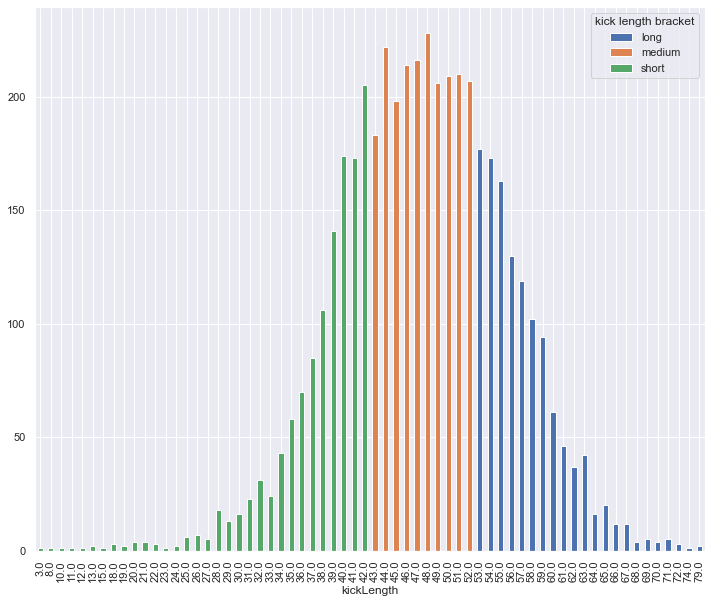

In [248]:
# looked at some of the short punts via gamepass, play description is just not picking up some blocked / partially bloked punts

punt_summary[punt_summary['punt_location'] == 'own side of field'].groupby(['kickLength','kick length bracket']).size().unstack().plot(figsize=(12,10), kind='bar', stacked=True)

<AxesSubplot:xlabel='frameId bracket'>

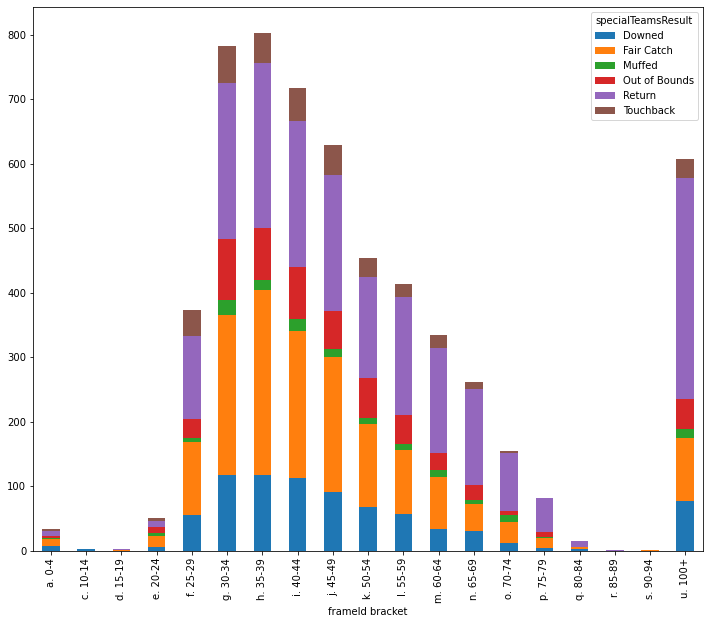

In [23]:
punt_summary.groupby(['frameId bracket','specialTeamsResult']).size().unstack().plot(figsize=(12,10), kind='bar', stacked=True)

In [24]:
c1 = (punt_summary['frameId bracket'] != 'a. 0-4') 
c2 = (punt_summary['frameId bracket'] != 'c. 10-14')
c3 = (punt_summary['frameId bracket'] != 'd. 15-19')
c4 = (punt_summary['frameId bracket'] != 'r. 85-89')
c5 = (punt_summary['frameId bracket'] != 's. 90-94')
punt_summary2 = punt_summary[c1&c2&c3&c4&c5]

Text(0.5, 1.0, 'Likelyhood of event occuring based off the earliest a gunner wins their matchup')

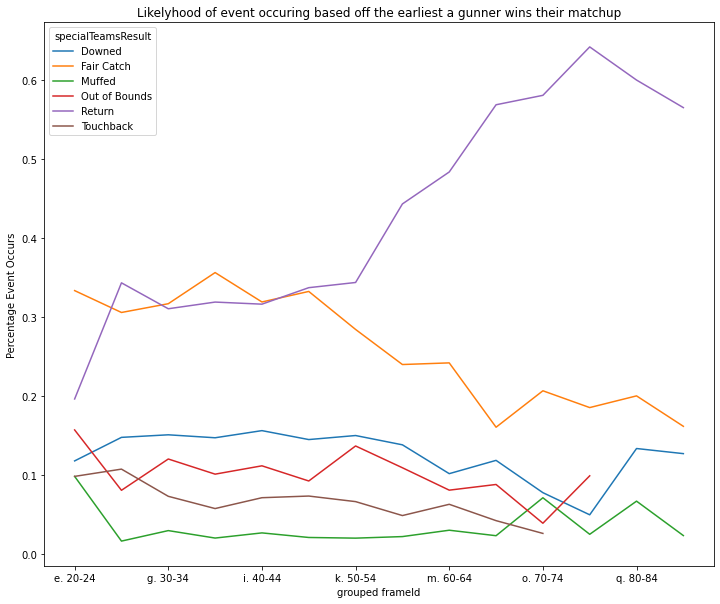

In [25]:
df_pct = (punt_summary2.groupby(['frameId bracket','specialTeamsResult'])['playId'].count()/punt_summary2.groupby(['frameId bracket'])['playId'].count())
df_pct.unstack().plot.line(figsize=(12,10))
plt.xlabel('grouped frameId')
plt.ylabel('Percentage Event Occurs')
plt.title('Likelyhood of event occuring based off the earliest a gunner wins their matchup')

<AxesSubplot:xlabel='both frameId bracket'>

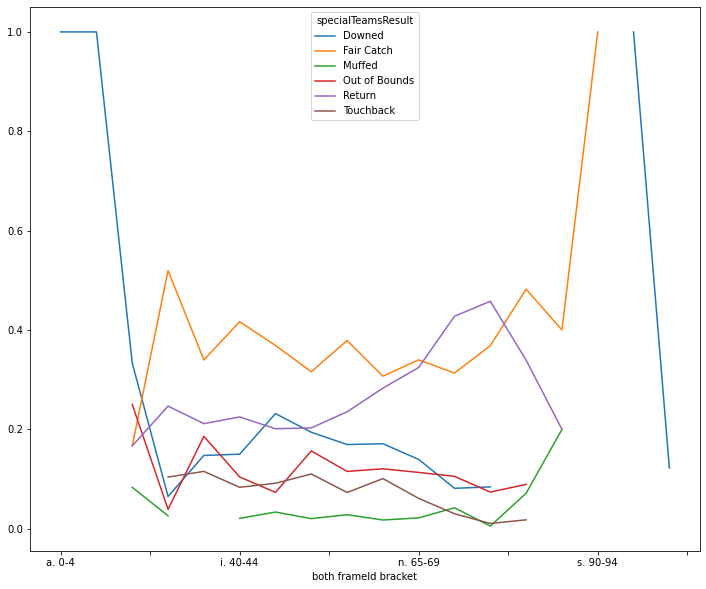

In [26]:
df_pct = (punt_summary.groupby(['both frameId bracket','specialTeamsResult'])['playId'].count()/punt_summary.groupby(['both frameId bracket'])['playId'].count())
df_pct.unstack().plot.line(figsize=(12,10))

<AxesSubplot:xlabel='frameId bracket'>

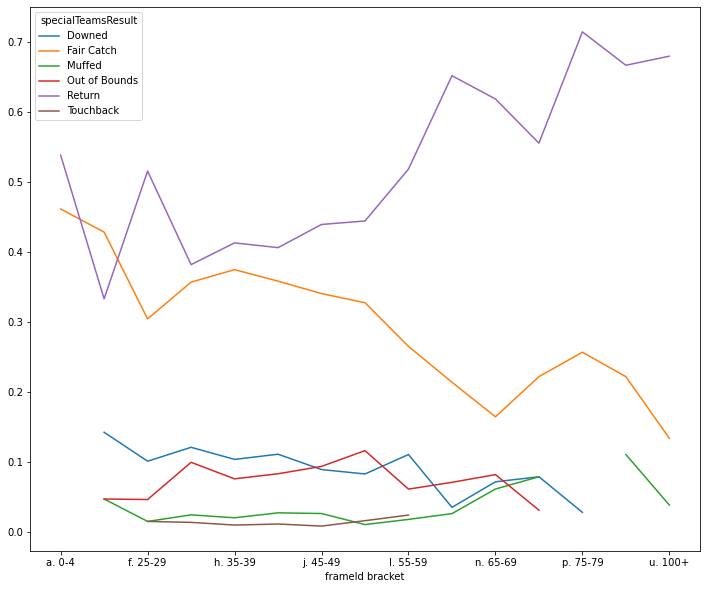

In [27]:
c1 = (punt_summary['punt_location'] == 'own side of field')
c2 = (punt_summary['kick length bracket'] == 'medium')

df_pct2 = (punt_summary[c1 & c2].groupby(['frameId bracket','specialTeamsResult'])['playId'].count()/punt_summary[c1 & c2].groupby(['frameId bracket'])['playId'].count())
df_pct2.unstack().plot.line(figsize=(12,10))

## 7.6 section looking at top gunners who beat under 5 seconds

In [262]:
# identifying the winning frame for a gunner for each play
GL1w = test_merged[test_merged['Gunner L1 winning'] == 1.0].groupby(['gameId','playId']).agg({'frameId': 'min'})
GL1w.reset_index( drop=False, inplace=True)
GL1w.rename(columns={'frameId': 'gun win frame'}, inplace=True)
GL1w['responsibility_role'] = 'Gunner L1'
GR1w = test_merged[test_merged['Gunner R1 winning'] == 1.0].groupby(['gameId','playId']).agg({'frameId': 'min'})
GR1w.reset_index( drop=False, inplace=True)
GR1w.rename(columns={'frameId': 'gun win frame'}, inplace=True)
GR1w['responsibility_role'] = 'Gunner R1'
Gw = pd.concat([GL1w,GR1w])

# assigning gunners name to the most commonly used one, sometimes multiple names per nflId, e.g. Matt Slater and Matthew Slater for the patriots gunner
player_names = snap_merged[['gameId','playId','nflId','displayName']].groupby(['nflId','displayName']).size().reset_index(name='counts')
player_names['player_name_rank'] = player_names.sort_values(['counts'], ascending = False).groupby(['nflId']).cumcount() + 1
player_names_final = player_names[player_names['player_name_rank'] == 1.0]
player_names_final.drop(columns = ['counts','player_name_rank'], axis = 1, inplace = True)

# pulling out the gunners and assigning consistent naming convention from above
gunners = snap_merged[(snap_merged['responsibility_role'] == 'Gunner L1') | (snap_merged['responsibility_role'] == 'Gunner R1')]
gunners2 = gunners[['gameId','playId','nflId','responsibility_role']]
gunners3 = pd.merge(gunners2, player_names_final, how="left", on=['nflId'])

# identifying the matchup faced by gunners by seeing how many vices were assigned near them
g_v_relationship = snap_merged[(snap_merged['play_responsibility_simple'] == 'vice')].groupby(['gameId','playId','Side_of_ball']).agg({'responsibility_rank': 'max'})
g_v_relationship.reset_index( drop=False, inplace=True)
g_v_relationship.rename(columns={'responsibility_rank': 'vices faced'}, inplace=True)
g_v_relationship.loc[g_v_relationship['Side_of_ball'] == 'left', 'responsibility_role'] = 'Gunner L1'
g_v_relationship.loc[g_v_relationship['Side_of_ball'] == 'right', 'responsibility_role'] = 'Gunner R1'

# identifying top speed and acceleration from each snap for each player in the first 3 seconds post snap
    # limited to first 3 seconds to remove spikes from tackles ect which spike acceleration
punt_speed_sum = punt_tracking3.assign(
 a_first_40 = np.where(punt_tracking3['frameId'] <= 40 ,punt_tracking3['a'],0.00),
  ).groupby(['gameId','playId','nflId','displayName']).agg({'s':max, 'a':max, 'a_first_40': max})
punt_speed_sum.reset_index( drop=False, inplace=True)
punt_speed_sum.drop(columns = ['displayName'], axis = 1, inplace = True)

# combining the above data together
r_punts = punt_summary[['gameId','playId','season','possessionTeam']]
r_punts2 = pd.merge(r_punts, gunners3, how="left", on=['gameId', 'playId'])
r_punts3 = pd.merge(r_punts2, Gw, how="left", on=['gameId', 'playId','responsibility_role'])
r_punts4 = pd.merge(r_punts3, g_v_relationship, how="left", on=['gameId', 'playId','responsibility_role'])
r_punts4['gun win frame'] = r_punts4['gun win frame'].fillna(100.0)
r_punts4.loc[r_punts4['gun win frame'] < 50.0, 'under 5.0 seconds'] = 1
r_punts4.loc[r_punts4['gun win frame'] >= 50.0, 'under 5.0 seconds'] = 0
r_punts5 = pd.merge(r_punts4, punt_speed_sum, how="left", on=['gameId', 'playId','nflId'])

# which gunners were likely the starters for the year
starters = r_punts5[['season','gameId','playId','possessionTeam','nflId','displayName']].groupby(['season','possessionTeam','nflId','displayName']).size().reset_index(name='counts')
starters['starter rank'] = starters.sort_values(['counts'], ascending = False).groupby(['season','possessionTeam']).cumcount() + 1
starters['starter'] = np.where(((starters['starter rank'] == 1)|(starters['starter rank'] == 2)) ,1,0)
starters.drop(columns = ['displayName','counts','starter rank'], axis = 1, inplace = True)

# adding starter info into the punt table
r_punts6 = pd.merge(r_punts5, starters, how="left", on=['season', 'possessionTeam','nflId'])
player_info = players[['nflId','height','weight','birthDate','Position']]
r_punts7 = pd.merge(r_punts6, player_info, how="left", on=['nflId'])

# creating summary statistics from the punt table
punt_results = r_punts7.assign(
 vices1 = np.where(r_punts7['vices faced']== 1.0 ,1.0,0.0),
 vices2 = np.where(r_punts7['vices faced']== 2.0 ,1.0,0.0),
 vices1suc = np.where(r_punts7['vices faced']== 1.0 ,r_punts7['under 5.0 seconds'],0.0),
 vices2suc = np.where(r_punts7['vices faced']== 2.0 ,r_punts7['under 5.0 seconds'],0.0)
  ).groupby(['season','possessionTeam','nflId','displayName','starter','height','weight','birthDate','Position']).agg({'s':'median', 'a_first_40': 'median', 'vices1':sum, 'vices2':sum, 'vices1suc': sum, 'vices2suc': sum})

punt_results.reset_index( drop=False, inplace=True)

punt_results['total snaps'] = punt_results['vices1'] + punt_results['vices2']
punt_results['total success'] = punt_results['vices1suc'] + punt_results['vices2suc']
punt_results['total success rate'] = punt_results['total success']/ punt_results['total snaps']
punt_results['1 vice success rate'] = punt_results['vices1suc']/ punt_results['vices1']
punt_results['2 vice success rate'] = punt_results['vices2suc']/ punt_results['vices2']
punt_results['s pct Rank'] = punt_results.groupby(['season'])['s'].rank(pct = True)
punt_results['a pct Rank'] = punt_results.groupby(['season'])['a_first_40'].rank(pct = True)
punt_results['vs 1v pct Rank'] = punt_results.groupby(['season'])['1 vice success rate'].rank(pct = True)
punt_results['vs 2v pct Rank'] = punt_results.groupby(['season'])['2 vice success rate'].rank(pct = True)
punt_results['so s pct Rank'] = punt_results.groupby(['season','starter'])['s'].rank(pct = True)
punt_results['so a pct Rank'] = punt_results.groupby(['season','starter'])['a_first_40'].rank(pct = True)
punt_results['so vs 1v pct Rank'] = punt_results.groupby(['season','starter'])['1 vice success rate'].rank(pct = True)
punt_results['so vs 2v pct Rank'] = punt_results.groupby(['season','starter'])['2 vice success rate'].rank(pct = True)

as_conditions = [
    (punt_results['so s pct Rank'] >= 0.75) & (punt_results['so a pct Rank'] >= 0.75),
    (punt_results['so s pct Rank'] >= 0.75) & (punt_results['so a pct Rank'] < 0.75),
    (punt_results['so s pct Rank'] < 0.75) & (punt_results['so a pct Rank'] >= 0.75),
    (punt_results['so s pct Rank'] < 0.25) & (punt_results['so a pct Rank'] < 0.25),
    (punt_results['so s pct Rank'] < 0.25) & (punt_results['so a pct Rank'] >= 0.25),
    (punt_results['so s pct Rank'] >= 0.25) & (punt_results['so a pct Rank'] < 0.25),
    (punt_results['so s pct Rank'] >= 0.25) & (punt_results['so s pct Rank'] < 0.75) & (punt_results['so a pct Rank'] >= 0.25) & (punt_results['so a pct Rank'] < 0.75),

    ]
as_values = ['Top S&A','Top S only','Top A only','Bot S&A','Bot S Only','Bot A Only', 'other']
punt_results['athletic summary'] = np.select(as_conditions, as_values)

ss_conditions = [
    (punt_results['so s pct Rank'] >= 0.75), 
    (punt_results['so s pct Rank'] < 0.25), 
    (punt_results['so s pct Rank'] >= 0.25) & (punt_results['so s pct Rank'] < 0.75),

    ]
ss_values = ['Gunner top 25% Speed','Gunner bottom 25% Speed', 'Gunner mid 50% Speed']
punt_results['speed summary'] = np.select(ss_conditions, ss_values)

aa_conditions = [
    (punt_results['so a pct Rank'] >= 0.75), 
    (punt_results['so a pct Rank'] < 0.25), 
    (punt_results['so a pct Rank'] >= 0.25) & (punt_results['so a pct Rank'] < 0.75),

    ]
aa_values = ['Top A','Bot A', 'other']
punt_results['acceleration summary'] = np.select(aa_conditions, aa_values)

punt_results.head(5)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,season,possessionTeam,nflId,displayName,starter,height,weight,birthDate,Position,s,a_first_40,vices1,vices2,vices1suc,vices2suc,total snaps,total success,total success rate,1 vice success rate,2 vice success rate,s pct Rank,a pct Rank,vs 1v pct Rank,vs 2v pct Rank,so s pct Rank,so a pct Rank,so vs 1v pct Rank,so vs 2v pct Rank,athletic summary,speed summary,acceleration summary
0,2018,ARI,39402.0,Eddie Pleasant,0.0,5-10,210.0,12/17/1988,SS,9.520,4.510,1.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,NaN,0.693966,0.258621,0.078125,NaN,0.732143,0.291667,0.109375,NaN,other,Gunner mid 50% Speed,other
1,2018,ARI,41377.0,Bene' Benwikere,0.0,6-0,195.0,09/03/1991,CB,9.180,5.065,9.0,3.0,5.0,0.0,12.0,5.0,0.416667,0.555556,0.000000,0.366379,0.633621,0.685268,0.260234,0.446429,0.648810,0.684375,0.341121,other,Gunner mid 50% Speed,other
2,2018,ARI,43381.0,Brandon Williams,1.0,6-0,200.0,1992-09-09,CB,9.975,4.825,55.0,27.0,34.0,3.0,82.0,37.0,0.451220,0.618182,0.111111,0.913793,0.454741,0.750000,0.587719,0.890625,0.406250,0.765625,0.445312,Top S only,Gunner top 25% Speed,other
3,2018,ARI,45021.0,Rudy Ford,1.0,6-0,204.0,1994-11-01,SS,9.990,4.890,47.0,16.0,31.0,5.0,63.0,36.0,0.571429,0.659574,0.312500,0.928879,0.495690,0.790179,0.801170,0.914062,0.437500,0.859375,0.828125,Top S only,Gunner top 25% Speed,other
4,2018,ARI,46671.0,Trent Sherfield,0.0,6-1,219.0,1996-02-26,WR,9.300,4.975,10.0,6.0,3.0,0.0,16.0,3.0,0.187500,0.300000,0.000000,0.502155,0.551724,0.283482,0.260234,0.589286,0.565476,0.353125,0.341121,other,Gunner mid 50% Speed,other


In [29]:
# top gunners by year via success rate
c1 = (punt_results['starter'] == 1.0)
s1 = ['total success rate','1 vice success rate', '2 vice success rate']
a1 = (False, False,False)

punt_results[c1].sort_values(s1, ascending = a1).head(10)

,season,possessionTeam,nflId,displayName,starter,height,weight,birthDate,Position,s,a_first_40,vices1,vices2,vices1suc,vices2suc,total snaps,total success,total success rate,1 vice success rate,2 vice success rate,s pct Rank,a pct Rank,vs 1v pct Rank,vs 2v pct Rank,so s pct Rank,so a pct Rank,so vs 1v pct Rank,so vs 2v pct Rank,athletic summary,speed summary,acceleration summary
422,2019,TEN,46221.0,Dane Cruikshank,1.0,6-1,209.0,1995-04-27,SS,9.910,4.535,55.0,18.0,46.0,4.0,73.0,50.0,0.684932,0.836364,0.222222,0.893564,0.202970,0.918367,0.781046,0.882812,0.093750,1.000000,0.742188,Top S only,Top 25 pct Speed,Bot A
507,2020,GB,43357.0,Will Redmond,1.0,5-11,186.0,1993-12-28,SS,9.740,4.670,19.0,6.0,16.0,1.0,25.0,17.0,0.680000,0.842105,0.166667,0.813636,0.215909,0.915888,0.767516,0.789062,0.125000,1.000000,0.637097,Top S only,Top 25 pct Speed,Bot A
354,2019,NE,38707.0,Justin Bethel,1.0,6-0,200.0,1990-06-17,CB,9.780,4.620,33.0,4.0,22.0,2.0,37.0,24.0,0.648649,0.666667,0.500000,0.826733,0.287129,0.811224,0.957516,0.765625,0.187500,0.875000,0.960938,Top S only,Top 25 pct Speed,Bot A
192,2018,PHI,46194.0,Avonte Maddox,1.0,5-9,184.0,1996-03-31,CB,10.070,5.330,16.0,9.0,14.0,2.0,25.0,16.0,0.640000,0.875000,0.222222,0.967672,0.812500,0.917411,0.725146,1.000000,0.867188,1.000000,0.687500,Top S&A,Top 25 pct Speed,Top A
381,2019,OAK,41362.0,Nevin Lawson,1.0,5-9,192.0,1991-04-23,CB,9.165,4.920,21.0,3.0,14.0,1.0,24.0,15.0,0.625000,0.666667,0.333333,0.299505,0.559406,0.811224,0.892157,0.117188,0.484375,0.875000,0.875000,Bot S Only,Bot 25 pct Speed,other
572,2020,NE,38707.0,Justin Bethel,1.0,6-0,200.0,1990-06-17,CB,9.920,5.130,37.0,8.0,27.0,1.0,45.0,28.0,0.622222,0.729730,0.125000,0.909091,0.597727,0.897196,0.703822,0.906250,0.656250,0.968750,0.500000,Top S only,Top 25 pct Speed,other
121,2018,KC,46757.0,Charvarius Ward,1.0,6-1,195.0,1996-05-16,CB,9.550,4.650,22.0,7.0,17.0,1.0,29.0,18.0,0.620690,0.772727,0.142857,0.724138,0.336207,0.892857,0.614035,0.648438,0.296875,0.984375,0.507812,other,other,other
647,2020,TEN,53074.0,Nick Westbrook,1.0,6-3,215.0,1997-03-21,WR,9.530,4.730,23.0,3.0,15.0,1.0,26.0,16.0,0.615385,0.652174,0.333333,0.631818,0.288636,0.850467,0.894904,0.437500,0.203125,0.937500,0.903226,Bot A Only,other,Bot A
244,2019,BAL,38707.0,Justin Bethel,1.0,6-0,200.0,1990-06-17,CB,9.785,4.960,14.0,4.0,11.0,0.0,18.0,11.0,0.611111,0.785714,0.000000,0.831683,0.596535,0.892857,0.274510,0.781250,0.585938,0.984375,0.156250,Top S only,Top 25 pct Speed,other
150,2018,NO,38596.0,Josh Robinson,1.0,5-10,200.0,01/08/1991,CB,9.690,4.470,20.0,3.0,13.0,1.0,23.0,14.0,0.608696,0.650000,0.333333,0.814655,0.234914,0.783482,0.853801,0.750000,0.132812,0.835938,0.890625,Top S only,Top 25 pct Speed,Bot A


<AxesSubplot:xlabel='1 vice success rate', ylabel='2 vice success rate'>

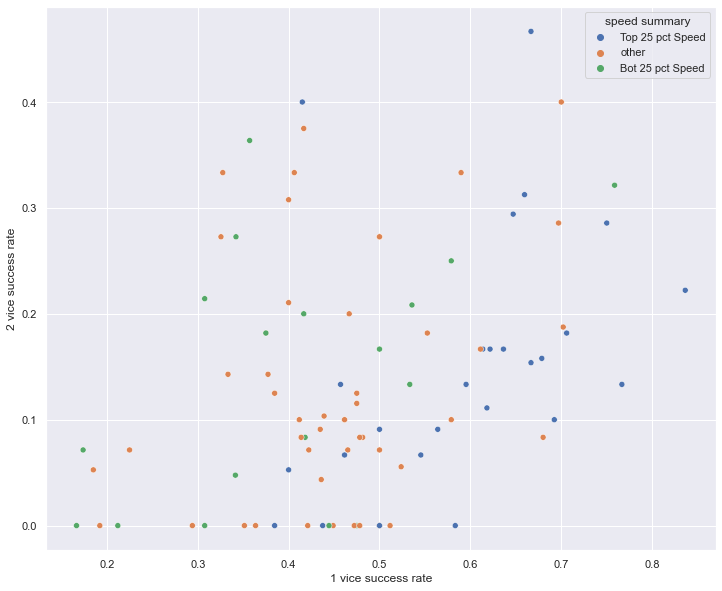

In [30]:
# scatter plot of success rate vs 1 vice and success rate vs 2 vice, colour by speed
c1 = (punt_results['starter'] == 1.0)
c2 = (punt_results['vices2'] >= 10.0)
c3 = (punt_results['vices1'] >= 10.0)
s1 = ['total success rate','1 vice success rate', '2 vice success rate']
a1 = (False, False,False)

graph_result = punt_results[c1&c2&c3].sort_values(s1, ascending = (False, False,False))
sns.set(rc={'figure.figsize':(12,10)})
sns.scatterplot(x = '1 vice success rate', y = '2 vice success rate', data=graph_result, hue='speed summary')

<AxesSubplot:xlabel='1 vice success rate', ylabel='2 vice success rate'>

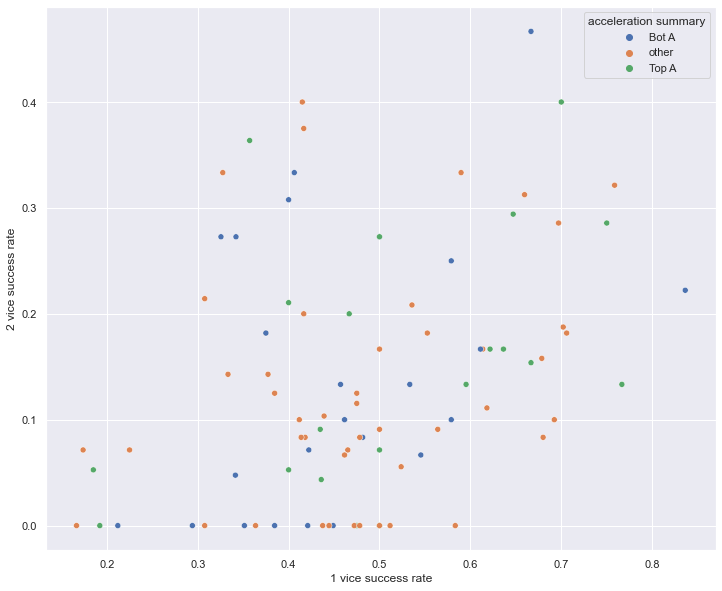

In [31]:
c1 = (punt_results['starter'] == 1.0)
c2 = (punt_results['vices2'] >= 10.0)
c3 = (punt_results['vices1'] >= 10.0)
s1 = ['total success rate','1 vice success rate', '2 vice success rate']
a1 = (False, False,False)

graph_result = punt_results[c1&c2&c3].sort_values(s1, ascending = (False, False,False))
sns.set(rc={'figure.figsize':(12,10)})
sns.scatterplot(x = '1 vice success rate', y = '2 vice success rate', data=graph_result, hue='acceleration summary')

<AxesSubplot:>

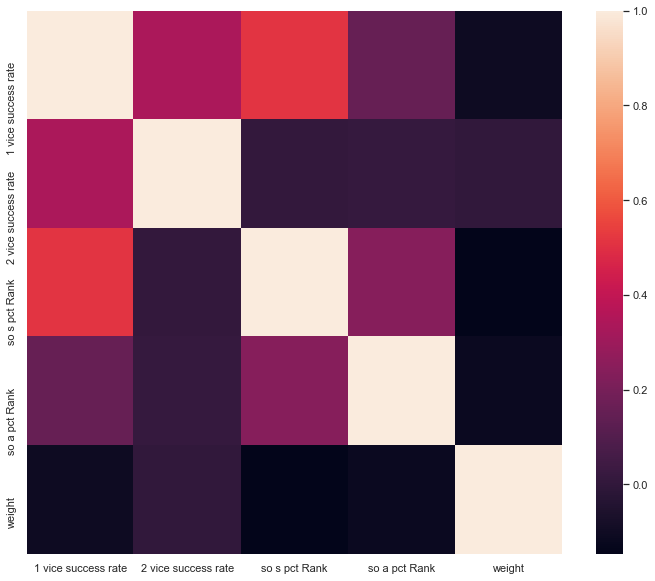

In [32]:
# correlation heat map of success to physical variables
graph_result_red = graph_result[['1 vice success rate','2 vice success rate','so s pct Rank','so a pct Rank','weight']]
sns.heatmap(graph_result_red.corr())

## 7.7 2 Vice clustering data preparation

In [33]:
sob_conditions = [
    (relevant_punt_wrd['responsibility_role'] == 'Gunner R1'),
    (relevant_punt_wrd['responsibility_role'] == 'Vice R1'),
    (relevant_punt_wrd['responsibility_role'] == 'Vice R2'),
    (relevant_punt_wrd['responsibility_role'] == 'Gunner L1'), 
    (relevant_punt_wrd['responsibility_role'] == 'Vice L1'),
    (relevant_punt_wrd['responsibility_role'] == 'Vice L2'),
    ]
sob_values = ['right','right','right','left','left','left']
relevant_punt_wrd['Side_of_ball'] = np.select(sob_conditions, sob_values)

res_gen_values = ['gunner 1','vice 1','vice 2','gunner 1','vice 1','vice 2']
relevant_punt_wrd['responsibility_general'] = np.select(sob_conditions, res_gen_values)

g_v_relationship_red = g_v_relationship[['gameId','playId','Side_of_ball','vices faced']]

relevant_punt_wrd2 = pd.merge(relevant_punt_wrd, g_v_relationship_red, how="left", on=['gameId', 'playId','Side_of_ball'])

c1 = (snap_merged['responsibility_role'] == 'Gunner R1')
c2 = (snap_merged['responsibility_role'] == 'Gunner L1')
c3 = ['gameId','playId','x','y','Side_of_ball']
snap_merged_g = snap_merged[c3][c1|c2]
snap_merged_g.rename(columns={'x': 'g start x', 'y': 'g start y'}, inplace=True)

relevant_punt_wrd3 = pd.merge(relevant_punt_wrd2, snap_merged_g, how="left", on=['gameId', 'playId','Side_of_ball'])

c1 = (relevant_punt_wrd3['responsibility_role'] == 'Gunner R1')
c2 = (relevant_punt_wrd3['responsibility_role'] == 'Gunner L1')
c3 = (relevant_punt_wrd3['responsibility_role'] == 'Vice L1')
c4 = (relevant_punt_wrd3['responsibility_role'] == 'Vice L2')
c5 = (relevant_punt_wrd3['responsibility_role'] == 'Vice R1')
c6 = (relevant_punt_wrd3['responsibility_role'] == 'Vice R2')
c7 = (relevant_punt_wrd3['frameId'] == 1)
c72 = (relevant_punt_wrd3['frameId'] <= 40) #first 3 seconds post snap
c8 = ['gameId','playId','playDirection','nflId','responsibility_role','play_responsibility_simple','responsibility_general','Side_of_ball','vices faced','frameId','x','y','g start x','g start y']

relevant_punt_reduced = relevant_punt_wrd3[c8][(c1|c2|c3|c4|c5|c6)&c72]

relevant_punt_conds = relevant_punt_wrd3[c8][(c1|c2|c3|c4|c5|c6)&c72]

# excluding blocked punts and short punts under 35 yards. (we want gunners tracking to develop)
relevant_kicks = punt_summary[['gameId','playId']][punt_summary['kickLength'] >= 35.0]
relevant_punt_conds2 = pd.merge(relevant_punt_conds, relevant_kicks, how="inner", on=['gameId', 'playId'])
# excluding cases where vices were above 2
relevant_punt_reduced = relevant_punt_conds2[(relevant_punt_conds2['vices faced'] == 1.0)|(relevant_punt_conds2['vices faced'] == 2.0)]
relevant_punt_reduced.head(10)

,gameId,playId,playDirection,nflId,responsibility_role,play_responsibility_simple,responsibility_general,Side_of_ball,vices faced,frameId,x,y,g start x,g start y
0,2018123000,892,left,43407,Gunner R1,gunner,gunner 1,right,1.0,1,81.87,48.74,81.86,48.75
1,2018123000,892,left,43407,Gunner R1,gunner,gunner 1,right,1.0,2,81.87,48.74,81.86,48.75
2,2018123000,892,left,43407,Gunner R1,gunner,gunner 1,right,1.0,3,81.87,48.74,81.86,48.75
3,2018123000,892,left,43407,Gunner R1,gunner,gunner 1,right,1.0,4,81.87,48.74,81.86,48.75
4,2018123000,892,left,43407,Gunner R1,gunner,gunner 1,right,1.0,5,81.87,48.74,81.86,48.75
5,2018123000,892,left,43407,Gunner R1,gunner,gunner 1,right,1.0,6,81.87,48.75,81.86,48.75
6,2018123000,892,left,43407,Gunner R1,gunner,gunner 1,right,1.0,7,81.87,48.75,81.86,48.75
7,2018123000,892,left,43407,Gunner R1,gunner,gunner 1,right,1.0,8,81.87,48.75,81.86,48.75
8,2018123000,892,left,43407,Gunner R1,gunner,gunner 1,right,1.0,9,81.87,48.75,81.86,48.75
9,2018123000,892,left,43407,Gunner R1,gunner,gunner 1,right,1.0,10,81.87,48.75,81.86,48.75


In [34]:
# converting the x y axis so it is centered on the gunners position, with gunners position at the snap of the ball being (0,0)
loc_conditions = [
    ((relevant_punt_reduced['playDirection'] == 'left')&(relevant_punt_reduced['Side_of_ball'] == 'right')),
    ((relevant_punt_reduced['playDirection'] == 'left')&(relevant_punt_reduced['Side_of_ball'] == 'left')),
    ((relevant_punt_reduced['playDirection'] == 'right')&(relevant_punt_reduced['Side_of_ball'] == 'right')),
    ((relevant_punt_reduced['playDirection'] == 'right')&(relevant_punt_reduced['Side_of_ball'] == 'left')), 
    ]
loc_x_values = [(relevant_punt_reduced['g start x'] - relevant_punt_reduced['x']),(relevant_punt_reduced['g start x'] - relevant_punt_reduced['x']),(relevant_punt_reduced['x'] - relevant_punt_reduced['g start x']),(relevant_punt_reduced['x'] - relevant_punt_reduced['g start x'])]

loc_y_values = [(relevant_punt_reduced['y'] - relevant_punt_reduced['g start y']),(relevant_punt_reduced['g start y'] - relevant_punt_reduced['y']),(relevant_punt_reduced['g start y'] - relevant_punt_reduced['y']),(relevant_punt_reduced['y'] - relevant_punt_reduced['g start y'])]

relevant_punt_reduced['Standard y'] = np.select(loc_conditions, loc_x_values)
relevant_punt_reduced['Standard x'] = np.select(loc_conditions, loc_y_values)
relevant_punt_reduced.head(15)

<ipython-input-34-5f42a3e3308b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_punt_reduced['Standard y'] = np.select(loc_conditions, loc_x_values)
<ipython-input-34-5f42a3e3308b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_punt_reduced['Standard x'] = np.select(loc_conditions, loc_y_values)


,gameId,playId,playDirection,nflId,responsibility_role,play_responsibility_simple,responsibility_general,Side_of_ball,vices faced,frameId,x,y,g start x,g start y,Standard y,Standard x
0,2018123000,892,left,43407,Gunner R1,gunner,gunner 1,right,1.0,1,81.87,48.74,81.86,48.75,-0.01,-0.01
1,2018123000,892,left,43407,Gunner R1,gunner,gunner 1,right,1.0,2,81.87,48.74,81.86,48.75,-0.01,-0.01
2,2018123000,892,left,43407,Gunner R1,gunner,gunner 1,right,1.0,3,81.87,48.74,81.86,48.75,-0.01,-0.01
3,2018123000,892,left,43407,Gunner R1,gunner,gunner 1,right,1.0,4,81.87,48.74,81.86,48.75,-0.01,-0.01
4,2018123000,892,left,43407,Gunner R1,gunner,gunner 1,right,1.0,5,81.87,48.74,81.86,48.75,-0.01,-0.01
5,2018123000,892,left,43407,Gunner R1,gunner,gunner 1,right,1.0,6,81.87,48.75,81.86,48.75,-0.01,0.00
6,2018123000,892,left,43407,Gunner R1,gunner,gunner 1,right,1.0,7,81.87,48.75,81.86,48.75,-0.01,0.00
7,2018123000,892,left,43407,Gunner R1,gunner,gunner 1,right,1.0,8,81.87,48.75,81.86,48.75,-0.01,0.00
8,2018123000,892,left,43407,Gunner R1,gunner,gunner 1,right,1.0,9,81.87,48.75,81.86,48.75,-0.01,0.00
9,2018123000,892,left,43407,Gunner R1,gunner,gunner 1,right,1.0,10,81.87,48.75,81.86,48.75,-0.01,0.00


In [35]:
testcase_y = pd.pivot_table(relevant_punt_reduced, values='Standard y', index=['gameId','playId','Side_of_ball','vices faced','responsibility_general'],
                    columns=['frameId'], aggfunc=np.sum)
testcase_y.reset_index( drop=False, inplace=True)

testcase_x = pd.pivot_table(relevant_punt_reduced, values='Standard x', index=['gameId','playId','Side_of_ball','vices faced','responsibility_general'],
                    columns=['frameId'], aggfunc=np.sum)
testcase_x.reset_index( drop=False, inplace=True)

testcase_y.head(5)

frameId,gameId,playId,Side_of_ball,vices faced,responsibility_general,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
0,2018090600,366,left,2.0,gunner 1,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.02,0.03,0.06,0.11,0.16,0.22,0.28,0.35,0.40,0.43,0.43,0.43,0.42,0.41,0.39,0.39,0.42,0.49,0.59,0.75,0.97,1.26,1.61,2.03,2.50,3.04
1,2018090600,366,left,2.0,vice 1,1.88,1.88,1.88,1.88,1.88,1.88,1.88,1.88,1.88,1.89,1.89,1.89,1.89,1.90,1.91,1.92,1.94,1.97,2.00,2.05,2.13,2.22,2.33,2.44,2.57,2.69,2.82,2.94,3.06,3.20,3.35,3.52,3.70,3.89,4.14,4.40,4.70,5.03,5.41,5.81
2,2018090600,366,left,2.0,vice 2,1.73,1.73,1.73,1.73,1.73,1.73,1.73,1.73,1.73,1.73,1.73,1.72,1.72,1.72,1.71,1.71,1.68,1.63,1.58,1.50,1.42,1.32,1.22,1.11,1.01,0.92,0.85,0.82,0.84,0.91,1.02,1.18,1.40,1.67,1.98,2.33,2.73,3.16,3.63,4.14
3,2018090600,366,right,2.0,gunner 1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.03,0.07,0.14,0.21,0.32,0.47,0.64,0.84,1.06,1.29,1.57,1.87,2.19,2.54,2.94,3.37,3.85,4.38,4.95,5.58,6.24,6.94,7.68,8.44,9.23,10.03
4,2018090600,366,right,2.0,vice 1,1.95,1.95,1.95,1.95,1.95,1.95,1.95,1.95,1.95,1.95,1.96,1.96,1.96,1.96,1.97,1.99,2.04,2.12,2.22,2.33,2.49,2.68,2.89,3.14,3.44,3.78,4.14,4.54,4.97,5.43,5.92,6.44,6.98,7.55,8.13,8.74,9.38,10.04,10.71,11.40


In [36]:
y_gunner_2v = testcase_y[(testcase_y['vices faced'] == 2.0)&(testcase_y['responsibility_general'] == 'gunner 1')]
y_gunner_2v.rename(columns={1: "1_y_g1",2: "2_y_g1",3: "3_y_g1",4: "4_y_g1",5: "5_y_g1",6: "6_y_g1",7: "7_y_g1",8: "8_y_g1",9: "9_y_g1",10: "10_y_g1",11: "11_y_g1",12: "12_y_g1",13: "13_y_g1",14: "14_y_g1",15: "15_y_g1",16: "16_y_g1",17: "17_y_g1",18: "18_y_g1",19: "19_y_g1",20: "20_y_g1",21: "21_y_g1",22: "22_y_g1",23: "23_y_g1",24: "24_y_g1",25: "25_y_g1",26: "26_y_g1",27: "27_y_g1",28: "28_y_g1",29: "29_y_g1",30: "30_y_g1",31: "31_y_g1",32: "32_y_g1",33: "33_y_g1",34: "34_y_g1",35: "35_y_g1",36: "36_y_g1",37: "37_y_g1",38: "38_y_g1",39: "39_y_g1",40: "40_y_g1"}, inplace=True)
y_gunner_2v.drop(columns = ['responsibility_general','vices faced'], axis = 1, inplace = True)

y_vice1_2v = testcase_y[(testcase_y['vices faced'] == 2.0)&(testcase_y['responsibility_general'] == 'vice 1')]
y_vice1_2v.rename(columns={1: "1_y_v1",2: "2_y_v1",3: "3_y_v1",4: "4_y_v1",5: "5_y_v1",6: "6_y_v1",7: "7_y_v1",8: "8_y_v1",9: "9_y_v1",10: "10_y_v1",11: "11_y_v1",12: "12_y_v1",13: "13_y_v1",14: "14_y_v1",15: "15_y_v1",16: "16_y_v1",17: "17_y_v1",18: "18_y_v1",19: "19_y_v1",20: "20_y_v1",21: "21_y_v1",22: "22_y_v1",23: "23_y_v1",24: "24_y_v1",25: "25_y_v1",26: "26_y_v1",27: "27_y_v1",28: "28_y_v1",29: "29_y_v1",30: "30_y_v1",31: "31_y_v1",32: "32_y_v1",33: "33_y_v1",34: "34_y_v1",35: "35_y_v1",36: "36_y_v1",37: "37_y_v1",38: "38_y_v1",39: "39_y_v1",40: "40_y_v1"}, inplace=True)
y_vice1_2v.drop(columns = ['responsibility_general','vices faced'], axis = 1, inplace = True)

y_vice2_2v = testcase_y[(testcase_y['vices faced'] == 2.0)&(testcase_y['responsibility_general'] == 'vice 2')]
y_vice2_2v.rename(columns={1: "1_y_v2",2: "2_y_v2",3: "3_y_v2",4: "4_y_v2",5: "5_y_v2",6: "6_y_v2",7: "7_y_v2",8: "8_y_v2",9: "9_y_v2",10: "10_y_v2",11: "11_y_v2",12: "12_y_v2",13: "13_y_v2",14: "14_y_v2",15: "15_y_v2",16: "16_y_v2",17: "17_y_v2",18: "18_y_v2",19: "19_y_v2",20: "20_y_v2",21: "21_y_v2",22: "22_y_v2",23: "23_y_v2",24: "24_y_v2",25: "25_y_v2",26: "26_y_v2",27: "27_y_v2",28: "28_y_v2",29: "29_y_v2",30: "30_y_v2",31: "31_y_v2",32: "32_y_v2",33: "33_y_v2",34: "34_y_v2",35: "35_y_v2",36: "36_y_v2",37: "37_y_v2",38: "38_y_v2",39: "39_y_v2",40: "40_y_v2"}, inplace=True)
y_vice2_2v.drop(columns = ['responsibility_general','vices faced'], axis = 1, inplace = True)

x_gunner_2v = testcase_x[(testcase_x['vices faced'] == 2.0)&(testcase_x['responsibility_general'] == 'gunner 1')]
x_gunner_2v.rename(columns={1: "1_x_g1",2: "2_x_g1",3: "3_x_g1",4: "4_x_g1",5: "5_x_g1",6: "6_x_g1",7: "7_x_g1",8: "8_x_g1",9: "9_x_g1",10: "10_x_g1",11: "11_x_g1",12: "12_x_g1",13: "13_x_g1",14: "14_x_g1",15: "15_x_g1",16: "16_x_g1",17: "17_x_g1",18: "18_x_g1",19: "19_x_g1",20: "20_x_g1",21: "21_x_g1",22: "22_x_g1",23: "23_x_g1",24: "24_x_g1",25: "25_x_g1",26: "26_x_g1",27: "27_x_g1",28: "28_x_g1",29: "29_x_g1",30: "30_x_g1",31: "31_x_g1",32: "32_x_g1",33: "33_x_g1",34: "34_x_g1",35: "35_x_g1",36: "36_x_g1",37: "37_x_g1",38: "38_x_g1",39: "39_x_g1",40: "40_x_g1"}, inplace=True)
x_gunner_2v.drop(columns = ['responsibility_general','vices faced'], axis = 1, inplace = True)

x_vice1_2v = testcase_x[(testcase_x['vices faced'] == 2.0)&(testcase_x['responsibility_general'] == 'vice 1')]
x_vice1_2v.rename(columns={1: "1_x_v1",2: "2_x_v1",3: "3_x_v1",4: "4_x_v1",5: "5_x_v1",6: "6_x_v1",7: "7_x_v1",8: "8_x_v1",9: "9_x_v1",10: "10_x_v1",11: "11_x_v1",12: "12_x_v1",13: "13_x_v1",14: "14_x_v1",15: "15_x_v1",16: "16_x_v1",17: "17_x_v1",18: "18_x_v1",19: "19_x_v1",20: "20_x_v1",21: "21_x_v1",22: "22_x_v1",23: "23_x_v1",24: "24_x_v1",25: "25_x_v1",26: "26_x_v1",27: "27_x_v1",28: "28_x_v1",29: "29_x_v1",30: "30_x_v1",31: "31_x_v1",32: "32_x_v1",33: "33_x_v1",34: "34_x_v1",35: "35_x_v1",36: "36_x_v1",37: "37_x_v1",38: "38_x_v1",39: "39_x_v1",40: "40_x_v1"}, inplace=True)
x_vice1_2v.drop(columns = ['responsibility_general','vices faced'], axis = 1, inplace = True)

x_vice2_2v = testcase_x[(testcase_x['vices faced'] == 2.0)&(testcase_x['responsibility_general'] == 'vice 2')]
x_vice2_2v.rename(columns={1: "1_x_v2",2: "2_x_v2",3: "3_x_v2",4: "4_x_v2",5: "5_x_v2",6: "6_x_v2",7: "7_x_v2",8: "8_x_v2",9: "9_x_v2",10: "10_x_v2",11: "11_x_v2",12: "12_x_v2",13: "13_x_v2",14: "14_x_v2",15: "15_x_v2",16: "16_x_v2",17: "17_x_v2",18: "18_x_v2",19: "19_x_v2",20: "20_x_v2",21: "21_x_v2",22: "22_x_v2",23: "23_x_v2",24: "24_x_v2",25: "25_x_v2",26: "26_x_v2",27: "27_x_v2",28: "28_x_v2",29: "29_x_v2",30: "30_x_v2",31: "31_x_v2",32: "32_x_v2",33: "33_x_v2",34: "34_x_v2",35: "35_x_v2",36: "36_x_v2",37: "37_x_v2",38: "38_x_v2",39: "39_x_v2",40: "40_x_v2"}, inplace=True)
x_vice2_2v.drop(columns = ['responsibility_general','vices faced'], axis = 1, inplace = True)

y_gunner_2v.head(5)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/opt/anaconda3/lib/pytho

frameId,gameId,playId,Side_of_ball,1_y_g1,2_y_g1,3_y_g1,4_y_g1,5_y_g1,6_y_g1,7_y_g1,8_y_g1,9_y_g1,10_y_g1,11_y_g1,12_y_g1,13_y_g1,14_y_g1,15_y_g1,16_y_g1,17_y_g1,18_y_g1,19_y_g1,20_y_g1,21_y_g1,22_y_g1,23_y_g1,24_y_g1,25_y_g1,26_y_g1,27_y_g1,28_y_g1,29_y_g1,30_y_g1,31_y_g1,32_y_g1,33_y_g1,34_y_g1,35_y_g1,36_y_g1,37_y_g1,38_y_g1,39_y_g1,40_y_g1
0,2018090600,366,left,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.0,0.01,0.01,0.01,0.02,0.03,0.06,0.11,0.16,0.22,0.28,0.35,0.40,0.43,0.43,0.43,0.42,0.41,0.39,0.39,0.42,0.49,0.59,0.75,0.97,1.26,1.61,2.03,2.50,3.04
3,2018090600,366,right,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.01,0.03,0.07,0.14,0.21,0.32,0.47,0.64,0.84,1.06,1.29,1.57,1.87,2.19,2.54,2.94,3.37,3.85,4.38,4.95,5.58,6.24,6.94,7.68,8.44,9.23,10.03
8,2018090600,872,right,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.02,0.06,0.12,0.21,0.33,0.48,0.66,0.87,1.12,1.40,1.70,2.02,2.34,2.69,3.05,3.42,3.80,4.20,4.63,5.07,5.55,6.06,6.62,7.22,7.85
21,2018090600,1989,right,-0.02,-0.02,-0.03,-0.04,-0.04,-0.03,-0.03,-0.02,-0.02,-0.01,0.0,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,0.01,0.04,0.08,0.13,0.19,0.28,0.40,0.54,0.71,0.90,1.13,1.40,1.70,2.03,2.41,2.82,3.28,3.77,4.29,4.83,5.39,5.96,6.54
30,2018090600,2599,right,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.00,0.0,0.00,0.00,0.01,0.01,0.02,0.04,0.08,0.13,0.20,0.30,0.42,0.58,0.76,0.98,1.22,1.51,1.82,2.16,2.52,2.91,3.33,3.76,4.21,4.68,5.18,5.70,6.24,6.81,7.41


In [37]:
cluster_base = y_gunner_2v[['gameId','playId','Side_of_ball']]

cluster_base2 = pd.merge(cluster_base, x_gunner_2v, how="left", on=['gameId', 'playId','Side_of_ball'])
cluster_base3 = pd.merge(cluster_base2, y_gunner_2v, how="left", on=['gameId', 'playId','Side_of_ball'])
cluster_base4 = pd.merge(cluster_base3, x_vice1_2v, how="left", on=['gameId', 'playId','Side_of_ball'])
cluster_base5 = pd.merge(cluster_base4, y_vice1_2v, how="left", on=['gameId', 'playId','Side_of_ball'])
cluster_base6 = pd.merge(cluster_base5, x_vice2_2v, how="left", on=['gameId', 'playId','Side_of_ball'])
cluster_base7 = pd.merge(cluster_base6, y_vice2_2v, how="left", on=['gameId', 'playId','Side_of_ball'])


cluster_base7.head(5)

frameId,gameId,playId,Side_of_ball,1_x_g1,2_x_g1,3_x_g1,4_x_g1,5_x_g1,6_x_g1,7_x_g1,8_x_g1,9_x_g1,10_x_g1,11_x_g1,12_x_g1,13_x_g1,14_x_g1,15_x_g1,16_x_g1,17_x_g1,18_x_g1,19_x_g1,20_x_g1,21_x_g1,22_x_g1,...,16_y_v2,17_y_v2,18_y_v2,19_y_v2,20_y_v2,21_y_v2,22_y_v2,23_y_v2,24_y_v2,25_y_v2,26_y_v2,27_y_v2,28_y_v2,29_y_v2,30_y_v2,31_y_v2,32_y_v2,33_y_v2,34_y_v2,35_y_v2,36_y_v2,37_y_v2,38_y_v2,39_y_v2,40_y_v2
0,2018090600,366,left,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.0,0.01,0.01,0.05,0.13,0.26,0.45,0.71,1.01,1.34,1.71,2.11,...,1.71,1.68,1.63,1.58,1.50,1.42,1.32,1.22,1.11,1.01,0.92,0.85,0.82,0.84,0.91,1.02,1.18,1.40,1.67,1.98,2.33,2.73,3.16,3.63,4.14
1,2018090600,366,right,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.02,0.06,0.14,0.28,0.48,0.72,1.04,1.42,1.86,2.33,...,1.90,1.88,1.85,1.84,1.84,1.84,1.88,1.93,2.02,2.14,2.30,2.51,2.74,3.02,3.33,3.67,4.05,4.47,4.92,5.40,5.93,6.49,7.08,7.69,8.33
2,2018090600,872,right,0.00,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,0.0,0.00,0.01,0.02,0.03,0.09,0.21,0.39,0.62,0.91,1.24,1.61,...,2.09,2.09,2.08,2.08,2.07,2.07,2.09,2.13,2.20,2.29,2.43,2.59,2.80,3.05,3.35,3.67,4.04,4.45,4.89,5.36,5.87,6.41,6.97,7.55,8.15
3,2018090600,1989,right,0.03,0.04,0.04,0.04,0.05,0.05,0.05,0.06,0.05,0.03,0.0,-0.03,-0.06,-0.11,-0.23,-0.42,-0.68,-1.02,-1.44,-1.90,-2.41,-2.97,...,1.77,1.76,1.76,1.77,1.78,1.79,1.86,1.92,2.03,2.17,2.34,2.56,2.81,3.11,3.44,3.81,4.21,4.65,5.11,5.60,6.11,6.65,7.20,7.77,8.35
4,2018090600,2599,right,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.01,0.01,0.0,-0.02,-0.04,-0.10,-0.23,-0.45,-0.76,-1.14,-1.59,-2.11,-2.68,-3.28,...,1.62,1.63,1.64,1.70,1.76,1.82,1.91,2.04,2.22,2.42,2.64,2.91,3.20,3.52,3.85,4.20,4.58,4.99,5.43,5.88,6.37,6.88,7.42,7.97,8.55


## 7.8 K Means Double Layer, Cluster on Pre Snap & Cluster on Post Snap

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


## 7.9 Pre Snap Clustering

In [39]:
#only bring through first 10 frames, as ball snap happens on frame 11
relevant_punt_reduced_pre_snap = relevant_punt_reduced[relevant_punt_reduced['frameId'] <= 10]

#pivoting around so all frames for a play are on one line for easy clustering
testcase_y_prs = pd.pivot_table(relevant_punt_reduced_pre_snap, values='Standard y', index=['gameId','playId','Side_of_ball','vices faced','responsibility_general'],
                    columns=['frameId'], aggfunc=np.sum)
testcase_y_prs.reset_index( drop=False, inplace=True)

testcase_x_prs = pd.pivot_table(relevant_punt_reduced_pre_snap, values='Standard x', index=['gameId','playId','Side_of_ball','vices faced','responsibility_general'],
                    columns=['frameId'], aggfunc=np.sum)
testcase_x_prs.reset_index( drop=False, inplace=True)

#splitting by responsibility and renaming columns for easy use when joined
y_gunner_2v_prs = testcase_y_prs[(testcase_y_prs['vices faced'] == 2.0)&(testcase_y_prs['responsibility_general'] == 'gunner 1')]
y_gunner_2v_prs.rename(columns={1: "1_y_g1",2: "2_y_g1",3: "3_y_g1",4: "4_y_g1",5: "5_y_g1",6: "6_y_g1",7: "7_y_g1",8: "8_y_g1",9: "9_y_g1",10: "10_y_g1",11: "11_y_g1",12: "12_y_g1",13: "13_y_g1",14: "14_y_g1",15: "15_y_g1",16: "16_y_g1",17: "17_y_g1",18: "18_y_g1",19: "19_y_g1",20: "20_y_g1",21: "21_y_g1",22: "22_y_g1",23: "23_y_g1",24: "24_y_g1",25: "25_y_g1",26: "26_y_g1",27: "27_y_g1",28: "28_y_g1",29: "29_y_g1",30: "30_y_g1",31: "31_y_g1",32: "32_y_g1",33: "33_y_g1",34: "34_y_g1",35: "35_y_g1",36: "36_y_g1",37: "37_y_g1",38: "38_y_g1",39: "39_y_g1",40: "40_y_g1"}, inplace=True)
y_gunner_2v_prs.drop(columns = ['responsibility_general','vices faced'], axis = 1, inplace = True)

y_vice1_2v_prs = testcase_y_prs[(testcase_y_prs['vices faced'] == 2.0)&(testcase_y_prs['responsibility_general'] == 'vice 1')]
y_vice1_2v_prs.rename(columns={1: "1_y_v1",2: "2_y_v1",3: "3_y_v1",4: "4_y_v1",5: "5_y_v1",6: "6_y_v1",7: "7_y_v1",8: "8_y_v1",9: "9_y_v1",10: "10_y_v1",11: "11_y_v1",12: "12_y_v1",13: "13_y_v1",14: "14_y_v1",15: "15_y_v1",16: "16_y_v1",17: "17_y_v1",18: "18_y_v1",19: "19_y_v1",20: "20_y_v1",21: "21_y_v1",22: "22_y_v1",23: "23_y_v1",24: "24_y_v1",25: "25_y_v1",26: "26_y_v1",27: "27_y_v1",28: "28_y_v1",29: "29_y_v1",30: "30_y_v1",31: "31_y_v1",32: "32_y_v1",33: "33_y_v1",34: "34_y_v1",35: "35_y_v1",36: "36_y_v1",37: "37_y_v1",38: "38_y_v1",39: "39_y_v1",40: "40_y_v1"}, inplace=True)
y_vice1_2v_prs.drop(columns = ['responsibility_general','vices faced'], axis = 1, inplace = True)

y_vice2_2v_prs = testcase_y_prs[(testcase_y_prs['vices faced'] == 2.0)&(testcase_y_prs['responsibility_general'] == 'vice 2')]
y_vice2_2v_prs.rename(columns={1: "1_y_v2",2: "2_y_v2",3: "3_y_v2",4: "4_y_v2",5: "5_y_v2",6: "6_y_v2",7: "7_y_v2",8: "8_y_v2",9: "9_y_v2",10: "10_y_v2",11: "11_y_v2",12: "12_y_v2",13: "13_y_v2",14: "14_y_v2",15: "15_y_v2",16: "16_y_v2",17: "17_y_v2",18: "18_y_v2",19: "19_y_v2",20: "20_y_v2",21: "21_y_v2",22: "22_y_v2",23: "23_y_v2",24: "24_y_v2",25: "25_y_v2",26: "26_y_v2",27: "27_y_v2",28: "28_y_v2",29: "29_y_v2",30: "30_y_v2",31: "31_y_v2",32: "32_y_v2",33: "33_y_v2",34: "34_y_v2",35: "35_y_v2",36: "36_y_v2",37: "37_y_v2",38: "38_y_v2",39: "39_y_v2",40: "40_y_v2"}, inplace=True)
y_vice2_2v_prs.drop(columns = ['responsibility_general','vices faced'], axis = 1, inplace = True)

x_gunner_2v_prs = testcase_x_prs[(testcase_x_prs['vices faced'] == 2.0)&(testcase_x_prs['responsibility_general'] == 'gunner 1')]
x_gunner_2v_prs.rename(columns={1: "1_x_g1",2: "2_x_g1",3: "3_x_g1",4: "4_x_g1",5: "5_x_g1",6: "6_x_g1",7: "7_x_g1",8: "8_x_g1",9: "9_x_g1",10: "10_x_g1",11: "11_x_g1",12: "12_x_g1",13: "13_x_g1",14: "14_x_g1",15: "15_x_g1",16: "16_x_g1",17: "17_x_g1",18: "18_x_g1",19: "19_x_g1",20: "20_x_g1",21: "21_x_g1",22: "22_x_g1",23: "23_x_g1",24: "24_x_g1",25: "25_x_g1",26: "26_x_g1",27: "27_x_g1",28: "28_x_g1",29: "29_x_g1",30: "30_x_g1",31: "31_x_g1",32: "32_x_g1",33: "33_x_g1",34: "34_x_g1",35: "35_x_g1",36: "36_x_g1",37: "37_x_g1",38: "38_x_g1",39: "39_x_g1",40: "40_x_g1"}, inplace=True)
x_gunner_2v_prs.drop(columns = ['responsibility_general','vices faced'], axis = 1, inplace = True)

x_vice1_2v_prs = testcase_x_prs[(testcase_x_prs['vices faced'] == 2.0)&(testcase_x_prs['responsibility_general'] == 'vice 1')]
x_vice1_2v_prs.rename(columns={1: "1_x_v1",2: "2_x_v1",3: "3_x_v1",4: "4_x_v1",5: "5_x_v1",6: "6_x_v1",7: "7_x_v1",8: "8_x_v1",9: "9_x_v1",10: "10_x_v1",11: "11_x_v1",12: "12_x_v1",13: "13_x_v1",14: "14_x_v1",15: "15_x_v1",16: "16_x_v1",17: "17_x_v1",18: "18_x_v1",19: "19_x_v1",20: "20_x_v1",21: "21_x_v1",22: "22_x_v1",23: "23_x_v1",24: "24_x_v1",25: "25_x_v1",26: "26_x_v1",27: "27_x_v1",28: "28_x_v1",29: "29_x_v1",30: "30_x_v1",31: "31_x_v1",32: "32_x_v1",33: "33_x_v1",34: "34_x_v1",35: "35_x_v1",36: "36_x_v1",37: "37_x_v1",38: "38_x_v1",39: "39_x_v1",40: "40_x_v1"}, inplace=True)
x_vice1_2v_prs.drop(columns = ['responsibility_general','vices faced'], axis = 1, inplace = True)

x_vice2_2v_prs = testcase_x_prs[(testcase_x_prs['vices faced'] == 2.0)&(testcase_x_prs['responsibility_general'] == 'vice 2')]
x_vice2_2v_prs.rename(columns={1: "1_x_v2",2: "2_x_v2",3: "3_x_v2",4: "4_x_v2",5: "5_x_v2",6: "6_x_v2",7: "7_x_v2",8: "8_x_v2",9: "9_x_v2",10: "10_x_v2",11: "11_x_v2",12: "12_x_v2",13: "13_x_v2",14: "14_x_v2",15: "15_x_v2",16: "16_x_v2",17: "17_x_v2",18: "18_x_v2",19: "19_x_v2",20: "20_x_v2",21: "21_x_v2",22: "22_x_v2",23: "23_x_v2",24: "24_x_v2",25: "25_x_v2",26: "26_x_v2",27: "27_x_v2",28: "28_x_v2",29: "29_x_v2",30: "30_x_v2",31: "31_x_v2",32: "32_x_v2",33: "33_x_v2",34: "34_x_v2",35: "35_x_v2",36: "36_x_v2",37: "37_x_v2",38: "38_x_v2",39: "39_x_v2",40: "40_x_v2"}, inplace=True)
x_vice2_2v_prs.drop(columns = ['responsibility_general','vices faced'], axis = 1, inplace = True)

# everything joined so all (x,y) data is on one line
cluster_base_prs = y_gunner_2v_prs[['gameId','playId','Side_of_ball']]

cluster_base2_prs = pd.merge(cluster_base_prs, x_gunner_2v_prs, how="left", on=['gameId', 'playId','Side_of_ball'])
cluster_base3_prs = pd.merge(cluster_base2_prs, y_gunner_2v_prs, how="left", on=['gameId', 'playId','Side_of_ball'])
cluster_base4_prs = pd.merge(cluster_base3_prs, x_vice1_2v_prs, how="left", on=['gameId', 'playId','Side_of_ball'])
cluster_base5_prs = pd.merge(cluster_base4_prs, y_vice1_2v_prs, how="left", on=['gameId', 'playId','Side_of_ball'])
cluster_base6_prs = pd.merge(cluster_base5_prs, x_vice2_2v_prs, how="left", on=['gameId', 'playId','Side_of_ball'])
cluster_base7_prs = pd.merge(cluster_base6_prs, y_vice2_2v_prs, how="left", on=['gameId', 'playId','Side_of_ball'])

cluster_base7_prs.head(5)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/opt/anaconda3/lib/pytho

frameId,gameId,playId,Side_of_ball,1_x_g1,2_x_g1,3_x_g1,4_x_g1,5_x_g1,6_x_g1,7_x_g1,8_x_g1,9_x_g1,10_x_g1,1_y_g1,2_y_g1,3_y_g1,4_y_g1,5_y_g1,6_y_g1,7_y_g1,8_y_g1,9_y_g1,10_y_g1,1_x_v1,2_x_v1,...,6_y_v1,7_y_v1,8_y_v1,9_y_v1,10_y_v1,1_x_v2,2_x_v2,3_x_v2,4_x_v2,5_x_v2,6_x_v2,7_x_v2,8_x_v2,9_x_v2,10_x_v2,1_y_v2,2_y_v2,3_y_v2,4_y_v2,5_y_v2,6_y_v2,7_y_v2,8_y_v2,9_y_v2,10_y_v2
0,2018090600,366,left,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,-0.54,-0.55,...,1.88,1.88,1.88,1.88,1.89,1.42,1.42,1.43,1.43,1.43,1.43,1.43,1.43,1.43,1.43,1.73,1.73,1.73,1.73,1.73,1.73,1.73,1.73,1.73,1.73
1,2018090600,366,right,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.20,-1.19,...,1.95,1.95,1.95,1.95,1.95,0.68,0.68,0.68,0.68,0.68,0.69,0.69,0.69,0.69,0.69,1.95,1.95,1.95,1.95,1.95,1.94,1.94,1.94,1.94,1.94
2,2018090600,872,right,0.00,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,0.00,0.00,0.00,0.00,-1.53,-1.53,...,2.05,2.05,2.05,2.05,2.05,0.94,0.94,0.94,0.94,0.94,0.94,0.93,0.93,0.94,0.94,2.10,2.10,2.10,2.10,2.10,2.10,2.10,2.09,2.09,2.09
3,2018090600,1989,right,0.03,0.04,0.04,0.04,0.05,0.05,0.05,0.06,0.05,0.03,-0.02,-0.02,-0.03,-0.04,-0.04,-0.03,-0.03,-0.02,-0.02,-0.01,-1.20,-1.19,...,1.78,1.77,1.77,1.77,1.78,0.58,0.58,0.59,0.59,0.60,0.61,0.64,0.63,0.63,0.65,1.76,1.76,1.76,1.76,1.76,1.76,1.77,1.77,1.77,1.78
4,2018090600,2599,right,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.01,0.01,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.00,-1.26,-1.26,...,1.63,1.64,1.64,1.64,1.64,0.92,0.92,0.91,0.90,0.90,0.90,0.91,0.91,0.92,0.92,1.63,1.63,1.63,1.62,1.62,1.62,1.62,1.62,1.62,1.62


In [40]:
# the actual clustering

# dropping username column as that cannot be used in the clustering analysis
data = cluster_base7_prs.drop(['gameId','playId','Side_of_ball'], axis = 1)
x = data.copy()
# after looking at examples 3 clusters looked the best from tracking data examples
kmeans = KMeans(3)
# fit the data
kmeans.fit(x)

# create a copy of data, so we can see the clusters next to the original data
clusters3_prs = data.copy()
# prediction of the cluster for each observation
clusters3_prs['cluster_pred']=kmeans.fit_predict(x)

# quick visual summary to see if it worked
clusters3_prs['gameId'] = cluster_base7_prs['gameId']
clusters3_prs['playId'] = cluster_base7_prs['playId']
clusters3_prs['Side_of_ball'] = cluster_base7_prs['Side_of_ball']
clusters3_prs.head(8)

frameId,1_x_g1,2_x_g1,3_x_g1,4_x_g1,5_x_g1,6_x_g1,7_x_g1,8_x_g1,9_x_g1,10_x_g1,1_y_g1,2_y_g1,3_y_g1,4_y_g1,5_y_g1,6_y_g1,7_y_g1,8_y_g1,9_y_g1,10_y_g1,1_x_v1,2_x_v1,3_x_v1,4_x_v1,5_x_v1,...,10_y_v1,1_x_v2,2_x_v2,3_x_v2,4_x_v2,5_x_v2,6_x_v2,7_x_v2,8_x_v2,9_x_v2,10_x_v2,1_y_v2,2_y_v2,3_y_v2,4_y_v2,5_y_v2,6_y_v2,7_y_v2,8_y_v2,9_y_v2,10_y_v2,cluster_pred,gameId,playId,Side_of_ball
0,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,-0.54,-0.55,-0.55,-0.55,-0.55,...,1.89,1.42,1.42,1.43,1.43,1.43,1.43,1.43,1.43,1.43,1.43,1.73,1.73,1.73,1.73,1.73,1.73,1.73,1.73,1.73,1.73,0,2018090600,366,left
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.20,-1.19,-1.19,-1.19,-1.19,...,1.95,0.68,0.68,0.68,0.68,0.68,0.69,0.69,0.69,0.69,0.69,1.95,1.95,1.95,1.95,1.95,1.94,1.94,1.94,1.94,1.94,0,2018090600,366,right
2,0.00,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,0.00,0.00,0.00,0.00,-1.53,-1.53,-1.53,-1.53,-1.54,...,2.05,0.94,0.94,0.94,0.94,0.94,0.94,0.93,0.93,0.94,0.94,2.10,2.10,2.10,2.10,2.10,2.10,2.10,2.09,2.09,2.09,0,2018090600,872,right
3,0.03,0.04,0.04,0.04,0.05,0.05,0.05,0.06,0.05,0.03,-0.02,-0.02,-0.03,-0.04,-0.04,-0.03,-0.03,-0.02,-0.02,-0.01,-1.20,-1.19,-1.18,-1.19,-1.21,...,1.78,0.58,0.58,0.59,0.59,0.60,0.61,0.64,0.63,0.63,0.65,1.76,1.76,1.76,1.76,1.76,1.76,1.77,1.77,1.77,1.78,0,2018090600,1989,right
4,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.01,0.01,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.00,-1.26,-1.26,-1.26,-1.25,-1.25,...,1.64,0.92,0.92,0.91,0.90,0.90,0.90,0.91,0.91,0.92,0.92,1.63,1.63,1.63,1.62,1.62,1.62,1.62,1.62,1.62,1.62,0,2018090600,2599,right
5,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,0.00,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,0.00,-0.74,-0.74,-0.73,-0.71,-0.70,...,2.34,1.18,1.18,1.17,1.18,1.18,1.18,1.18,1.18,1.18,1.18,2.06,2.06,2.06,2.06,2.06,2.06,2.06,2.06,2.06,2.06,0,2018090600,3736,left
6,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,0.00,-0.01,-0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.79,-1.78,-1.77,-1.77,-1.76,...,2.53,0.79,0.79,0.79,0.79,0.79,0.79,0.79,0.79,0.79,0.79,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,0,2018090600,3736,right
7,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.00,-0.95,-0.95,-0.95,-0.95,-0.95,...,1.76,1.07,1.07,1.07,1.07,1.07,1.07,1.07,1.07,1.07,1.07,2.00,2.00,2.01,2.01,2.01,2.01,2.02,2.01,2.02,2.01,0,2018090900,485,right


In [41]:
# quick summary of how many observations were in each cluster
clusters3_prs.groupby(['cluster_pred']).count()

frameId,1_x_g1,2_x_g1,3_x_g1,4_x_g1,5_x_g1,6_x_g1,7_x_g1,8_x_g1,9_x_g1,10_x_g1,1_y_g1,2_y_g1,3_y_g1,4_y_g1,5_y_g1,6_y_g1,7_y_g1,8_y_g1,9_y_g1,10_y_g1,1_x_v1,2_x_v1,3_x_v1,4_x_v1,5_x_v1,...,9_y_v1,10_y_v1,1_x_v2,2_x_v2,3_x_v2,4_x_v2,5_x_v2,6_x_v2,7_x_v2,8_x_v2,9_x_v2,10_x_v2,1_y_v2,2_y_v2,3_y_v2,4_y_v2,5_y_v2,6_y_v2,7_y_v2,8_y_v2,9_y_v2,10_y_v2,gameId,playId,Side_of_ball
cluster_pred,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2513,2513,2513,2513,2513,2513,2513,2513,2513,2513,2513,2513,2513,2513,2513,2513,2513,2513,2513,2513,2513,2513,2513,2513,2513,...,2513,2513,2513,2513,2513,2513,2513,2513,2513,2513,2513,2513,2513,2513,2513,2513,2513,2513,2513,2513,2513,2513,2513,2513,2513
1,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,...,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97
2,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17


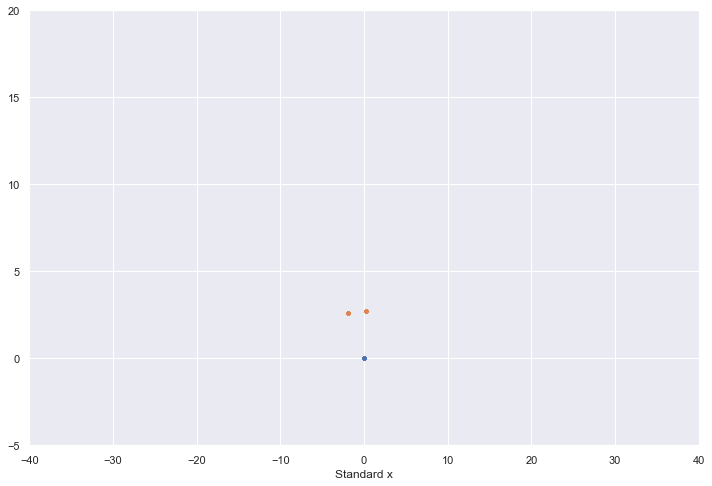

In [42]:
# example of visualisation of a cluster ( can change the cluster pred value to see what each look like)
sample = clusters3_prs[clusters3_prs['cluster_pred'] == 0].sample(1)
sample2 = sample[['gameId','playId','Side_of_ball']]
relevant_punt_reduced_prs = relevant_punt_reduced[relevant_punt_reduced['frameId'] <= 10]

test_sample = pd.merge(relevant_punt_reduced_prs, sample2, how="inner", on=['gameId', 'playId','Side_of_ball'])

fig, ax = plt.subplots(figsize=(12, 8))
test_sample.groupby(['play_responsibility_simple']) \
    .plot(x='Standard x', y='Standard y', ax=ax, style='.',xlim=(-40,40),ylim=(-5,20))
plt.legend().remove();

In [43]:
# manually looked at a couple of samples to ensure what was happening, as cluster numbers may changed depending on when ran
# named the clusters by what the tracking data seemed to show
details = {
    'gameId' : [2019122906, 2018091600, 2018090600],
    'playId' : [3037, 3830, 3736],
    'Side_of_ball' : ['right', 'left', 'left'],
    'pre snap cluster summary' : ['Vices Deep/ gunner deep', 'vices in motion', 'vices stationary'],
}
  
pre_snap_cluster_desc = pd.DataFrame(details)
pre_snap_cluster_desc

,gameId,playId,Side_of_ball,pre snap cluster summary
0,2019122906,3037,right,Vices Deep/ gunner deep
1,2018091600,3830,left,vices in motion
2,2018090600,3736,left,vices stationary


In [44]:
trial_sum = pd.merge(clusters3_prs, pre_snap_cluster_desc, how="inner", on=['gameId', 'playId','Side_of_ball'])
pre_snap_cluster_to_summary = trial_sum[['cluster_pred','pre snap cluster summary']]

clusters3_prs_w_sum = pd.merge(clusters3_prs, pre_snap_cluster_to_summary, how="left", on=['cluster_pred'])
pre_snap_summary = clusters3_prs_w_sum[['gameId', 'playId','Side_of_ball','pre snap cluster summary']]
pre_snap_summary.head(5)

,gameId,playId,Side_of_ball,pre snap cluster summary
0,2018090600,366,left,vices stationary
1,2018090600,366,right,vices stationary
2,2018090600,872,right,vices stationary
3,2018090600,1989,right,vices stationary
4,2018090600,2599,right,vices stationary


In [45]:
relevant_punt_reduced_2v_only = relevant_punt_reduced[relevant_punt_reduced['vices faced'] == 2.0]
relevant_punt_reduced_w_pre_snap_cluster = pd.merge(relevant_punt_reduced_2v_only, pre_snap_summary, how="left", on=['gameId', 'playId','Side_of_ball'])
relevant_punt_reduced_w_pre_snap_cluster.head(5)

,gameId,playId,playDirection,nflId,responsibility_role,play_responsibility_simple,responsibility_general,Side_of_ball,vices faced,frameId,x,y,g start x,g start y,Standard y,Standard x,pre snap cluster summary
0,2018123000,1976,right,36060,Vice L1,vice,vice 1,left,2.0,1,18.20,48.45,17.01,49.53,1.19,-1.08,vices stationary
1,2018123000,1976,right,36060,Vice L1,vice,vice 1,left,2.0,2,18.22,48.45,17.01,49.53,1.21,-1.08,vices stationary
2,2018123000,1976,right,36060,Vice L1,vice,vice 1,left,2.0,3,18.23,48.46,17.01,49.53,1.22,-1.07,vices stationary
3,2018123000,1976,right,36060,Vice L1,vice,vice 1,left,2.0,4,18.24,48.45,17.01,49.53,1.23,-1.08,vices stationary
4,2018123000,1976,right,36060,Vice L1,vice,vice 1,left,2.0,5,18.24,48.46,17.01,49.53,1.23,-1.07,vices stationary


## 7.10 Vice Clustering Post Snap to identify scheme

## 7.11 cluster on each vise to identify scheme

In [46]:
# identifying behaviour in first second post snap to see initial trends
c1 = (relevant_punt_reduced_w_pre_snap_cluster['pre snap cluster summary'] == 'vices stationary')
c2 = (relevant_punt_reduced_w_pre_snap_cluster['frameId'] >= 11)
c3 = (relevant_punt_reduced_w_pre_snap_cluster['frameId'] <= 21)
post_snap_tracking = relevant_punt_reduced_w_pre_snap_cluster[c1 & c2 & c3]
post_snap_tracking.head(3)

,gameId,playId,playDirection,nflId,responsibility_role,play_responsibility_simple,responsibility_general,Side_of_ball,vices faced,frameId,x,y,g start x,g start y,Standard y,Standard x,pre snap cluster summary
10,2018123000,1976,right,36060,Vice L1,vice,vice 1,left,2.0,11,18.24,48.45,17.01,49.53,1.23,-1.08,vices stationary
11,2018123000,1976,right,36060,Vice L1,vice,vice 1,left,2.0,12,18.24,48.44,17.01,49.53,1.23,-1.09,vices stationary
12,2018123000,1976,right,36060,Vice L1,vice,vice 1,left,2.0,13,18.25,48.44,17.01,49.53,1.24,-1.09,vices stationary


In [47]:
testcase_y_pos = pd.pivot_table(post_snap_tracking, values='Standard y', index=['gameId','playId','Side_of_ball','vices faced','responsibility_general'],
                    columns=['frameId'], aggfunc=np.sum)
testcase_y_pos.reset_index( drop=False, inplace=True)

testcase_x_pos = pd.pivot_table(post_snap_tracking, values='Standard x', index=['gameId','playId','Side_of_ball','vices faced','responsibility_general'],
                    columns=['frameId'], aggfunc=np.sum)
testcase_x_pos.reset_index( drop=False, inplace=True)

testcase_y_pos.head(5)

frameId,gameId,playId,Side_of_ball,vices faced,responsibility_general,11,12,13,14,15,16,17,18,19,20,21
0,2018090600,366,left,2.0,gunner 1,0.00,0.01,0.01,0.01,0.02,0.03,0.06,0.11,0.16,0.22,0.28
1,2018090600,366,left,2.0,vice 1,1.89,1.89,1.89,1.90,1.91,1.92,1.94,1.97,2.00,2.05,2.13
2,2018090600,366,left,2.0,vice 2,1.73,1.72,1.72,1.72,1.71,1.71,1.68,1.63,1.58,1.50,1.42
3,2018090600,366,right,2.0,gunner 1,0.00,0.00,0.00,0.01,0.03,0.07,0.14,0.21,0.32,0.47,0.64
4,2018090600,366,right,2.0,vice 1,1.96,1.96,1.96,1.96,1.97,1.99,2.04,2.12,2.22,2.33,2.49


In [48]:
#only looking at y movement for the vices as I want to see if they are in press or bail technique
# i dont mind too much which direction they are going in
y_vice1_2v_pos = testcase_y_pos[(testcase_y_pos['vices faced'] == 2.0)&(testcase_y_pos['responsibility_general'] == 'vice 1')]
y_vice1_2v_pos.rename(columns={1: "1_y_v1",2: "2_y_v1",3: "3_y_v1",4: "4_y_v1",5: "5_y_v1",6: "6_y_v1",7: "7_y_v1",8: "8_y_v1",9: "9_y_v1",10: "10_y_v1",11: "11_y_v1",12: "12_y_v1",13: "13_y_v1",14: "14_y_v1",15: "15_y_v1",16: "16_y_v1",17: "17_y_v1",18: "18_y_v1",19: "19_y_v1",20: "20_y_v1",21: "21_y_v1",22: "22_y_v1",23: "23_y_v1",24: "24_y_v1",25: "25_y_v1",26: "26_y_v1",27: "27_y_v1",28: "28_y_v1",29: "29_y_v1",30: "30_y_v1",31: "31_y_v1",32: "32_y_v1",33: "33_y_v1",34: "34_y_v1",35: "35_y_v1",36: "36_y_v1",37: "37_y_v1",38: "38_y_v1",39: "39_y_v1",40: "40_y_v1"}, inplace=True)
y_vice1_2v_pos.drop(columns = ['responsibility_general','vices faced'], axis = 1, inplace = True)

y_vice2_2v_pos = testcase_y_pos[(testcase_y_pos['vices faced'] == 2.0)&(testcase_y_pos['responsibility_general'] == 'vice 2')]
y_vice2_2v_pos.rename(columns={1: "1_y_v2",2: "2_y_v2",3: "3_y_v2",4: "4_y_v2",5: "5_y_v2",6: "6_y_v2",7: "7_y_v2",8: "8_y_v2",9: "9_y_v2",10: "10_y_v2",11: "11_y_v2",12: "12_y_v2",13: "13_y_v2",14: "14_y_v2",15: "15_y_v2",16: "16_y_v2",17: "17_y_v2",18: "18_y_v2",19: "19_y_v2",20: "20_y_v2",21: "21_y_v2",22: "22_y_v2",23: "23_y_v2",24: "24_y_v2",25: "25_y_v2",26: "26_y_v2",27: "27_y_v2",28: "28_y_v2",29: "29_y_v2",30: "30_y_v2",31: "31_y_v2",32: "32_y_v2",33: "33_y_v2",34: "34_y_v2",35: "35_y_v2",36: "36_y_v2",37: "37_y_v2",38: "38_y_v2",39: "39_y_v2",40: "40_y_v2"}, inplace=True)
y_vice2_2v_pos.drop(columns = ['responsibility_general','vices faced'], axis = 1, inplace = True)

y_vice1_2v_pos.head(5)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/opt/anaconda3/lib/pytho

frameId,gameId,playId,Side_of_ball,11_y_v1,12_y_v1,13_y_v1,14_y_v1,15_y_v1,16_y_v1,17_y_v1,18_y_v1,19_y_v1,20_y_v1,21_y_v1
1,2018090600,366,left,1.89,1.89,1.89,1.90,1.91,1.92,1.94,1.97,2.00,2.05,2.13
4,2018090600,366,right,1.96,1.96,1.96,1.96,1.97,1.99,2.04,2.12,2.22,2.33,2.49
7,2018090600,872,right,2.05,2.05,2.06,2.06,2.06,2.07,2.08,2.10,2.14,2.21,2.30
10,2018090600,1989,right,1.78,1.77,1.77,1.78,1.78,1.78,1.81,1.83,1.88,1.92,1.99
13,2018090600,2599,right,1.64,1.64,1.64,1.65,1.65,1.66,1.69,1.71,1.74,1.79,1.86


In [49]:
vice_base_pos = y_vice1_2v_pos[['gameId','playId','Side_of_ball']]
vice_base_pos_v2 = y_vice2_2v_pos[['gameId','playId','Side_of_ball']]

vice_base3_pos = pd.merge(vice_base_pos, y_vice1_2v_pos, how="left", on=['gameId', 'playId','Side_of_ball'])

vice_base3_pos_v2 = pd.merge(vice_base_pos_v2, y_vice2_2v_pos, how="left", on=['gameId', 'playId','Side_of_ball'])

# identify change in y for vice 1, potentially identify press coverage, first 1 second post snap
vice_base3_pos['12_y_v1_delta'] = vice_base3_pos['12_y_v1'] - vice_base3_pos['11_y_v1']
vice_base3_pos['13_y_v1_delta'] = vice_base3_pos['13_y_v1'] - vice_base3_pos['12_y_v1']
vice_base3_pos['14_y_v1_delta'] = vice_base3_pos['14_y_v1'] - vice_base3_pos['13_y_v1']
vice_base3_pos['15_y_v1_delta'] = vice_base3_pos['15_y_v1'] - vice_base3_pos['14_y_v1']
vice_base3_pos['16_y_v1_delta'] = vice_base3_pos['16_y_v1'] - vice_base3_pos['15_y_v1']
vice_base3_pos['17_y_v1_delta'] = vice_base3_pos['17_y_v1'] - vice_base3_pos['16_y_v1']
vice_base3_pos['18_y_v1_delta'] = vice_base3_pos['18_y_v1'] - vice_base3_pos['17_y_v1']
vice_base3_pos['19_y_v1_delta'] = vice_base3_pos['19_y_v1'] - vice_base3_pos['18_y_v1']
vice_base3_pos['20_y_v1_delta'] = vice_base3_pos['20_y_v1'] - vice_base3_pos['19_y_v1']
vice_base3_pos['21_y_v1_delta'] = vice_base3_pos['21_y_v1'] - vice_base3_pos['20_y_v1']

# identify change in y for vice 2, potentially identify press coverage, first 1 second post snap
vice_base3_pos_v2['12_y_v2_delta'] = vice_base3_pos_v2['12_y_v2'] - vice_base3_pos_v2['11_y_v2']
vice_base3_pos_v2['13_y_v2_delta'] = vice_base3_pos_v2['13_y_v2'] - vice_base3_pos_v2['12_y_v2']
vice_base3_pos_v2['14_y_v2_delta'] = vice_base3_pos_v2['14_y_v2'] - vice_base3_pos_v2['13_y_v2']
vice_base3_pos_v2['15_y_v2_delta'] = vice_base3_pos_v2['15_y_v2'] - vice_base3_pos_v2['14_y_v2']
vice_base3_pos_v2['16_y_v2_delta'] = vice_base3_pos_v2['16_y_v2'] - vice_base3_pos_v2['15_y_v2']
vice_base3_pos_v2['17_y_v2_delta'] = vice_base3_pos_v2['17_y_v2'] - vice_base3_pos_v2['16_y_v2']
vice_base3_pos_v2['18_y_v2_delta'] = vice_base3_pos_v2['18_y_v2'] - vice_base3_pos_v2['17_y_v2']
vice_base3_pos_v2['19_y_v2_delta'] = vice_base3_pos_v2['19_y_v2'] - vice_base3_pos_v2['18_y_v2']
vice_base3_pos_v2['20_y_v2_delta'] = vice_base3_pos_v2['20_y_v2'] - vice_base3_pos_v2['19_y_v2']
vice_base3_pos_v2['21_y_v2_delta'] = vice_base3_pos_v2['21_y_v2'] - vice_base3_pos_v2['20_y_v2']

vice_base4_pos = vice_base3_pos.drop(['11_y_v1','12_y_v1','13_y_v1','14_y_v1','15_y_v1','16_y_v1','17_y_v1','18_y_v1','19_y_v1','20_y_v1','21_y_v1'], axis = 1)
vice_base4_pos_v2 = vice_base3_pos_v2.drop(['11_y_v2','12_y_v2','13_y_v2','14_y_v2','15_y_v2','16_y_v2','17_y_v2','18_y_v2','19_y_v2','20_y_v2','21_y_v2'], axis = 1)
vice_base4_pos.head(5)


frameId,gameId,playId,Side_of_ball,12_y_v1_delta,13_y_v1_delta,14_y_v1_delta,15_y_v1_delta,16_y_v1_delta,17_y_v1_delta,18_y_v1_delta,19_y_v1_delta,20_y_v1_delta,21_y_v1_delta
0,2018090600,366,left,0.00,0.00,0.01,0.01,0.01,0.02,0.03,0.03,0.05,0.08
1,2018090600,366,right,0.00,0.00,0.00,0.01,0.02,0.05,0.08,0.10,0.11,0.16
2,2018090600,872,right,0.00,0.01,0.00,0.00,0.01,0.01,0.02,0.04,0.07,0.09
3,2018090600,1989,right,-0.01,0.00,0.01,0.00,0.00,0.03,0.02,0.05,0.04,0.07
4,2018090600,2599,right,0.00,0.00,0.01,0.00,0.01,0.03,0.02,0.03,0.05,0.07


In [50]:
# cluistering for the vice 1 position (aka the inner most vice on any snap)
# dropping username column as that cannot be used in the clustering analysis
data = vice_base4_pos.drop(['gameId','playId','Side_of_ball'], axis = 1)
x = data.copy()
# create a k-means object with 3 clusters
kmeans = KMeans(3)
# fit the data
kmeans.fit(x)

# create a copy of data, so we can see the clusters next to the original data
vice1_pos = data.copy()
# prediction of the cluster for each observation
vice1_pos['cluster_pred']=kmeans.fit_predict(x)

# quick visual summary to see if it worked
vice1_pos['gameId'] = vice_base4_pos['gameId']
vice1_pos['playId'] = vice_base4_pos['playId']
vice1_pos['Side_of_ball'] = vice_base4_pos['Side_of_ball']
vice1_pos.head(8)

frameId,12_y_v1_delta,13_y_v1_delta,14_y_v1_delta,15_y_v1_delta,16_y_v1_delta,17_y_v1_delta,18_y_v1_delta,19_y_v1_delta,20_y_v1_delta,21_y_v1_delta,cluster_pred,gameId,playId,Side_of_ball
0,0.00,0.00,0.01,0.01,0.01,0.02,0.03,0.03,0.05,0.08,1,2018090600,366,left
1,0.00,0.00,0.00,0.01,0.02,0.05,0.08,0.10,0.11,0.16,0,2018090600,366,right
2,0.00,0.01,0.00,0.00,0.01,0.01,0.02,0.04,0.07,0.09,1,2018090600,872,right
3,-0.01,0.00,0.01,0.00,0.00,0.03,0.02,0.05,0.04,0.07,1,2018090600,1989,right
4,0.00,0.00,0.01,0.00,0.01,0.03,0.02,0.03,0.05,0.07,1,2018090600,2599,right
5,0.00,0.00,0.00,-0.01,0.01,0.01,0.01,0.02,0.04,0.05,1,2018090600,3736,left
6,0.01,0.00,0.01,0.02,0.04,0.06,0.10,0.12,0.16,0.19,0,2018090600,3736,right
7,0.00,0.00,0.01,0.03,0.03,0.04,0.04,0.04,0.08,0.05,1,2018090900,485,right


In [51]:
vice1_pos.groupby(['cluster_pred']).count()

frameId,12_y_v1_delta,13_y_v1_delta,14_y_v1_delta,15_y_v1_delta,16_y_v1_delta,17_y_v1_delta,18_y_v1_delta,19_y_v1_delta,20_y_v1_delta,21_y_v1_delta,gameId,playId,Side_of_ball
cluster_pred,,,,,,,,,,,,,
0,516,516,516,516,516,516,516,516,516,516,516,516,516
1,1279,1279,1279,1279,1279,1279,1279,1279,1279,1279,1279,1279,1279
2,718,718,718,718,718,718,718,718,718,718,718,718,718


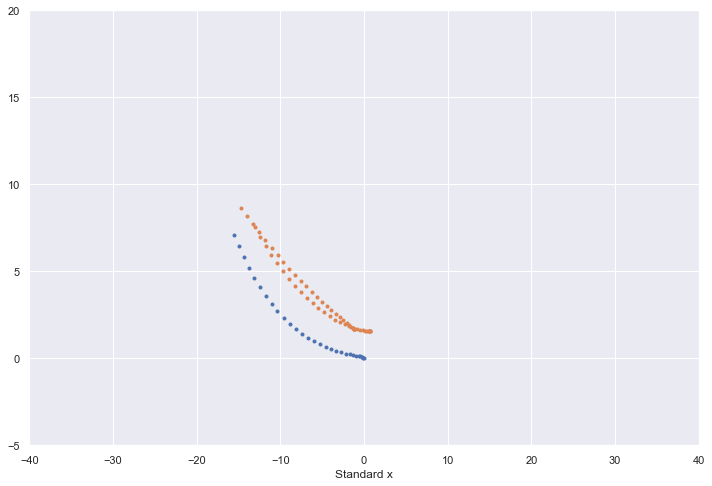

In [244]:
# example of visualisation of a cluster ( can change the cluster pred value to see what each look like)
sample = vice1_pos[vice1_pos['cluster_pred'] == 0].sample(1)
sample2 = sample[['gameId','playId','Side_of_ball']]
relevant_punt_reduced_pos = relevant_punt_reduced[relevant_punt_reduced['frameId'] >= 11]

test_sample = pd.merge(relevant_punt_reduced_pos, sample2, how="inner", on=['gameId', 'playId','Side_of_ball'])

fig, ax = plt.subplots(figsize=(12, 8))
test_sample.groupby(['play_responsibility_simple']) \
    .plot(x='Standard x', y='Standard y', ax=ax, style='.',xlim=(-40,40),ylim=(-5,20))
plt.legend().remove();

In [53]:
# manually looked at a couple of samples to ensure what was happening, as cluster numbers may changed depending on when ran
details_v1 = {
    'gameId' : [2018090900, 2018091602, 2018090600],
    'playId' : [3079, 1446, 2599],
    'Side_of_ball' : ['left', 'left', 'right'],
    'v1 post snap cluster summary' : ['Press Release', 'Bail Release', 'Normal Release'],
}
  
v1_post_snap_cluster_desc = pd.DataFrame(details_v1)
  
v1_post_snap_cluster_desc

,gameId,playId,Side_of_ball,v1 post snap cluster summary
0,2018090900,3079,left,Press Release
1,2018091602,1446,left,Bail Release
2,2018090600,2599,right,Normal Release


## 7.12 Clustering on Outer Vice

In [54]:
# dropping username column as that cannot be used in the clustering analysis
data = vice_base4_pos_v2.drop(['gameId','playId','Side_of_ball'], axis = 1)
x = data.copy()
kmeans = KMeans(3)
kmeans.fit(x)

vice2_pos = data.copy()
vice2_pos['cluster_pred']=kmeans.fit_predict(x)

# quick visual summary to see if it worked
vice2_pos['gameId'] = vice_base4_pos_v2['gameId']
vice2_pos['playId'] = vice_base4_pos_v2['playId']
vice2_pos['Side_of_ball'] = vice_base4_pos_v2['Side_of_ball']
vice2_pos.head(8)

frameId,12_y_v2_delta,13_y_v2_delta,14_y_v2_delta,15_y_v2_delta,16_y_v2_delta,17_y_v2_delta,18_y_v2_delta,19_y_v2_delta,20_y_v2_delta,21_y_v2_delta,cluster_pred,gameId,playId,Side_of_ball
0,-0.01,0.00,0.00,-0.01,0.00,-0.03,-0.05,-0.05,-0.08,-0.08,0,2018090600,366,left
1,0.00,0.00,-0.01,-0.01,-0.02,-0.02,-0.03,-0.01,0.00,0.00,0,2018090600,366,right
2,0.00,0.00,0.00,0.00,0.00,0.00,-0.01,0.00,-0.01,0.00,0,2018090600,872,right
3,0.00,0.00,0.00,0.00,-0.01,-0.01,0.00,0.01,0.01,0.01,2,2018090600,1989,right
4,0.00,0.00,-0.01,0.00,0.01,0.01,0.01,0.06,0.06,0.06,2,2018090600,2599,right
5,0.00,0.00,-0.01,-0.01,-0.04,-0.04,-0.07,-0.09,-0.10,-0.08,0,2018090600,3736,left
6,0.00,0.00,0.00,0.01,0.01,0.02,0.03,0.04,0.06,0.07,2,2018090600,3736,right
7,0.00,-0.01,0.00,-0.01,0.01,0.00,0.02,0.03,0.04,0.07,2,2018090900,485,right


In [55]:
vice2_pos.groupby(['cluster_pred']).count()

frameId,12_y_v2_delta,13_y_v2_delta,14_y_v2_delta,15_y_v2_delta,16_y_v2_delta,17_y_v2_delta,18_y_v2_delta,19_y_v2_delta,20_y_v2_delta,21_y_v2_delta,gameId,playId,Side_of_ball
cluster_pred,,,,,,,,,,,,,
0,526,526,526,526,526,526,526,526,526,526,526,526,526
1,444,444,444,444,444,444,444,444,444,444,444,444,444
2,1543,1543,1543,1543,1543,1543,1543,1543,1543,1543,1543,1543,1543


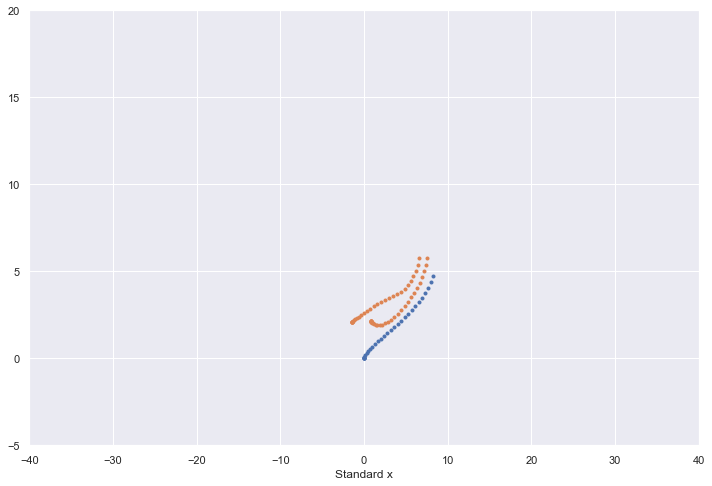

In [56]:
# example of visualisation of a cluster ( can change the cluster pred value to see what each look like)
sample = vice2_pos[vice2_pos['cluster_pred'] == 0].sample(1)
sample2 = sample[['gameId','playId','Side_of_ball']]
relevant_punt_reduced_pos = relevant_punt_reduced[relevant_punt_reduced['frameId'] >= 11]

test_sample = pd.merge(relevant_punt_reduced_pos, sample2, how="inner", on=['gameId', 'playId','Side_of_ball'])

fig, ax = plt.subplots(figsize=(12, 8))
test_sample.groupby(['play_responsibility_simple']) \
    .plot(x='Standard x', y='Standard y', ax=ax, style='.',xlim=(-40,40),ylim=(-5,20))
plt.legend().remove();

In [57]:
# manually looked at a couple of samples to ensure what was happening, as cluster numbers may changed depending on when ran
details_v2 = {
    'gameId' : [2018090600, 2018090910, 2018090900],
    'playId' : [3736, 2269, 674],
    'Side_of_ball' : ['left', 'left', 'right'],
    'v2 post snap cluster summary' : ['Press Release', 'Bail Release', 'Normal Release'],
}
  
v2_post_snap_cluster_desc = pd.DataFrame(details_v2)
  
v2_post_snap_cluster_desc

,gameId,playId,Side_of_ball,v2 post snap cluster summary
0,2018090600,3736,left,Press Release
1,2018090910,2269,left,Bail Release
2,2018090900,674,right,Normal Release


In [58]:
trial_sum = pd.merge(clusters3_prs, pre_snap_cluster_desc, how="inner", on=['gameId', 'playId','Side_of_ball'])
pre_snap_cluster_to_summary = trial_sum[['cluster_pred','pre snap cluster summary']]

clusters3_prs_w_sum = pd.merge(clusters3_prs, pre_snap_cluster_to_summary, how="left", on=['cluster_pred'])
pre_snap_summary = clusters3_prs_w_sum[['gameId', 'playId','Side_of_ball','pre snap cluster summary']]
pre_snap_summary.head(5)

,gameId,playId,Side_of_ball,pre snap cluster summary
0,2018090600,366,left,vices stationary
1,2018090600,366,right,vices stationary
2,2018090600,872,right,vices stationary
3,2018090600,1989,right,vices stationary
4,2018090600,2599,right,vices stationary


In [59]:
trial_sum2 = pd.merge(vice1_pos, v1_post_snap_cluster_desc, how="inner", on=['gameId', 'playId','Side_of_ball'])
vice1_post_snap_cluster_to_summary = trial_sum2[['cluster_pred','v1 post snap cluster summary']]

crazy_pos_w_sum = pd.merge(vice1_pos, vice1_post_snap_cluster_to_summary, how="left", on=['cluster_pred'])
post_snap_summary_w_v1 = crazy_pos_w_sum[['gameId', 'playId','Side_of_ball','v1 post snap cluster summary']]
post_snap_summary_w_v1.head(3)

,gameId,playId,Side_of_ball,v1 post snap cluster summary
0,2018090600,366,left,Normal Release
1,2018090600,366,right,Bail Release
2,2018090600,872,right,Normal Release


In [60]:
trial_sum3 = pd.merge(vice2_pos, v2_post_snap_cluster_desc, how="inner", on=['gameId', 'playId','Side_of_ball'])
vice2_post_snap_cluster_to_summary = trial_sum3[['cluster_pred','v2 post snap cluster summary']]

crazy_pos_v2_w_sum = pd.merge(vice2_pos, vice2_post_snap_cluster_to_summary, how="left", on=['cluster_pred'])
post_snap_summary_w_v2 = crazy_pos_v2_w_sum[['gameId', 'playId','Side_of_ball','v2 post snap cluster summary']]
post_snap_summary_w_v2.head(3)

,gameId,playId,Side_of_ball,v2 post snap cluster summary
0,2018090600,366,left,Press Release
1,2018090600,366,right,Press Release
2,2018090600,872,right,Press Release


## 7.13 Cluster on each gunner to identify release direction

In [61]:
# only looking at both x an y movement for the gunners
y_gunner_2v_pos = testcase_y_pos[(testcase_y_pos['vices faced'] == 2.0)&(testcase_y_pos['responsibility_general'] == 'gunner 1')]
y_gunner_2v_pos.rename(columns={1: "1_y_g1",2: "2_y_g1",3: "3_y_g1",4: "4_y_g1",5: "5_y_g1",6: "6_y_g1",7: "7_y_g1",8: "8_y_g1",9: "9_y_g1",10: "10_y_g1",11: "11_y_g1",12: "12_y_g1",13: "13_y_g1",14: "14_y_g1",15: "15_y_g1",16: "16_y_g1",17: "17_y_g1",18: "18_y_g1",19: "19_y_g1",20: "20_y_g1",21: "21_y_g1",22: "22_y_g1",23: "23_y_g1",24: "24_y_g1",25: "25_y_g1",26: "26_y_g1",27: "27_y_g1",28: "28_y_g1",29: "29_y_g1",30: "30_y_g1",31: "31_y_g1",32: "32_y_g1",33: "33_y_g1",34: "34_y_g1",35: "35_y_g1",36: "36_y_g1",37: "37_y_g1",38: "38_y_g1",39: "39_y_g1",40: "40_y_g1"}, inplace=True)
y_gunner_2v_pos.drop(columns = ['responsibility_general','vices faced'], axis = 1, inplace = True)

x_gunner_2v_pos = testcase_x_pos[(testcase_x_pos['vices faced'] == 2.0)&(testcase_x_pos['responsibility_general'] == 'gunner 1')]
x_gunner_2v_pos.rename(columns={1: "1_x_g1",2: "2_x_g1",3: "3_x_g1",4: "4_x_g1",5: "5_x_g1",6: "6_x_g1",7: "7_x_g1",8: "8_x_g1",9: "9_x_g1",10: "10_x_g1",11: "11_x_g1",12: "12_x_g1",13: "13_x_g1",14: "14_x_g1",15: "15_x_g1",16: "16_x_g1",17: "17_x_g1",18: "18_x_g1",19: "19_x_g1",20: "20_x_g1",21: "21_x_g1",22: "22_x_g1",23: "23_x_g1",24: "24_x_g1",25: "25_x_g1",26: "26_x_g1",27: "27_x_g1",28: "28_x_g1",29: "29_x_g1",30: "30_x_g1",31: "31_x_g1",32: "32_x_g1",33: "33_x_g1",34: "34_x_g1",35: "35_x_g1",36: "36_x_g1",37: "37_x_g1",38: "38_x_g1",39: "39_x_g1",40: "40_x_g1"}, inplace=True)
x_gunner_2v_pos.drop(columns = ['responsibility_general','vices faced'], axis = 1, inplace = True)
y_gunner_2v_pos.head(3)

g_cluster_base_pos = y_gunner_2v_pos[['gameId','playId','Side_of_ball']]
g_cluster_base2_pos = pd.merge(g_cluster_base_pos, x_gunner_2v_pos, how="left", on=['gameId', 'playId','Side_of_ball'])
g_cluster_base3_pos = pd.merge(g_cluster_base2_pos, y_gunner_2v_pos, how="left", on=['gameId', 'playId','Side_of_ball'])
g_cluster_base3_pos.head(5)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/opt/anaconda3/lib/pytho

frameId,gameId,playId,Side_of_ball,11_x_g1,12_x_g1,13_x_g1,14_x_g1,15_x_g1,16_x_g1,17_x_g1,18_x_g1,19_x_g1,20_x_g1,21_x_g1,11_y_g1,12_y_g1,13_y_g1,14_y_g1,15_y_g1,16_y_g1,17_y_g1,18_y_g1,19_y_g1,20_y_g1,21_y_g1
0,2018090600,366,left,0.0,0.01,0.01,0.05,0.13,0.26,0.45,0.71,1.01,1.34,1.71,0.0,0.01,0.01,0.01,0.02,0.03,0.06,0.11,0.16,0.22,0.28
1,2018090600,366,right,0.0,0.00,0.02,0.06,0.14,0.28,0.48,0.72,1.04,1.42,1.86,0.0,0.00,0.00,0.01,0.03,0.07,0.14,0.21,0.32,0.47,0.64
2,2018090600,872,right,0.0,0.00,0.01,0.02,0.03,0.09,0.21,0.39,0.62,0.91,1.24,0.0,0.00,0.00,0.00,0.00,0.02,0.06,0.12,0.21,0.33,0.48
3,2018090600,1989,right,0.0,-0.03,-0.06,-0.11,-0.23,-0.42,-0.68,-1.02,-1.44,-1.90,-2.41,0.0,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,0.01,0.04,0.08,0.13
4,2018090600,2599,right,0.0,-0.02,-0.04,-0.10,-0.23,-0.45,-0.76,-1.14,-1.59,-2.11,-2.68,0.0,0.00,0.00,0.01,0.01,0.02,0.04,0.08,0.13,0.20,0.30


In [62]:
# dropping username column as that cannot be used in the clustering analysis
data = g_cluster_base3_pos.drop(['gameId','playId','Side_of_ball'], axis = 1)
x = data.copy()
# looked at the data and there only seemed to be two clear clusters of data
# i expected more, but could only go with what the data recomended
kmeans = KMeans(2)
kmeans.fit(x)

gunner_pos = data.copy()
gunner_pos['cluster_pred']=kmeans.fit_predict(x)

# quick visual summary to see if it worked
gunner_pos['gameId'] = g_cluster_base3_pos['gameId']
gunner_pos['playId'] = g_cluster_base3_pos['playId']
gunner_pos['Side_of_ball'] = g_cluster_base3_pos['Side_of_ball']
gunner_pos.head(8)

frameId,11_x_g1,12_x_g1,13_x_g1,14_x_g1,15_x_g1,16_x_g1,17_x_g1,18_x_g1,19_x_g1,20_x_g1,21_x_g1,11_y_g1,12_y_g1,13_y_g1,14_y_g1,15_y_g1,16_y_g1,17_y_g1,18_y_g1,19_y_g1,20_y_g1,21_y_g1,cluster_pred,gameId,playId,Side_of_ball
0,0.0,0.01,0.01,0.05,0.13,0.26,0.45,0.71,1.01,1.34,1.71,0.0,0.01,0.01,0.01,0.02,0.03,0.06,0.11,0.16,0.22,0.28,0,2018090600,366,left
1,0.0,0.00,0.02,0.06,0.14,0.28,0.48,0.72,1.04,1.42,1.86,0.0,0.00,0.00,0.01,0.03,0.07,0.14,0.21,0.32,0.47,0.64,0,2018090600,366,right
2,0.0,0.00,0.01,0.02,0.03,0.09,0.21,0.39,0.62,0.91,1.24,0.0,0.00,0.00,0.00,0.00,0.02,0.06,0.12,0.21,0.33,0.48,0,2018090600,872,right
3,0.0,-0.03,-0.06,-0.11,-0.23,-0.42,-0.68,-1.02,-1.44,-1.90,-2.41,0.0,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,0.01,0.04,0.08,0.13,1,2018090600,1989,right
4,0.0,-0.02,-0.04,-0.10,-0.23,-0.45,-0.76,-1.14,-1.59,-2.11,-2.68,0.0,0.00,0.00,0.01,0.01,0.02,0.04,0.08,0.13,0.20,0.30,1,2018090600,2599,right
5,0.0,0.02,0.03,0.11,0.25,0.43,0.69,0.99,1.32,1.68,2.08,0.0,0.00,0.01,0.03,0.07,0.12,0.20,0.30,0.40,0.50,0.60,0,2018090600,3736,left
6,0.0,0.00,0.02,0.07,0.18,0.33,0.53,0.75,0.98,1.21,1.43,0.0,0.00,0.01,0.04,0.10,0.20,0.34,0.52,0.74,1.01,1.31,0,2018090600,3736,right
7,0.0,-0.06,-0.08,-0.15,-0.25,-0.44,-0.70,-1.03,-1.43,-1.90,-2.41,0.0,0.01,0.02,0.03,0.06,0.08,0.12,0.17,0.25,0.36,0.48,1,2018090900,485,right


In [63]:
gunner_pos.groupby(['cluster_pred']).count()

frameId,11_x_g1,12_x_g1,13_x_g1,14_x_g1,15_x_g1,16_x_g1,17_x_g1,18_x_g1,19_x_g1,20_x_g1,21_x_g1,11_y_g1,12_y_g1,13_y_g1,14_y_g1,15_y_g1,16_y_g1,17_y_g1,18_y_g1,19_y_g1,20_y_g1,21_y_g1,gameId,playId,Side_of_ball
cluster_pred,,,,,,,,,,,,,,,,,,,,,,,,,
0,1347,1347,1347,1347,1347,1347,1347,1347,1347,1347,1347,1347,1347,1347,1347,1347,1347,1347,1347,1347,1347,1347,1347,1347,1347
1,1166,1166,1166,1166,1166,1166,1166,1166,1166,1166,1166,1166,1166,1166,1166,1166,1166,1166,1166,1166,1166,1166,1166,1166,1166


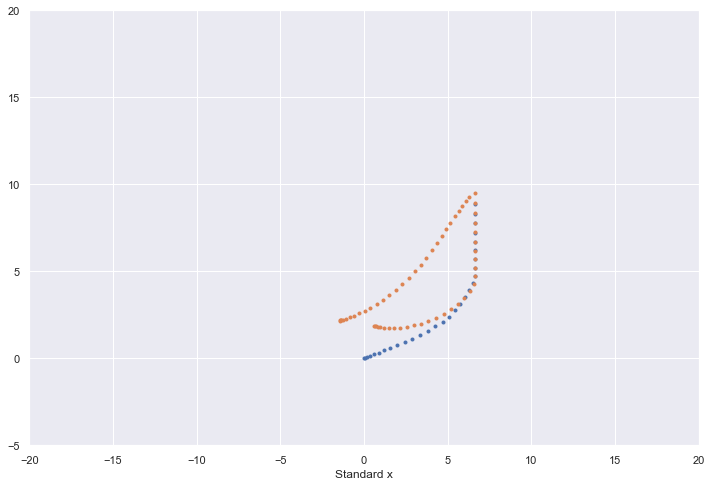

In [64]:
# example of visualisation of a cluster ( can change the cluster pred value to see what each look like)
sample = gunner_pos[gunner_pos['cluster_pred'] == 0].sample(1)
sample2 = sample[['gameId','playId','Side_of_ball']]
relevant_punt_reduced_pos = relevant_punt_reduced[relevant_punt_reduced['frameId'] >= 11]

test_sample = pd.merge(relevant_punt_reduced_pos, sample2, how="inner", on=['gameId', 'playId','Side_of_ball'])

fig, ax = plt.subplots(figsize=(12, 8))
test_sample.groupby(['play_responsibility_simple']) \
    .plot(x='Standard x', y='Standard y', ax=ax, style='.',xlim=(-20,20),ylim=(-5,20))
plt.legend().remove();

In [65]:
# manually looked at a couple of samples to ensure what was happening, as cluster numbers may changed depending on when ran
details_g = {
    'gameId' : [2018090900, 2018090600],
    'playId' : [575, 3736],
    'Side_of_ball' : ['right', 'left'],
    'g post snap cluster summary' : ['Inside Release', 'Outside Release'],
}
  
g_post_snap_cluster_desc = pd.DataFrame(details_g)
  
g_post_snap_cluster_desc

,gameId,playId,Side_of_ball,g post snap cluster summary
0,2018090900,575,right,Inside Release
1,2018090600,3736,left,Outside Release


In [66]:
trial_sum4 = pd.merge(gunner_pos, g_post_snap_cluster_desc, how="inner", on=['gameId', 'playId','Side_of_ball'])
gunner_post_snap_cluster_to_summary = trial_sum4[['cluster_pred','g post snap cluster summary']]

g_cluster_base3_posv2_s_sum = pd.merge(gunner_pos, gunner_post_snap_cluster_to_summary, how="left", on=['cluster_pred'])
post_snap_summary_w_g = g_cluster_base3_posv2_s_sum [['gameId', 'playId','Side_of_ball','g post snap cluster summary']]
post_snap_summary_w_g.head(5)

,gameId,playId,Side_of_ball,g post snap cluster summary
0,2018090600,366,left,Outside Release
1,2018090600,366,right,Outside Release
2,2018090600,872,right,Outside Release
3,2018090600,1989,right,Inside Release
4,2018090600,2599,right,Inside Release


In [67]:
post_snap_summary_w_v1.head(5)

,gameId,playId,Side_of_ball,v1 post snap cluster summary
0,2018090600,366,left,Normal Release
1,2018090600,366,right,Bail Release
2,2018090600,872,right,Normal Release
3,2018090600,1989,right,Normal Release
4,2018090600,2599,right,Normal Release


In [68]:
post_snap_summary_w_v2.head(5)

,gameId,playId,Side_of_ball,v2 post snap cluster summary
0,2018090600,366,left,Press Release
1,2018090600,366,right,Press Release
2,2018090600,872,right,Press Release
3,2018090600,1989,right,Normal Release
4,2018090600,2599,right,Normal Release


In [69]:
pre_snap_summary.head(5)

,gameId,playId,Side_of_ball,pre snap cluster summary
0,2018090600,366,left,vices stationary
1,2018090600,366,right,vices stationary
2,2018090600,872,right,vices stationary
3,2018090600,1989,right,vices stationary
4,2018090600,2599,right,vices stationary


In [70]:
r_punts7.head(5)

,gameId,playId,season,possessionTeam,nflId,responsibility_role,displayName,gun win frame,Side_of_ball,vices faced,under 5.0 seconds,s,a,a_first_40,starter,height,weight,birthDate,Position
0,2018090600,366,2018,PHI,44979.0,Gunner L1,Shelton Gibson,75.0,left,2.0,0.0,10.60,6.80,4.92,1.0,5-11,191.0,1995-03-20,WR
1,2018090600,366,2018,PHI,46194.0,Gunner R1,Avonte Maddox,100.0,right,2.0,0.0,9.71,7.03,7.03,1.0,5-9,184.0,1996-03-31,CB
2,2018090600,872,2018,PHI,44979.0,Gunner L1,Shelton Gibson,35.0,left,1.0,1.0,10.19,7.16,5.75,1.0,5-11,191.0,1995-03-20,WR
3,2018090600,872,2018,PHI,46194.0,Gunner R1,Avonte Maddox,100.0,right,2.0,0.0,9.46,5.33,5.33,1.0,5-9,184.0,1996-03-31,CB
4,2018090600,973,2018,ATL,38707.0,Gunner R1,Justin Bethel,63.0,right,1.0,0.0,10.39,5.59,5.59,1.0,6-0,200.0,1990-06-17,CB


In [71]:
r_punts8 = pd.merge(r_punts7, pre_snap_summary, how="left", on=['gameId', 'playId','Side_of_ball'])
r_punts9 = pd.merge(r_punts8, post_snap_summary_w_v1, how="left", on=['gameId', 'playId','Side_of_ball'])
r_punts10 = pd.merge(r_punts9, post_snap_summary_w_v2, how="left", on=['gameId', 'playId','Side_of_ball'])
r_punts11 = pd.merge(r_punts10, post_snap_summary_w_g, how="left", on=['gameId', 'playId','Side_of_ball'])
r_punts_2vice_only = r_punts11[r_punts11['vices faced'] == 2.0]
r_punts_2vice_only['pre snap cluster summary2'] = r_punts_2vice_only['pre snap cluster summary'].fillna('ignore')
r_punts_2vice_only.head(100)

<ipython-input-71-8c21d71e4db7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_punts_2vice_only['pre snap cluster summary2'] = r_punts_2vice_only['pre snap cluster summary'].fillna('ignore')


,gameId,playId,season,possessionTeam,nflId,responsibility_role,displayName,gun win frame,Side_of_ball,vices faced,under 5.0 seconds,s,a,a_first_40,starter,height,weight,birthDate,Position,pre snap cluster summary,v1 post snap cluster summary,v2 post snap cluster summary,g post snap cluster summary,pre snap cluster summary2
0,2018090600,366,2018,PHI,44979.0,Gunner L1,Shelton Gibson,75.0,left,2.0,0.0,10.60,6.80,4.92,1.0,5-11,191.0,1995-03-20,WR,vices stationary,Normal Release,Press Release,Outside Release,vices stationary
1,2018090600,366,2018,PHI,46194.0,Gunner R1,Avonte Maddox,100.0,right,2.0,0.0,9.71,7.03,7.03,1.0,5-9,184.0,1996-03-31,CB,vices stationary,Bail Release,Press Release,Outside Release,vices stationary
3,2018090600,872,2018,PHI,46194.0,Gunner R1,Avonte Maddox,100.0,right,2.0,0.0,9.46,5.33,5.33,1.0,5-9,184.0,1996-03-31,CB,vices stationary,Normal Release,Press Release,Outside Release,vices stationary
8,2018090600,1989,2018,ATL,38707.0,Gunner R1,Justin Bethel,100.0,right,2.0,0.0,9.31,6.07,6.07,1.0,6-0,200.0,1990-06-17,CB,vices stationary,Normal Release,Normal Release,Inside Release,vices stationary
12,2018090600,2599,2018,ATL,38707.0,Gunner R1,Justin Bethel,64.0,right,2.0,0.0,10.24,7.71,7.71,1.0,6-0,200.0,1990-06-17,CB,vices stationary,Normal Release,Normal Release,Inside Release,vices stationary
16,2018090600,3736,2018,PHI,44979.0,Gunner L1,Shelton Gibson,70.0,left,2.0,0.0,7.98,6.04,6.04,1.0,5-11,191.0,1995-03-20,WR,vices stationary,Normal Release,Press Release,Outside Release,vices stationary
17,2018090600,3736,2018,PHI,46194.0,Gunner R1,Avonte Maddox,100.0,right,2.0,0.0,8.80,5.28,5.28,1.0,5-9,184.0,1996-03-31,CB,vices stationary,Bail Release,Normal Release,Outside Release,vices stationary
20,2018090900,485,2018,BUF,37200.0,Gunner R1,Taiwan Jones,62.0,right,2.0,0.0,8.55,6.47,6.47,1.0,6-0,195.0,1988-07-26,RB,vices stationary,Normal Release,Normal Release,Inside Release,vices stationary
22,2018090900,575,2018,BAL,43396.0,Gunner R1,Chris Moore,100.0,right,2.0,0.0,8.67,5.11,5.11,1.0,6-1,200.0,1993-06-16,WR,vices stationary,Normal Release,Bail Release,Inside Release,vices stationary
24,2018090900,674,2018,BUF,37200.0,Gunner R1,Taiwan Jones,63.0,right,2.0,0.0,9.92,6.12,5.38,1.0,6-0,195.0,1988-07-26,RB,vices stationary,Normal Release,Normal Release,Outside Release,vices stationary


In [72]:
g_cluster_base3_posv2[g_cluster_base3_posv2['cluster_pred'] == 1].head(5)

NameError: name 'g_cluster_base3_posv2' is not defined

In [ ]:
# would define as second vice moving in from wide out
sample = g_cluster_base3_posv2[g_cluster_base3_posv2['cluster_pred'] == 1].sample(1)
sample2 = sample[['gameId','playId','Side_of_ball']]
relevant_punt_reduced_pos = relevant_punt_reduced[relevant_punt_reduced['frameId'] >= 11]

test_sample = pd.merge(relevant_punt_reduced_pos, sample2, how="inner", on=['gameId', 'playId','Side_of_ball'])

fig, ax = plt.subplots(figsize=(12, 8))
test_sample.groupby(['play_responsibility_simple']) \
    .plot(x='Standard x', y='Standard y', ax=ax, style='.',xlim=(-20,20),ylim=(-5,20))
plt.legend().remove();

In [ ]:
c1 = (r_punts_2vice_only['pre snap cluster summary2'] != 'ignore')
c2 = (r_punts_2vice_only['starter'] == 1.0)
test_sum = r_punts_2vice_only[c1&c2].groupby(['pre snap cluster summary2','g post snap cluster summary']).agg({'gameId': 'count','under 5.0 seconds': 'sum'})

test_sum.reset_index( drop=False, inplace=True )
test_sum['succ_pct'] = test_sum['under 5.0 seconds']/test_sum['gameId']
test_sum


#r_punts_2vice_only[c1].head(5)

In [73]:
c1 = (r_punts_2vice_only['pre snap cluster summary2'] != 'ignore')
c2 = (r_punts_2vice_only['starter'] == 1.0)
test_sum2 = r_punts_2vice_only[c1&c2].groupby(['pre snap cluster summary2']).agg({'gameId': 'count','under 5.0 seconds': 'sum'})

test_sum2.reset_index( drop=False, inplace=True )
test_sum2['succ_pct'] = test_sum2['under 5.0 seconds']/test_sum2['gameId']
test_sum2

,pre snap cluster summary2,gameId,under 5.0 seconds,succ_pct
0,Vices Deep/ gunner deep,11,0.0,0.000000
1,vices in motion,66,8.0,0.121212
2,vices stationary,1765,268.0,0.151841


In [74]:
r_punts_2vice_only[['gameId','playId','Side_of_ball']][r_punts_2vice_only['pre snap cluster summary2'] == 'vices in motion'].head(5)

,gameId,playId,Side_of_ball
61,2018090901,2632,right
196,2018090912,2562,left
252,2018091600,3830,left
700,2018092310,301,left
749,2018092313,541,right


In [75]:
c1 = (r_punts_2vice_only['pre snap cluster summary2'] != 'ignore')
c2 = (r_punts_2vice_only['starter'] == 1.0)
test_summary = r_punts_2vice_only[c1&c2].groupby(['pre snap cluster summary2','g post snap cluster summary','v1 post snap cluster summary','v2 post snap cluster summary']).agg({'gameId': 'count','under 5.0 seconds': 'sum'})

test_summary.reset_index( drop=False, inplace=True )
test_summary['succ_pct'] = test_summary['under 5.0 seconds']/test_summary['gameId']
test_summary

,pre snap cluster summary2,g post snap cluster summary,v1 post snap cluster summary,v2 post snap cluster summary,gameId,under 5.0 seconds,succ_pct
0,vices stationary,Inside Release,Bail Release,Bail Release,42,11.0,0.261905
1,vices stationary,Inside Release,Bail Release,Normal Release,14,4.0,0.285714
2,vices stationary,Inside Release,Normal Release,Bail Release,97,29.0,0.298969
3,vices stationary,Inside Release,Normal Release,Normal Release,238,67.0,0.281513
4,vices stationary,Inside Release,Normal Release,Press Release,13,8.0,0.615385
5,vices stationary,Inside Release,Press Release,Bail Release,49,9.0,0.183673
6,vices stationary,Inside Release,Press Release,Normal Release,336,58.0,0.172619
7,vices stationary,Inside Release,Press Release,Press Release,32,7.0,0.218750
8,vices stationary,Outside Release,Bail Release,Bail Release,106,5.0,0.047170
9,vices stationary,Outside Release,Bail Release,Normal Release,183,7.0,0.038251


In [76]:
c1 = (r_punts_2vice_only['pre snap cluster summary2'] != 'ignore')
c2 = (r_punts_2vice_only['starter'] == 1.0)
test_summary_s = r_punts_2vice_only[c1&c2].groupby(['pre snap cluster summary2','g post snap cluster summary']).agg({'gameId': 'count','under 5.0 seconds': 'sum'})

test_summary_s.reset_index( drop=False, inplace=True )
test_summary_s['succ_pct'] = test_summary_s['under 5.0 seconds']/test_summary_s['gameId']
test_summary_s

,pre snap cluster summary2,g post snap cluster summary,gameId,under 5.0 seconds,succ_pct
0,vices stationary,Inside Release,821,193.0,0.235079
1,vices stationary,Outside Release,944,75.0,0.079449


<AxesSubplot:xlabel='g post snap cluster summary'>

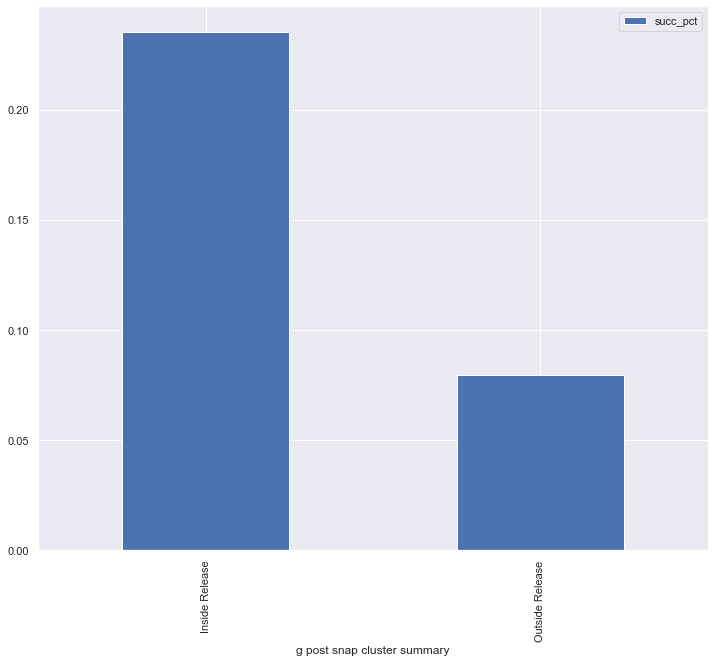

In [78]:
ts_bar = test_summary_s[['g post snap cluster summary','succ_pct']]
ts_bar = ts_bar.set_index('g post snap cluster summary')
ts_bar.plot.bar(y = 'succ_pct')

In [80]:
c1 = (r_punts_2vice_only['pre snap cluster summary2'] != 'ignore')
c2 = (r_punts_2vice_only['starter'] == 1.0)
c3 = (r_punts_2vice_only['g post snap cluster summary'] == 'Inside Release')
test_summary_ir = r_punts_2vice_only[c1&c2&c3].groupby(['pre snap cluster summary2','g post snap cluster summary','v1 post snap cluster summary']).agg({'gameId': 'count','under 5.0 seconds': 'sum'})

test_summary_ir.reset_index( drop=False, inplace=True )
test_summary_ir['succ_pct'] = test_summary_ir['under 5.0 seconds']/test_summary_ir['gameId']
test_summary_ir

,pre snap cluster summary2,g post snap cluster summary,v1 post snap cluster summary,gameId,under 5.0 seconds,succ_pct
0,vices stationary,Inside Release,Bail Release,56,15.0,0.267857
1,vices stationary,Inside Release,Normal Release,348,104.0,0.298851
2,vices stationary,Inside Release,Press Release,417,74.0,0.177458


In [81]:
c1 = (r_punts_2vice_only['pre snap cluster summary2'] != 'ignore')
c2 = (r_punts_2vice_only['starter'] == 1.0)
c3 = (r_punts_2vice_only['g post snap cluster summary'] == 'Outside Release')
test_summary_or = r_punts_2vice_only[c1&c2&c3].groupby(['pre snap cluster summary2','g post snap cluster summary','v2 post snap cluster summary']).agg({'gameId': 'count','under 5.0 seconds': 'sum'})

test_summary_or.reset_index( drop=False, inplace=True )
test_summary_or['succ_pct'] = test_summary_or['under 5.0 seconds']/test_summary_or['gameId']
test_summary_or

,pre snap cluster summary2,g post snap cluster summary,v2 post snap cluster summary,gameId,under 5.0 seconds,succ_pct
0,vices stationary,Outside Release,Bail Release,133,10.0,0.075188
1,vices stationary,Outside Release,Normal Release,504,39.0,0.077381
2,vices stationary,Outside Release,Press Release,307,26.0,0.084691


In [83]:
is_summary = test_summary[['v1 post snap cluster summary','v2 post snap cluster summary','succ_pct']][(test_summary['g post snap cluster summary'] == 'Inside Release')&(test_summary['gameId']>=10)]
is_summary

,v1 post snap cluster summary,v2 post snap cluster summary,succ_pct
0,Bail Release,Bail Release,0.261905
1,Bail Release,Normal Release,0.285714
2,Normal Release,Bail Release,0.298969
3,Normal Release,Normal Release,0.281513
4,Normal Release,Press Release,0.615385
5,Press Release,Bail Release,0.183673
6,Press Release,Normal Release,0.172619
7,Press Release,Press Release,0.218750


In [84]:
is_pivot = pd.pivot_table(is_summary, values='succ_pct', index=['v1 post snap cluster summary'],
                    columns=['v2 post snap cluster summary'], aggfunc=np.sum)
is_pivot.reset_index( drop=True, inplace=False )
is_pivot

v2 post snap cluster summary,Bail Release,Normal Release,Press Release
v1 post snap cluster summary,,,
Bail Release,0.261905,0.285714,NaN
Normal Release,0.298969,0.281513,0.615385
Press Release,0.183673,0.172619,0.218750


<AxesSubplot:xlabel='v2 post snap cluster summary', ylabel='v1 post snap cluster summary'>

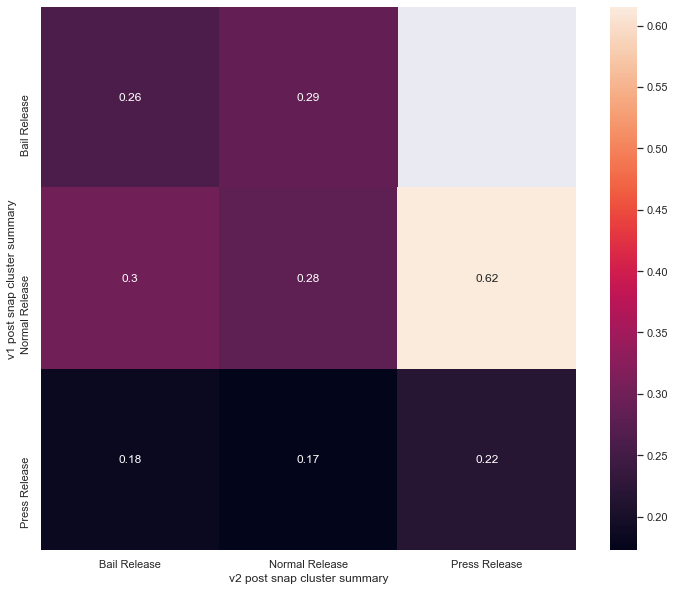

In [186]:
sns.heatmap(is_pivot, annot=True)

In [87]:
or_summary = test_summary[['v1 post snap cluster summary','v2 post snap cluster summary','succ_pct']][(test_summary['g post snap cluster summary'] == 'Outside Release')&(test_summary['gameId']>=10)]
or_summary

,v1 post snap cluster summary,v2 post snap cluster summary,succ_pct
8,Bail Release,Bail Release,0.047170
9,Bail Release,Normal Release,0.038251
10,Bail Release,Press Release,0.027778
11,Normal Release,Bail Release,0.153846
12,Normal Release,Normal Release,0.097315
13,Normal Release,Press Release,0.083333
15,Press Release,Normal Release,0.130435
16,Press Release,Press Release,0.127273


In [88]:
or_pivot = pd.pivot_table(or_summary, values='succ_pct', index=['v1 post snap cluster summary'],
                    columns=['v2 post snap cluster summary'], aggfunc=np.sum)
or_pivot.reset_index( drop=True, inplace=False )
or_pivot

v2 post snap cluster summary,Bail Release,Normal Release,Press Release
v1 post snap cluster summary,,,
Bail Release,0.047170,0.038251,0.027778
Normal Release,0.153846,0.097315,0.083333
Press Release,NaN,0.130435,0.127273


<AxesSubplot:xlabel='v2 post snap cluster summary', ylabel='v1 post snap cluster summary'>

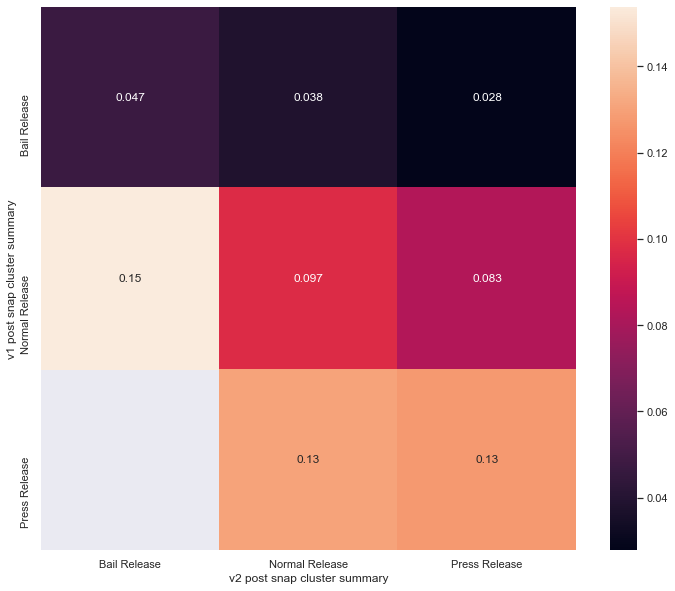

In [187]:
sns.heatmap(or_pivot, annot=True)

## 7.14 Optimal punt return formation decision

In [108]:

overall_result = punt_result_w_gunner_win_frame2

cond1 = punt_result_w_gunner_win_frame2['playDescription'].str.lower().str.contains('deflected')
cond2 = punt_result_w_gunner_win_frame2['playDescription'].str.lower().str.contains('partially blocked')

pb_conditions = [
    (cond1 == True), 
    (cond2 == True), 
    ((cond1 == False)|(cond2 == False)),

    ]
pb_values = ['Partial Block','Partial Block', overall_result['specialTeamsResult']]
overall_result['Result inc partial block'] = np.select(pb_conditions, pb_values)

c1 = (overall_result['gunner_count'] == 2.0)
c2 = (overall_result['vises_count'] == 2.0)
c3 = (overall_result['vises_count'] == 3.0)
c4 = (overall_result['vises_count'] == 4.0)

overall_result2 = overall_result[c1&(c2|c3|c4)]
overall_result2.head(2)

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,returnerId,kickBlockerId,yardlineSide,yardlineNumber,gameClock,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber,snapDetail,snapTime,operationTime,hangTime,kickType,kickDirectionIntended,kickDirectionActual,returnDirectionIntended,returnDirectionActual,missedTackler,assistTackler,tackler,kickoffReturnFormation,gunners,puntRushers,specialTeamsSafeties,vises,kickContactType,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,returning_team,return_nflId,returnerId_final,vises_count,gunner_count,punt_rusher_count,st_safeties_count,kickReturnYardage_v2,punt_location,vice_1,vice_2,vice_3,vice_4,vice_5,gunner_1,gunner_2,vice_1_number,vice_2_number,vice_3_number,vice_4_number,vice_5_number,gunner_1_number,gunner_2_number,kicking_team,frameId,both_frameId,frameId filled na,both frameId filled na,including partial block,Result inc partial block
0,2018090600,366,"(9:20) C.Johnston punts 56 yards to ATL 36, Center-R.Lovato. J.Hardy to ATL 41 for 5 yards (K.Grugier-Hill). PENALTY on PHI-S.Gibson, Unsportsmanlike Conduct, 15 yards, enforced at ATL 41.",1,4,4,PHI,Punt,Return,45603.0,42450,NaN,PHI,8,09:20:00,UNSd,PHI 18,-15.0,0,0,NaN,56.0,5.0,36,18,OK,0.84,2.12,4.46,N,C,C,C,R,PHI 57,NaN,PHI 54,NaN,PHI 18; PHI 29,NaN,NaN,ATL 83; ATL 27; ATL 34; ATL 21,CC,2018,1,09/06/2018,20:20:00,PHI,ATL,ATL,42450.0,42450,4.0,2.0,0.0,0.0,5.0,within own 10,ATL 83,ATL 27,ATL 34,ATL 21,None,PHI 18,PHI 29,83,27,34,21,100001,18,29,home,75.0,NaN,75.0,100.0,Return,Return
1,2018090600,872,"(:33) C.Johnston punts 65 yards to end zone, Center-R.Lovato, Touchback.",1,4,18,PHI,Punt,Touchback,45603.0,NaN,NaN,PHI,35,00:33:00,NaN,NaN,NaN,0,3,NaN,65.0,NaN,45,45,OK,0.84,2.00,4.35,N,C,L,NaN,NaN,NaN,NaN,NaN,NaN,PHI 18; PHI 29,ATL 85,ATL 37,ATL 83; ATL 34; ATL 21,BF,2018,1,09/06/2018,20:20:00,PHI,ATL,ATL,42450.0,42450.0,3.0,2.0,1.0,1.0,0.0,own side of field,ATL 83,ATL 34,ATL 21,None,None,PHI 18,PHI 29,83,34,21,100001,100001,18,29,home,35.0,NaN,35.0,100.0,Touchback,Touchback


In [130]:
overall_result_total = overall_result2.groupby(['vises_count']).agg({'gameId': 'count'})
overall_result_total.reset_index( drop=False, inplace=True )

overall_result3 = overall_result2.groupby(['vises_count','Result inc partial block']).agg({'gameId': 'count'})
overall_result3.reset_index( drop=False, inplace=True )

overall_result_sum = pd.merge(overall_result3, overall_result_total, how="left", on=['vises_count'])
overall_result_sum['result'] = overall_result_sum['gameId_x']/overall_result_sum['gameId_y']
overall_result_sum

,vises_count,Result inc partial block,gameId_x,gameId_y,result
0,2.0,Blocked Punt,29,3508,0.008267
1,2.0,Downed,604,3508,0.172178
2,2.0,Fair Catch,1229,3508,0.350342
3,2.0,Muffed,86,3508,0.024515
4,2.0,Out of Bounds,362,3508,0.103193
5,2.0,Partial Block,10,3508,0.002851
6,2.0,Return,882,3508,0.251425
7,2.0,Touchback,306,3508,0.087229
8,3.0,Blocked Punt,5,1736,0.002880
9,3.0,Downed,154,1736,0.088710


In [134]:
overall_result_total

,vises_count,gameId
0,2.0,3508
1,3.0,1736
2,4.0,525


In [133]:
overall_result_sum_pivot = pd.pivot_table(overall_result_sum, values='result', index=['Result inc partial block'],
                    columns=['vises_count'], aggfunc=np.sum)
overall_result_sum_pivot

vises_count,2.0,3.0,4.0
Result inc partial block,,,
Blocked Punt,0.008267,0.002880,0.003810
Downed,0.172178,0.088710,0.070476
Fair Catch,0.350342,0.194124,0.091429
Muffed,0.024515,0.027074,0.024762
Out of Bounds,0.103193,0.097926,0.072381
Partial Block,0.002851,0.001152,0.003810
Return,0.251425,0.557604,0.723810
Touchback,0.087229,0.030530,0.009524


In [140]:
overall_result_sum_alt_pivot = pd.pivot_table(overall_result_sum, values='result', index=['vises_count'],
                    columns=['Result inc partial block'], aggfunc=np.sum)
overall_result_sum_alt_pivot

Result inc partial block,Blocked Punt,Downed,Fair Catch,Muffed,Out of Bounds,Partial Block,Return,Touchback
vises_count,,,,,,,,
2.0,0.008267,0.172178,0.350342,0.024515,0.103193,0.002851,0.251425,0.087229
3.0,0.002880,0.088710,0.194124,0.027074,0.097926,0.001152,0.557604,0.030530
4.0,0.003810,0.070476,0.091429,0.024762,0.072381,0.003810,0.723810,0.009524


In [195]:
osf_overall_result_sum_alt_pivot

Result inc partial block,Blocked Punt,Downed,Fair Catch,Muffed,Out of Bounds,Partial Block,Return,Touchback
vises_count,,,,,,,,
2.0,0.010208,0.136631,0.327837,0.029054,0.110326,0.003926,0.315273,0.066745
3.0,0.003143,0.084852,0.189818,0.027656,0.097423,0.001257,0.569453,0.026398
4.0,0.004396,0.068132,0.090110,0.021978,0.079121,0.004396,0.720879,0.010989


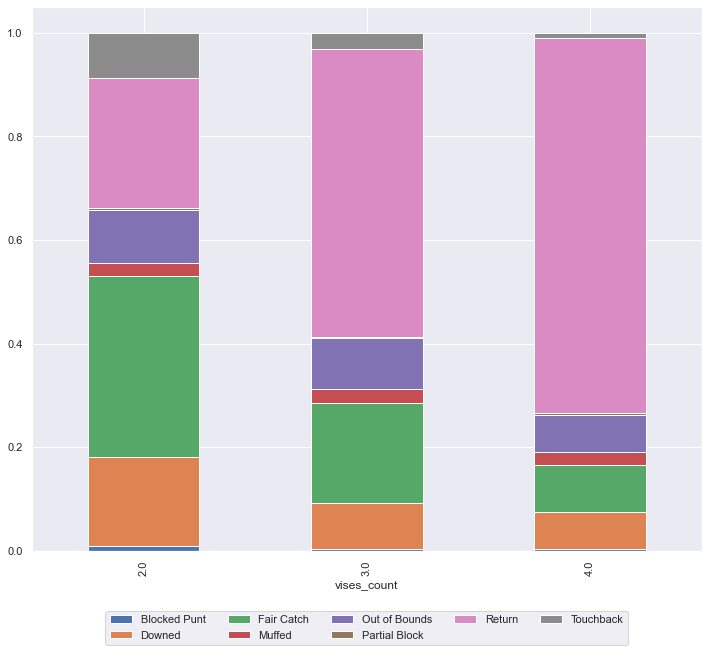

In [148]:
overall_result_sum_alt_pivot.plot.bar(stacked=True)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=5)
plt.show()

In [164]:
overall_result2.groupby(['punt_location','vises_count']).agg({'gameId': 'count', 'playResult': 'mean', 'kickLength': 'mean', 'kickReturnYardage_v2': 'mean','penaltyYards_v2': 'mean'})

gameId  playResult  kickLength  \
punt_location     vises_count                                   
opposition side   2.0             870   32.917241   36.384350   
                  3.0              56   32.000000   36.875000   
                  4.0               5   32.000000   34.800000   
own side of field 2.0            2547   42.379270   47.044823   
                  3.0            1591   42.969202   47.840479   
                  4.0             455   41.103297   47.777042   
within own 10     2.0              91   45.725275   49.831461   
                  3.0              89   42.044944   48.460674   
                  4.0              65   43.400000   49.138462   

                               kickReturnYardage_v2  penaltyYards_v2  
punt_location     vises_count                                         
opposition side   2.0                      0.152874        -0.117241  
                  3.0                      0.589286        -0.285714  
                  4.0                      4.000000         1.200000  
own side of field 2.0                      2.755006         0.148803  
                  3.0                      4.816468         0.661219  
                  4.0                      6.903297         0.929670  
within own 10     2.0                      4.120879         1.208791  
                  3.0                      7.898876         1.505618  
                  4.0                      6.153846         0.615385

In [226]:
c1 = (overall_result2['punt_location'] == 'own side of field')

osf_overall_result_total = overall_result2[c1].groupby(['vises_count']).agg({'gameId': 'count'})
osf_overall_result_total.reset_index( drop=False, inplace=True )

osf_overall_result3 = overall_result2[c1].groupby(['vises_count','Result inc partial block']).agg({'gameId': 'count'})
osf_overall_result3.reset_index( drop=False, inplace=True )

osf_overall_result_sum = pd.merge(osf_overall_result3, osf_overall_result_total, how="left", on=['vises_count'])
osf_overall_result_sum['result'] = osf_overall_result_sum['gameId_x']/osf_overall_result_sum['gameId_y']
osf_overall_result_sum

,vises_count,Result inc partial block,gameId_x,gameId_y,result
0,2.0,Blocked Punt,26,2547,0.010208
1,2.0,Downed,348,2547,0.136631
2,2.0,Fair Catch,835,2547,0.327837
3,2.0,Muffed,74,2547,0.029054
4,2.0,Out of Bounds,281,2547,0.110326
5,2.0,Partial Block,10,2547,0.003926
6,2.0,Return,803,2547,0.315273
7,2.0,Touchback,170,2547,0.066745
8,3.0,Blocked Punt,5,1591,0.003143
9,3.0,Downed,135,1591,0.084852


In [228]:
osf_overall_result_sum_alt_pivot

Result inc partial block,Blocked Punt,Downed,Fair Catch,Muffed,Out of Bounds,Partial Block,Return,Touchback
vises_count,,,,,,,,
2.0,0.010208,0.136631,0.327837,0.029054,0.110326,0.003926,0.315273,0.066745
3.0,0.003143,0.084852,0.189818,0.027656,0.097423,0.001257,0.569453,0.026398
4.0,0.004396,0.068132,0.090110,0.021978,0.079121,0.004396,0.720879,0.010989


## 7.15 Raw Graphs included in notebook

In [264]:
# code to highlight how we have classified a punt play
specific_play = tracking2018[(tracking2018['gameId'] == 2018090600) & (tracking2018['playId'] == 973)&(tracking2018['frameId']<= 83)]
test = specific_play.query("(team == 'home' & jerseyNumber==29) or (team == 'home' & jerseyNumber==32) or (team == 'away' & jerseyNumber==28) or (team == 'away' & jerseyNumber==83) or nflId == 29957" )
testio = test
pi_conditions = [
    testio['nflId'] == 29957,
    ((testio['team'] == 'home') & (testio['jerseyNumber'] == 29)),
    ((testio['team'] == 'home') & (testio['jerseyNumber'] == 32)),
    ((testio['team'] == 'away') & (testio['jerseyNumber'] == 28)),
    ((testio['team'] == 'away') & (testio['jerseyNumber'] == 83)),
    ]
pi_values = ['returner', 'vise R1', 'vise L1', 'gunner R1', 'gunner L1' ]
pi2_values = ['returner', 'vise', 'vise', 'gunner', 'gunner' ]

testio['punt_role'] = np.select(pi_conditions, pi_values)
testio['punt_role_simple'] = np.select(pi_conditions, pi2_values)

test_merged2 = test_merged[['gameId','playId','frameId','Gunner R1 winning','Gunner L1 winning']]

testio2 = pd.merge(testio, test_merged2, how="left", on=['gameId', 'playId','frameId'])

g_conditions = [
    testio2['punt_role'] == 'gunner L1',
    testio2['punt_role'] == 'gunner R1',
    ((testio2['punt_role'] != 'gunner R1') & (testio2['punt_role'] != 'gunner L1')),
    ]
g_values = [testio2['Gunner L1 winning'], testio2['Gunner R1 winning'], 0]

testio2['gunner_result'] = np.select(g_conditions, g_values)

s_conditions = [
    testio2['punt_role_simple'] == 'returner',
    testio2['punt_role_simple'] == 'vise',
    (testio2['punt_role_simple'] == 'gunner')&(testio2['gunner_result'] == 0.0),
    (testio2['punt_role_simple'] == 'gunner')&(testio2['gunner_result'] == 1.0),
    ]
s_values = ['2. Returner','1. Vise','4. Gunner not winning','3. Gunner winning']

testio2['simple sum'] = np.select(s_conditions, s_values)
testio3 = testio2.sort_values(['simple sum','frameId'], ascending = (True,True))

<ipython-input-264-c9b2dcfbc48d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testio['punt_role'] = np.select(pi_conditions, pi_values)
<ipython-input-264-c9b2dcfbc48d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testio['punt_role_simple'] = np.select(pi_conditions, pi2_values)


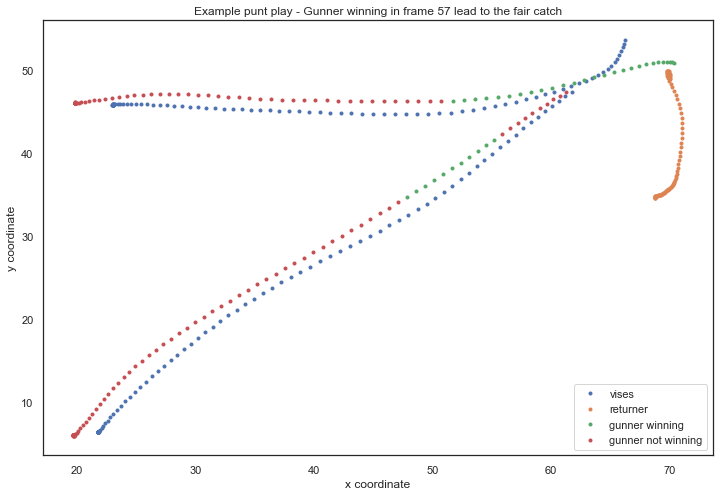

In [265]:
fig, ax = plt.subplots(figsize=(12, 8))
testio3.groupby(['simple sum']) \
    .plot(x='x', y='y', ax=ax, style='.')
plt.legend(['vises','returner','gunner winning','gunner not winning'], loc = 'lower right')
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.title('Example punt play - Gunner winning in frame 57 lead to the fair catch');

Text(0.5, 1.0, 'Likelyhood of event occuring based off the earliest a gunner wins their matchup')

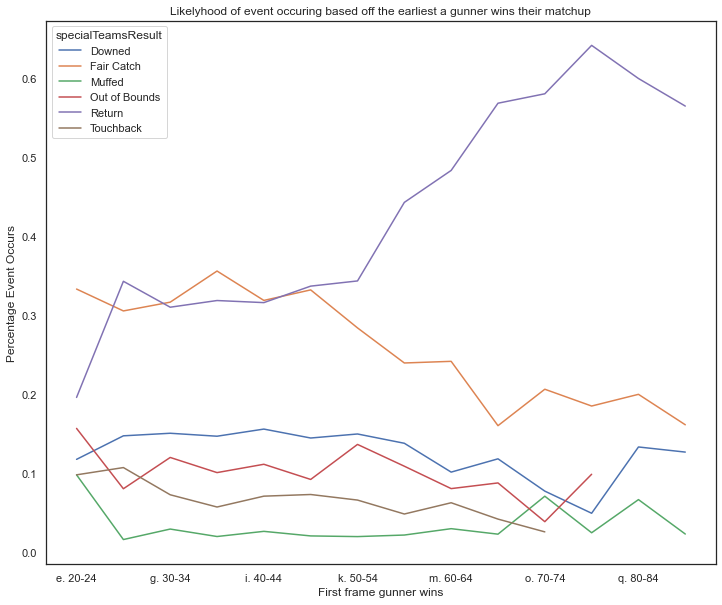

In [266]:
df_pct = (punt_summary2.groupby(['frameId bracket','specialTeamsResult'])['playId'].count()/punt_summary2.groupby(['frameId bracket'])['playId'].count())
df_pct.unstack().plot.line(figsize=(12,10))
plt.xlabel('First frame gunner wins')
plt.ylabel('Percentage Event Occurs')
plt.title('Likelyhood of event occuring based off the earliest a gunner wins their matchup')

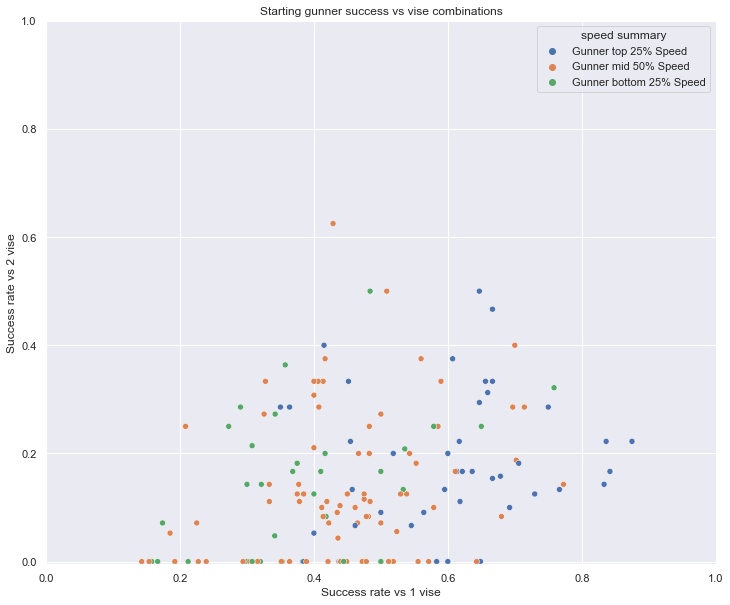

In [292]:
# scatter plot of success rate vs 1 vice and success rate vs 2 vice, colour by speed
c1 = (punt_results['starter'] == 1.0)
c2 = (punt_results['vices2'] >= 5.0)
c3 = (punt_results['vices1'] >= 10.0)
s1 = ['total success rate','1 vice success rate', '2 vice success rate']
a1 = (False, False,False)

graph_result = punt_results[c1&c2&c3].sort_values(s1, ascending = (False, False,False))
sns.set(rc={'figure.figsize':(12,10)})
a_plot = sns.scatterplot(x = '1 vice success rate', y = '2 vice success rate', data=graph_result, hue='speed summary')
sns.set_style("white")
sns.despine()
a_plot.set(xlim=(0,1))
a_plot.set(ylim=(-0.005,1))
plt.xlabel('Success rate vs 1 vise')
plt.ylabel('Success rate vs 2 vise')
plt.title('Starting gunner success vs vise combinations');


Text(0.5, 1.0, 'Correlation heat map of success to physical variables')

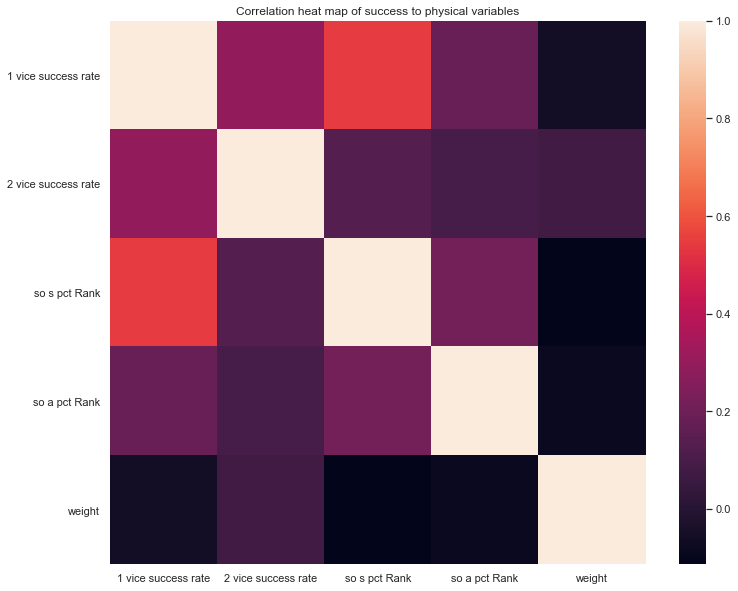

In [283]:
# correlation heat map of success to physical variables
graph_result_red = graph_result[['1 vice success rate','2 vice success rate','so s pct Rank','so a pct Rank','weight']]
g = sns.heatmap(graph_result_red.corr())
g.set_yticklabels(g.get_yticklabels(), rotation=0, horizontalalignment='right')
plt.title('Correlation heat map of success to physical variables')

Text(0.5, 1.0, 'Likelyhood of gunner winning matchup vs 2 vises by release technique')

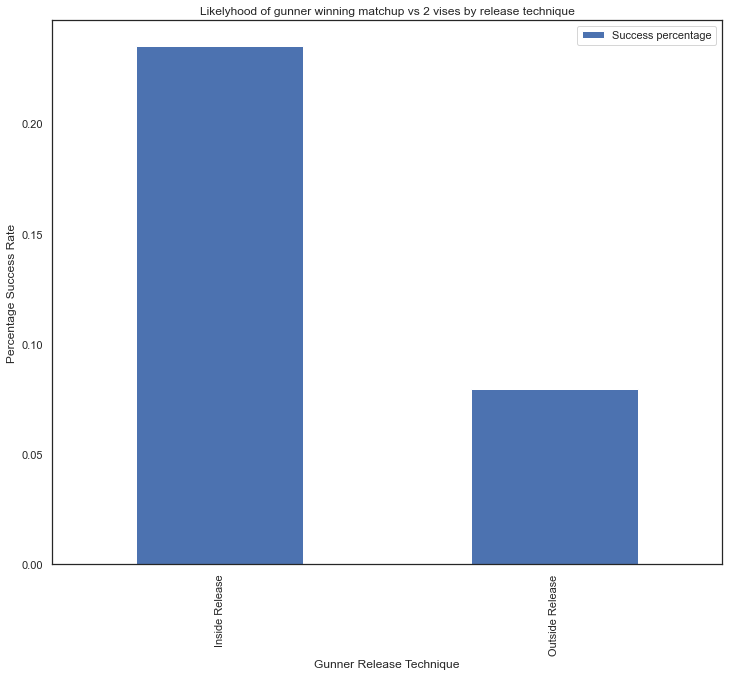

In [286]:
ts_bar = test_summary_s[['g post snap cluster summary','succ_pct']]
ts_bar = ts_bar.set_index('g post snap cluster summary')
ts_bar.plot.bar(y = 'succ_pct')
plt.xlabel('Gunner Release Technique')
plt.ylabel('Percentage Success Rate')
plt.legend(['Success percentage'])
plt.title('Likelyhood of gunner winning matchup vs 2 vises by release technique')

Text(0.5, 1.0, 'Gunner Inside Release \n vs Vise release techniques')

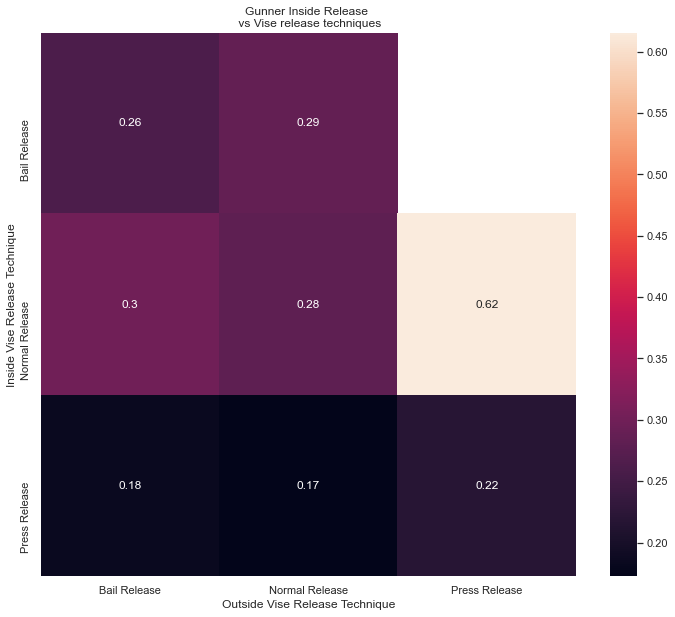

In [280]:
sns.heatmap(is_pivot, annot=True)
plt.xlabel('Outside Vise Release Technique')
plt.ylabel('Inside Vise Release Technique')
plt.title('Gunner Inside Release \n vs Vise release techniques')

Text(0.5, 1.0, 'Gunner Outside Release \n vs Vise release techniques')

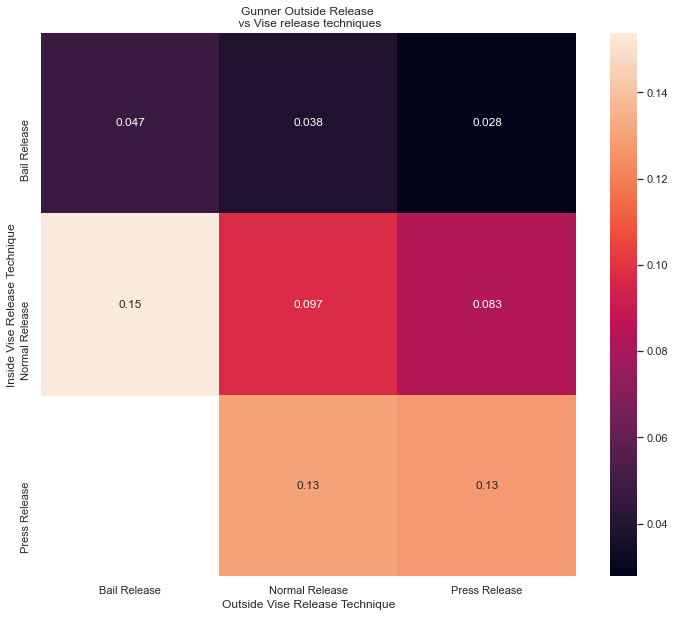

In [281]:
sns.heatmap(or_pivot, annot=True)
plt.xlabel('Outside Vise Release Technique')
plt.ylabel('Inside Vise Release Technique')
plt.title('Gunner Outside Release \n vs Vise release techniques')

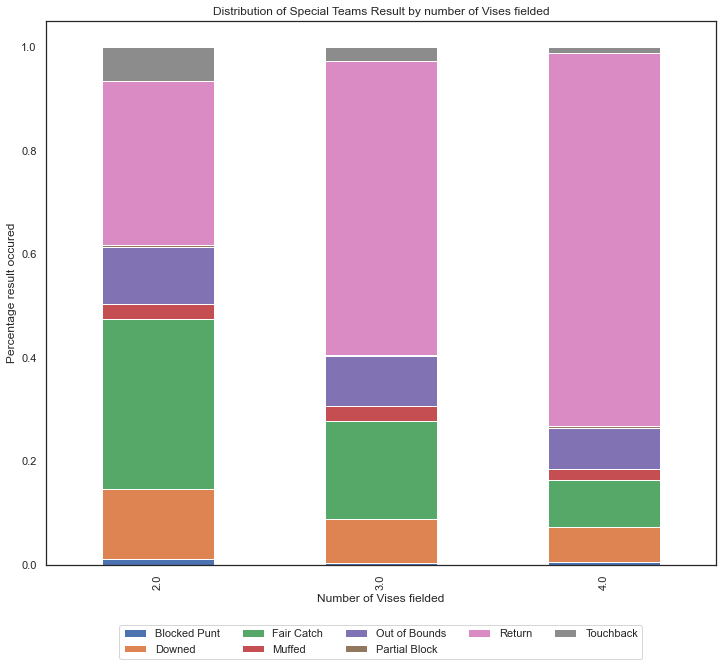

In [288]:
osf_overall_result_sum_alt_pivot = pd.pivot_table(osf_overall_result_sum, values='result', index=['vises_count'],
                    columns=['Result inc partial block'], aggfunc=np.sum)

osf_overall_result_sum_alt_pivot.plot.bar(stacked=True)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=5)
plt.xlabel('Number of Vises fielded')
plt.ylabel('Percentage result occured')
plt.title('Distribution of Special Teams Result by number of Vises fielded');
plt.show()